In [310]:
#Data Exploration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

cardiograph=pd.read_csv("Downloads/EDA1/EDA1/Cardiotocographic.csv")
print(cardiograph.columns)
#select necessary columns
cardiograph_subset=pd.read_csv("Downloads/EDA1/EDA1/Cardiotocographic.csv",usecols=['LB','AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV','Width','Tendency','NSP']) 
print("The selected columns are:")
print(cardiograph_subset)
print("Size of subset:",cardiograph_subset.shape)
#find Missing Value
print("Missing value percentage for dataset:")
missvalue=cardiograph_subset.isna().sum()/cardiograph_subset.shape[0]*100
print(missvalue)
#Handle missing value into zero
cardiograph_subset=cardiograph_subset.dropna()
print("Check missing values after handling:")
missvalue1=cardiograph_subset.isna().sum()/cardiograph_subset.shape[0]*100
print(missvalue1)
print(cardiograph_subset.info())
#find duplicates
print("No.of duplicate in datasets:",end=" ")
print(cardiograph_subset.duplicated().sum())
cardiograph_subset=cardiograph_subset.drop_duplicates()
#check any duplicate in dataset after drop
print("No.of duplicate in datasets after drop:",end=" ")
print(cardiograph_subset.duplicated().sum())


Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')
The selected columns are:
              LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   

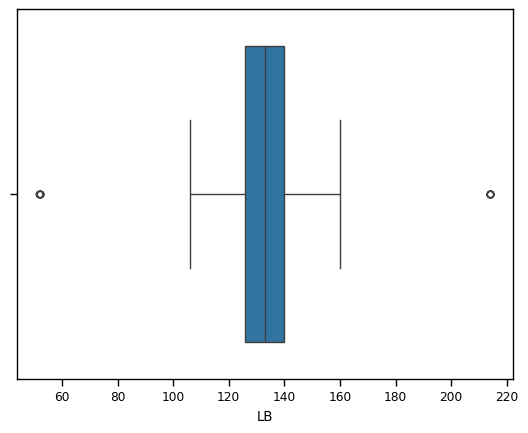

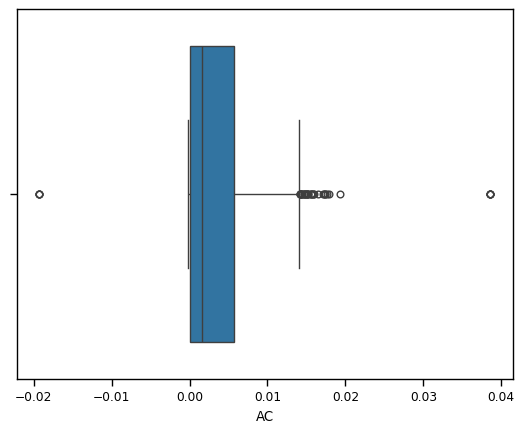

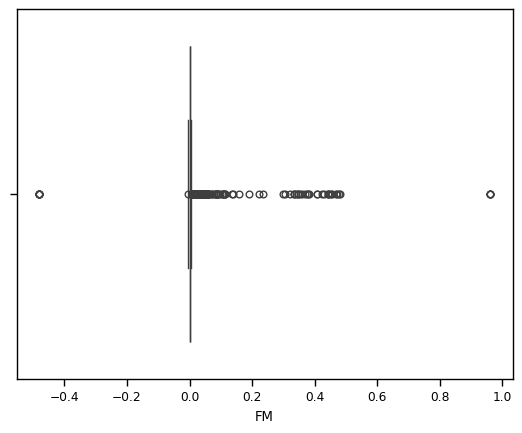

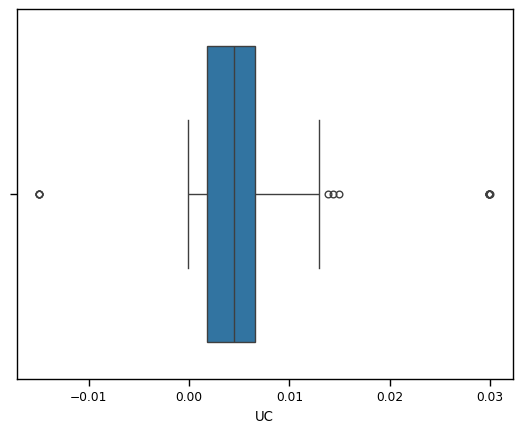

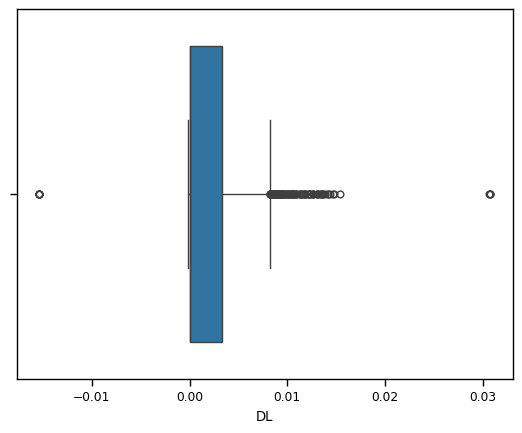

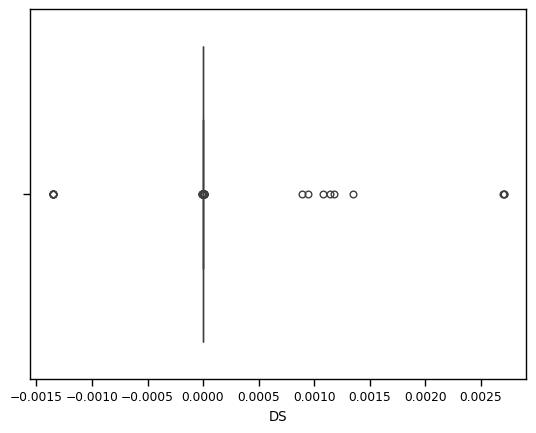

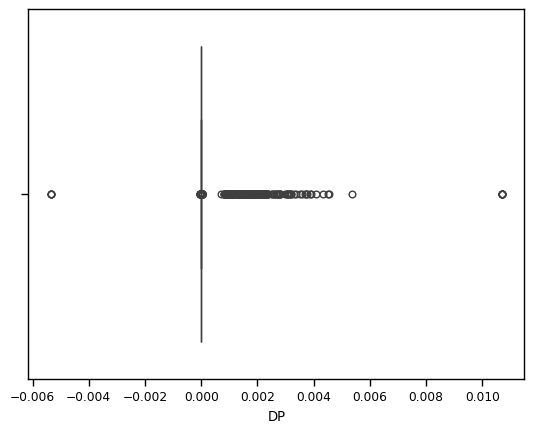

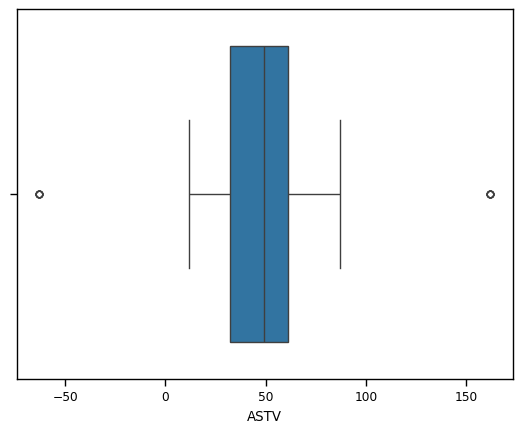

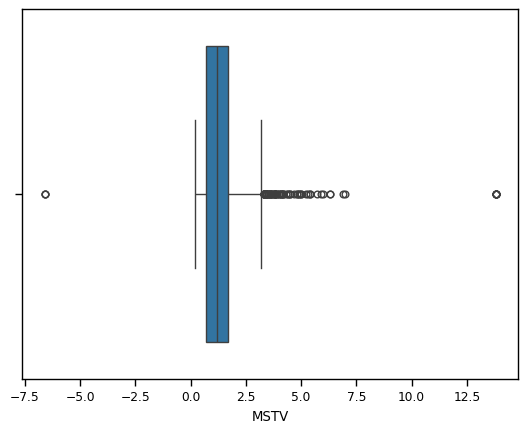

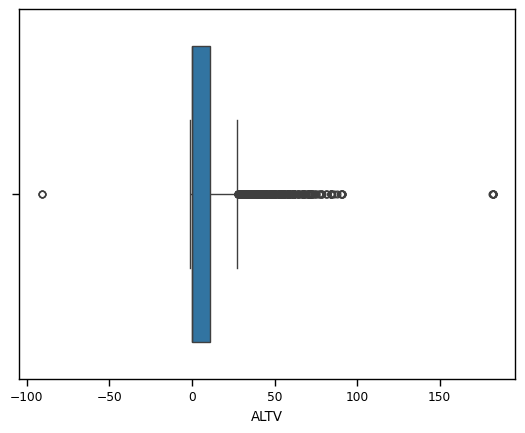

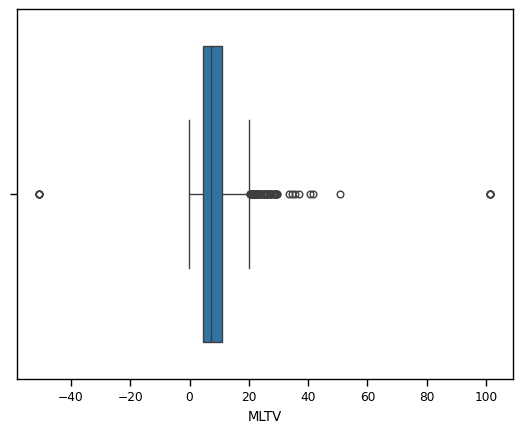

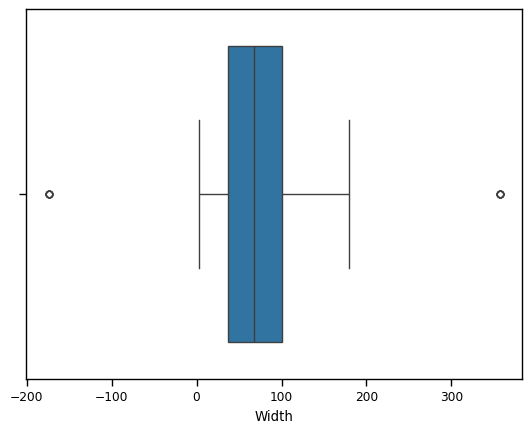

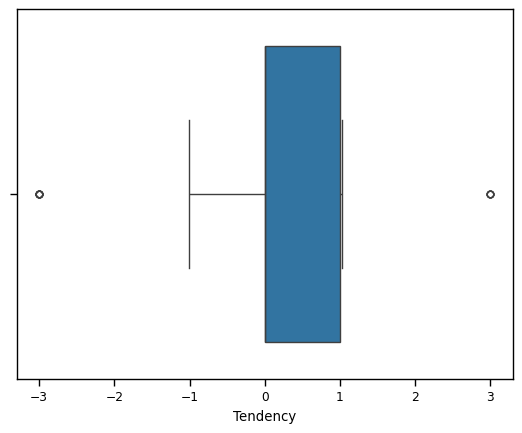

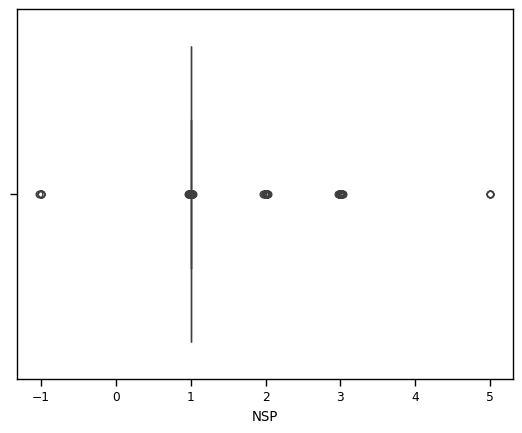

In [318]:
#Find outliers using boxplot
import matplotlib.pyplot as plt
%matplotlib inline
for i in cardiograph_subset.select_dtypes(include="number").columns:
    sns.boxplot(data=cardiograph_subset,x=i)
    plt.show() 

In [308]:
#Treatment for outliers/boxplot capping 
def remove_outlier(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lowerbound=q1-(1.5*(IQR))
    upperbound=q3+(1.5*(IQR))
    return lowerbound,upperbound
for i in ['LB','AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV','MLTV','Width','Tendency','NSP']:
    lower,upper=remove_outlier(cardiograph_subset[i])
    cardiograph_subset[i]=np.where(cardiograph_subset[i]<lower,lower,cardiograph_subset[i])
    cardiograph_subset[i]=np.where(cardiograph_subset[i]>upper,upper,cardiograph_subset[i])

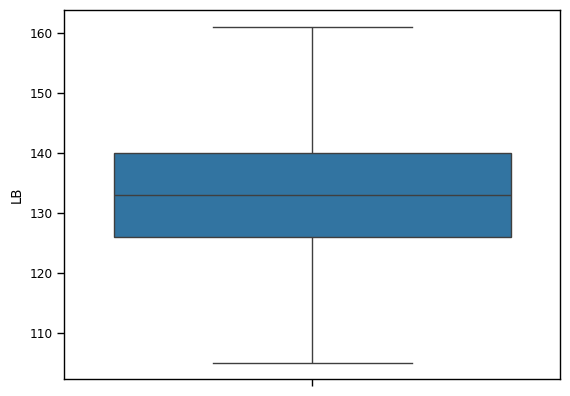

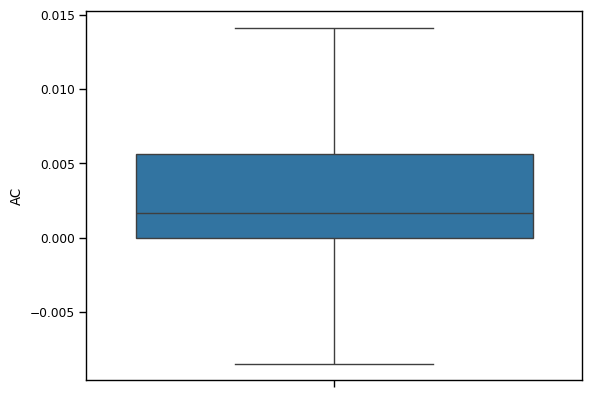

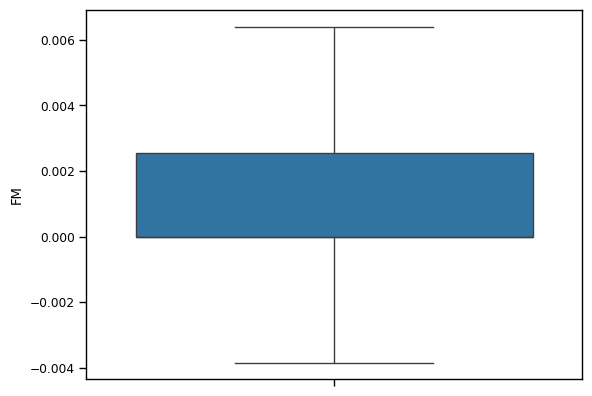

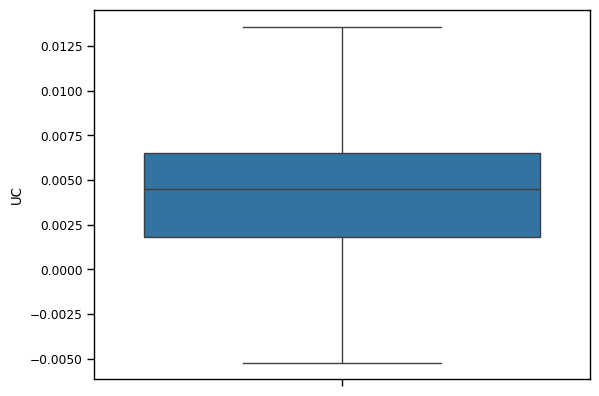

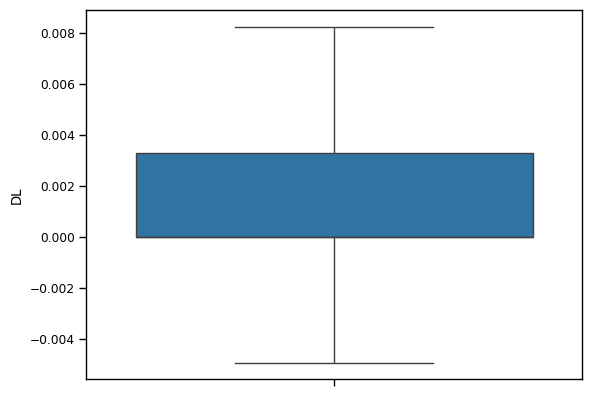

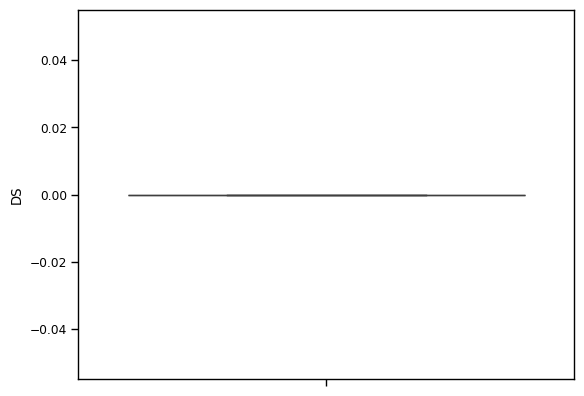

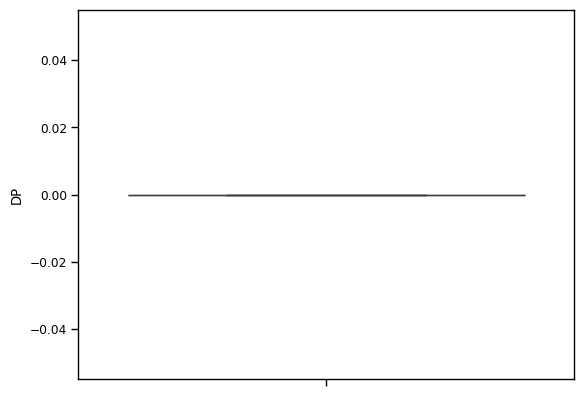

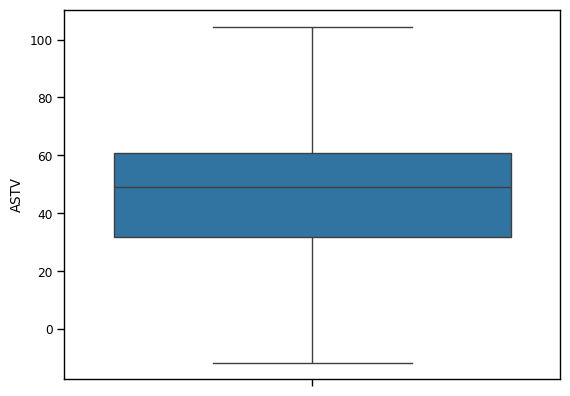

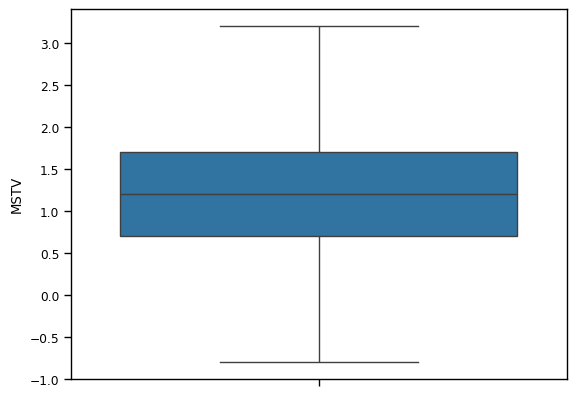

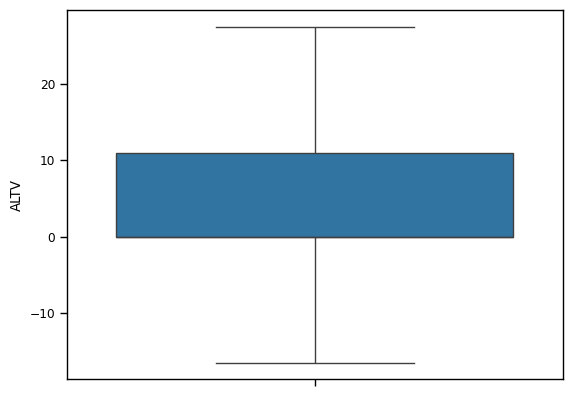

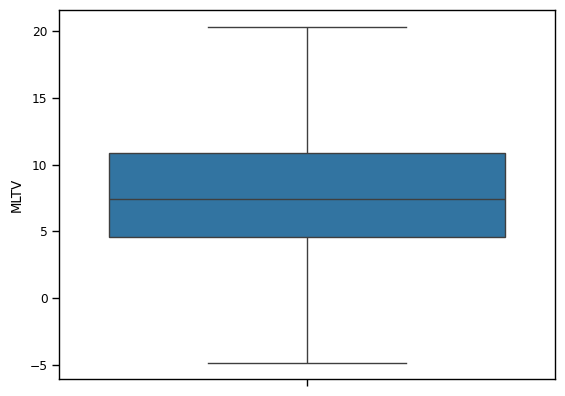

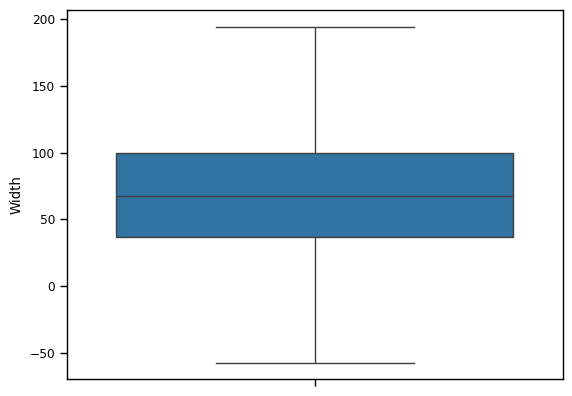

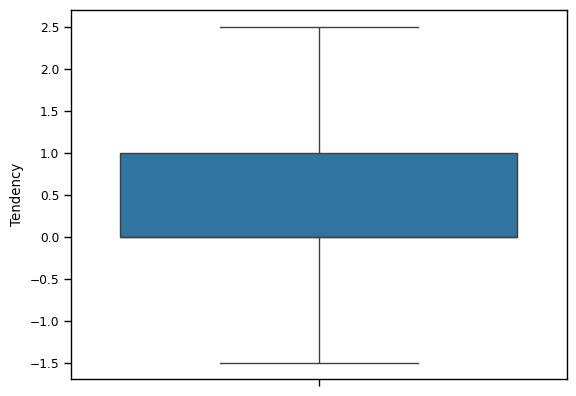

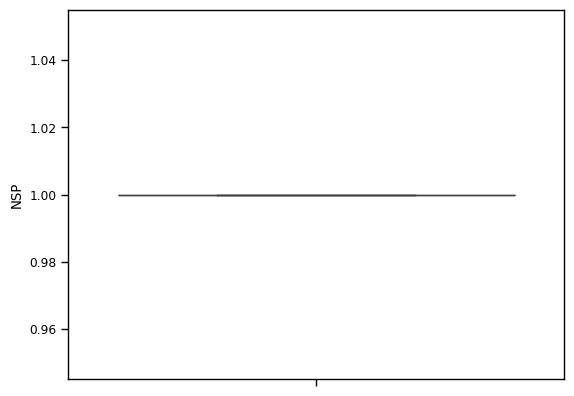

In [306]:
#box plot after capping LB Column
for i in ['LB','AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV','MLTV','Width','Tendency','NSP']:
    sns.boxplot(cardiograph_subset[i])
    plt.show()

In [128]:
#stastistical summary
s=cardiograph_subset.describe().T
print("Five  stastiscal summary for all columns")
print(s)

Five  stastiscal summary for all columns
           count        mean        std         min         25%         50%  \
LB        2105.0  133.343598  11.270154   51.842487  126.000000  133.000000   
AC        2106.0    0.003219   0.004391   -0.019284    0.000000    0.001634   
FM        2126.0    0.009894   0.067540   -0.480634    0.000000    0.000000   
UC        2126.0    0.004391   0.003340   -0.014925    0.001851    0.004484   
DL        2126.0    0.001895   0.003343   -0.015393    0.000000    0.000000   
DS        2105.0    0.000003   0.000142   -0.001353    0.000000    0.000000   
DP        2105.0    0.000175   0.000840   -0.005348    0.000000    0.000000   
ASTV      2126.0   46.995984  18.813973  -63.000000   32.000000   49.000000   
MSTV      2126.0    1.364378   1.173632   -6.600000    0.700000    1.200000   
ALTV      2126.0   10.285964  21.205041  -91.000000    0.000000    0.000000   
MLTV      2105.0    8.284887   7.772858  -50.700000    4.600000    7.400000   
Width     2

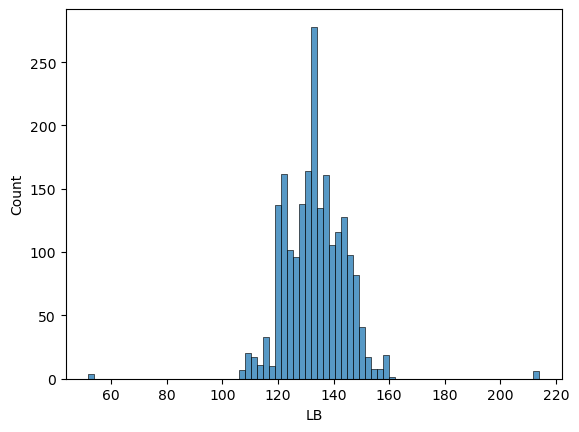

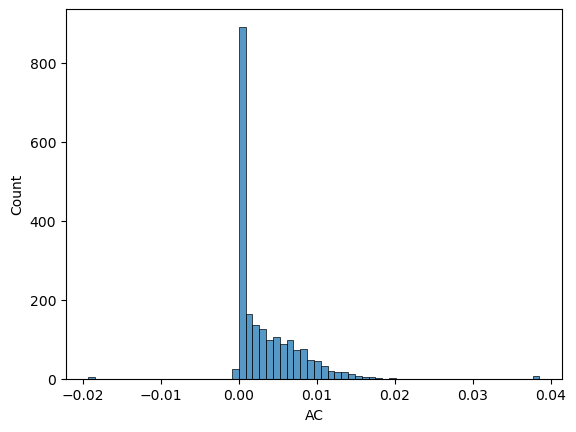

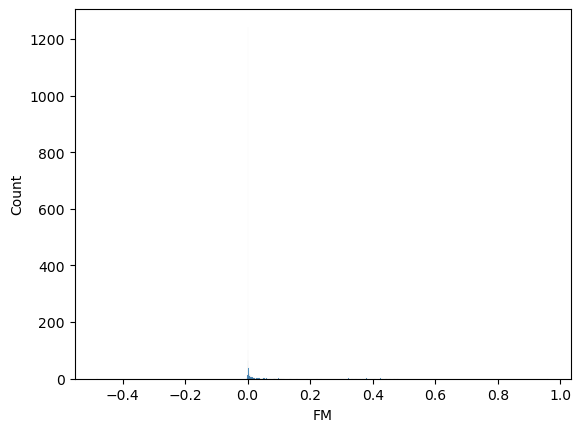

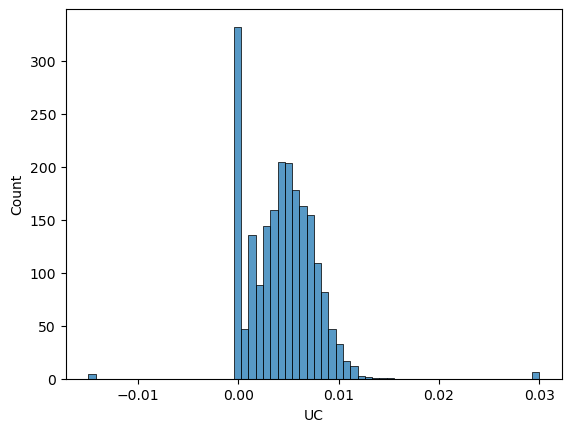

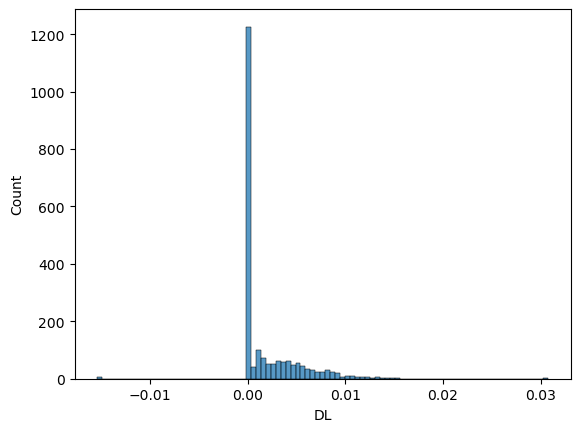

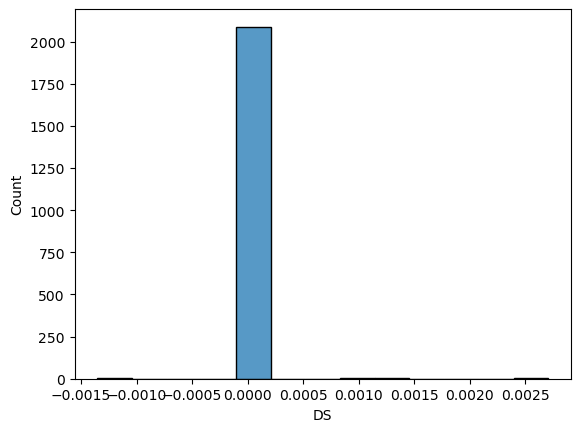

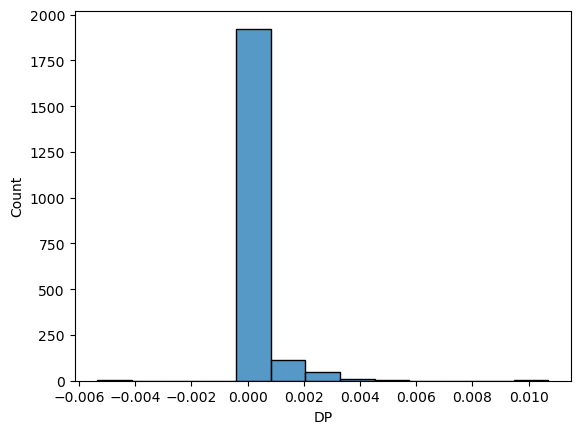

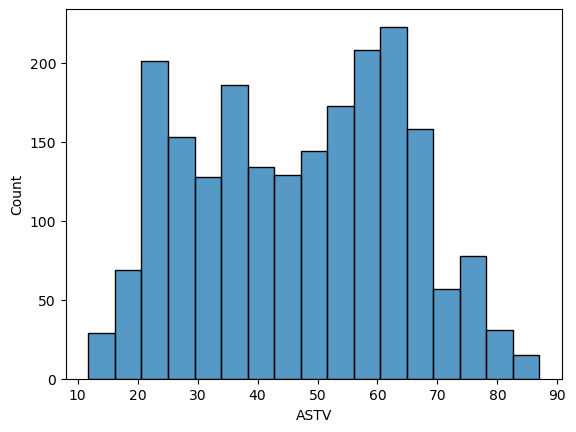

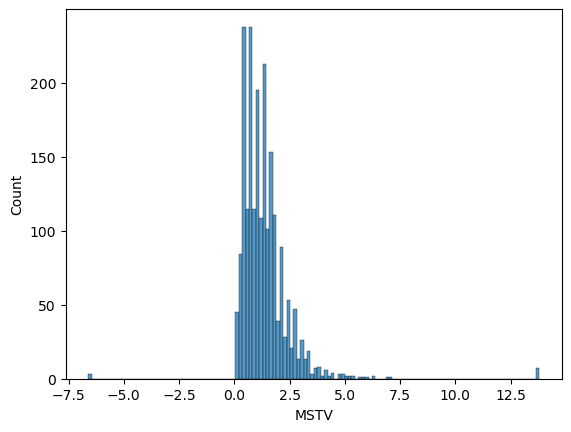

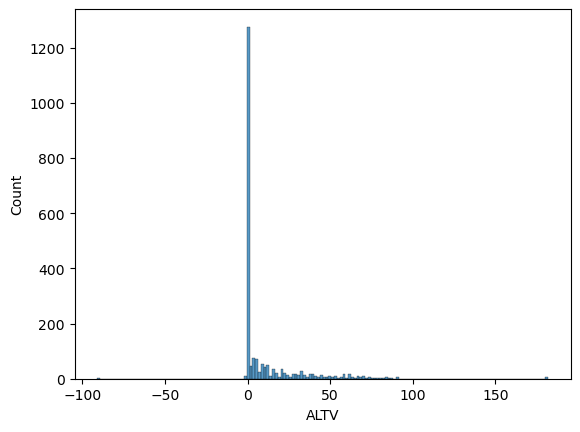

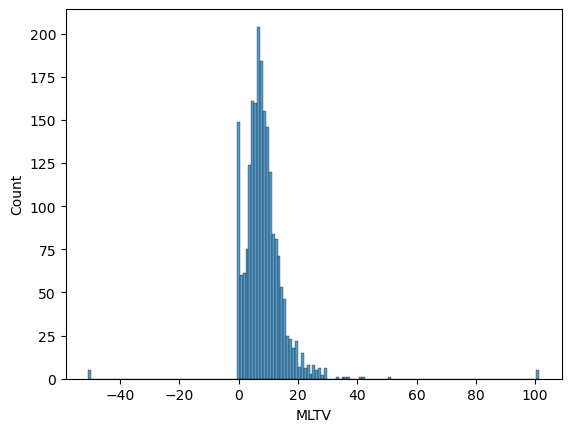

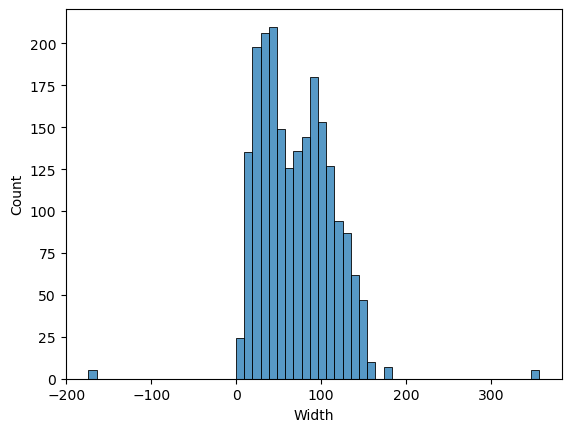

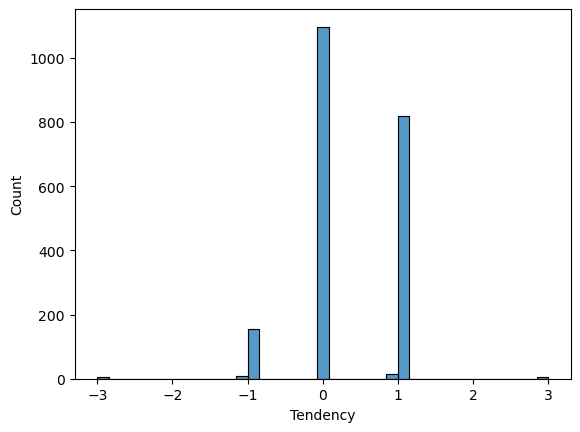

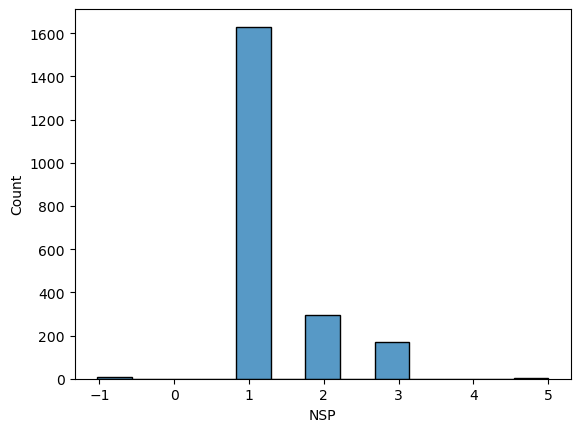

In [212]:
#histogram distribution"
import warnings
warnings.filterwarnings("ignore")
for i in cardiograph_subset.select_dtypes(include="number").columns:
    sns.histplot(data=cardiograph_subset,x=i)
    plt.show()   

In [442]:
!pip install bar_chart_race

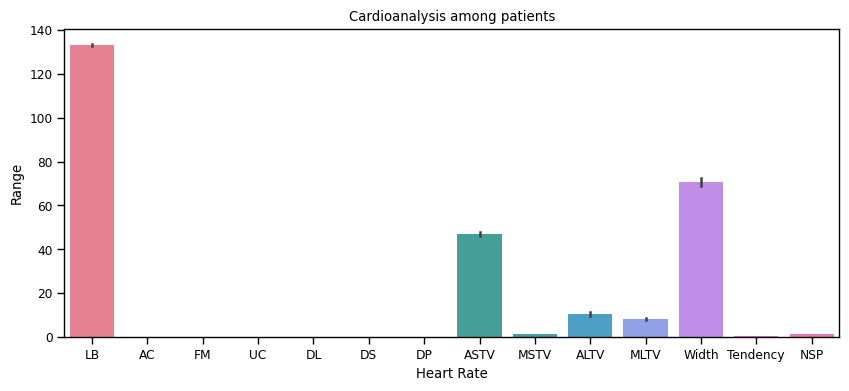

In [450]:
#barplot to find distribution
plt.figure(figsize=(10,4))
plt.title("Cardioanalysis among patients")
plt.xlabel("Heart Rate")
plt.ylabel("Range")
sns.barplot(data=cardiograph_subset)
plt.show()

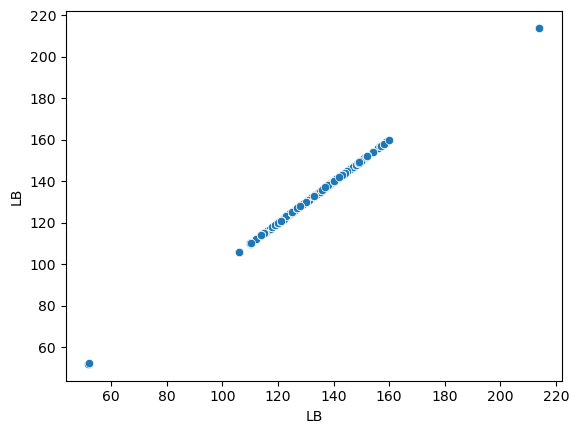

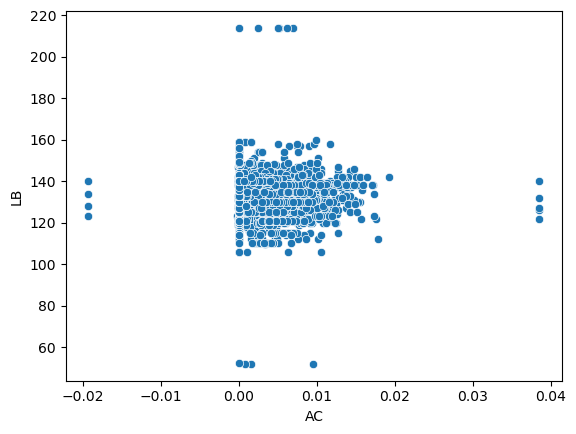

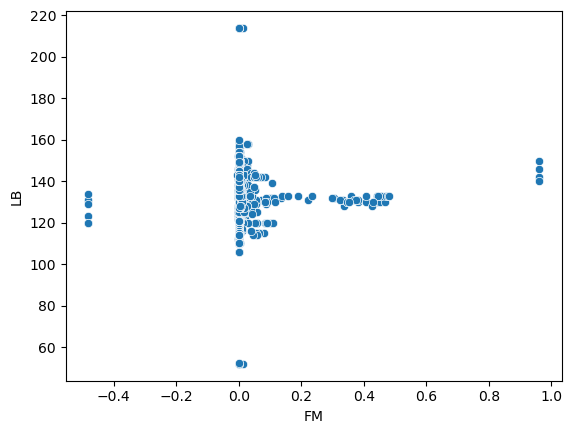

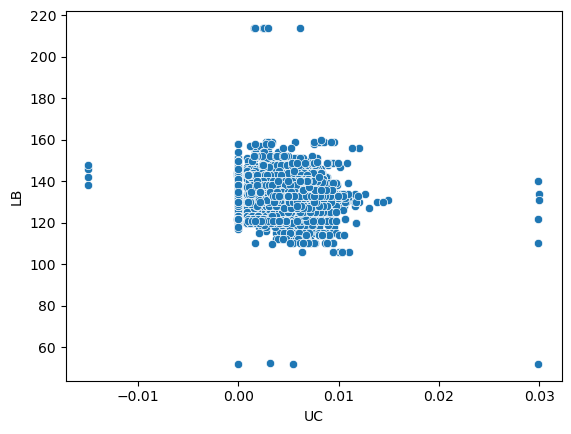

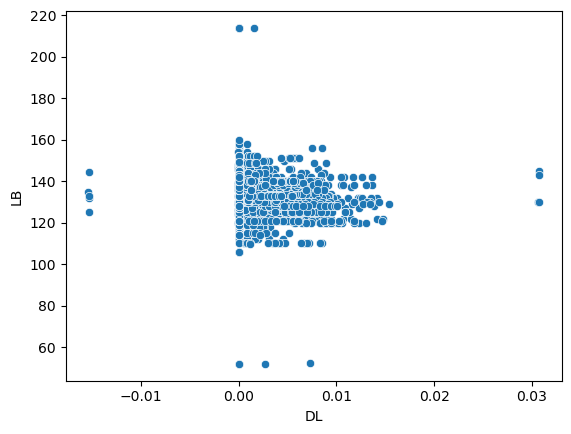

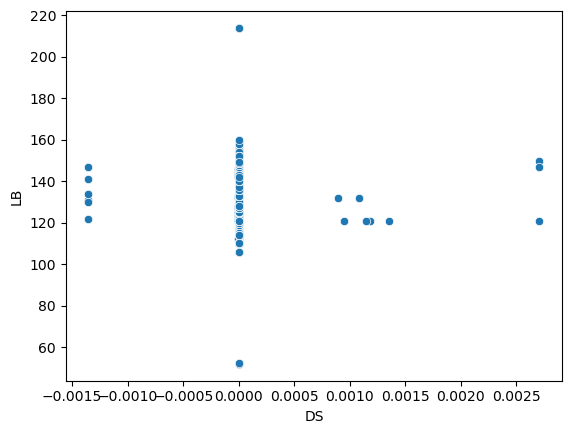

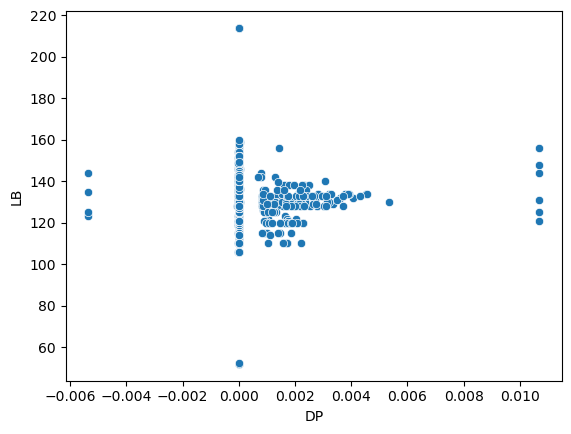

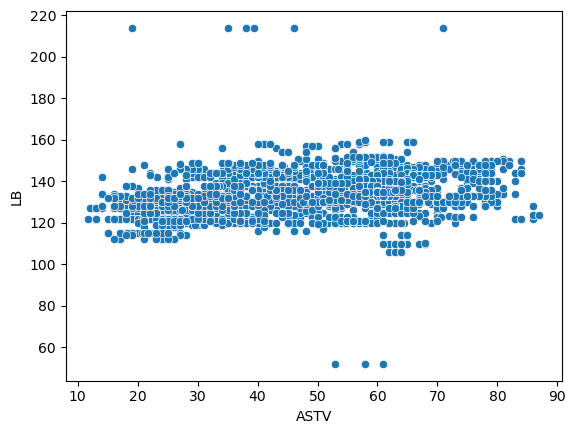

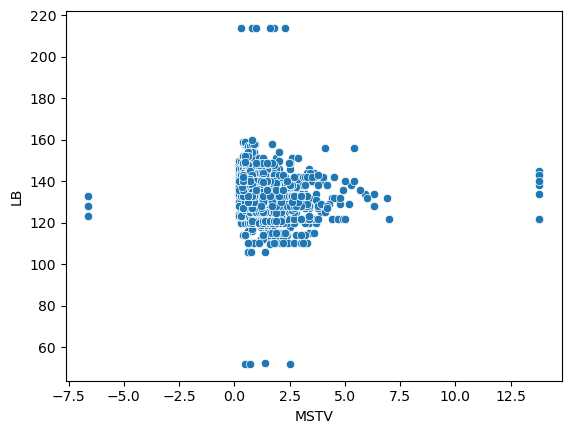

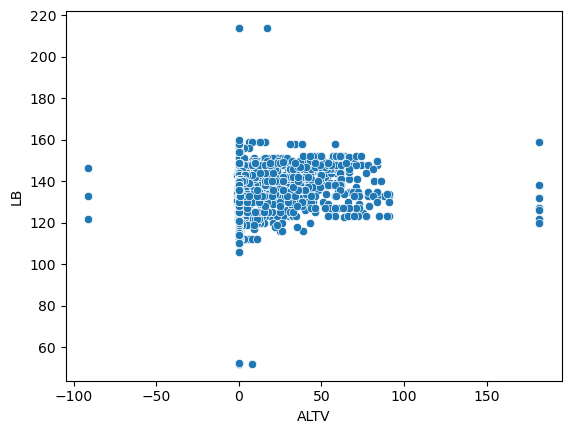

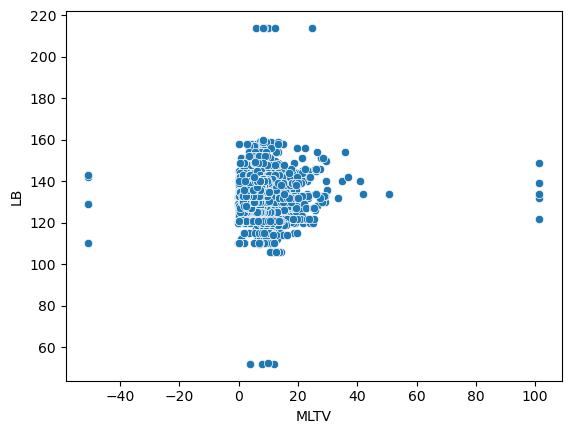

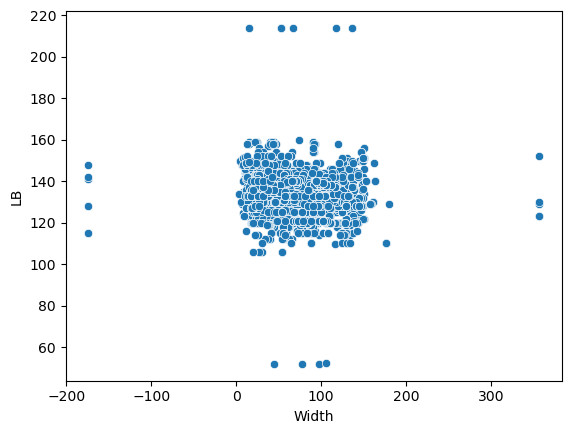

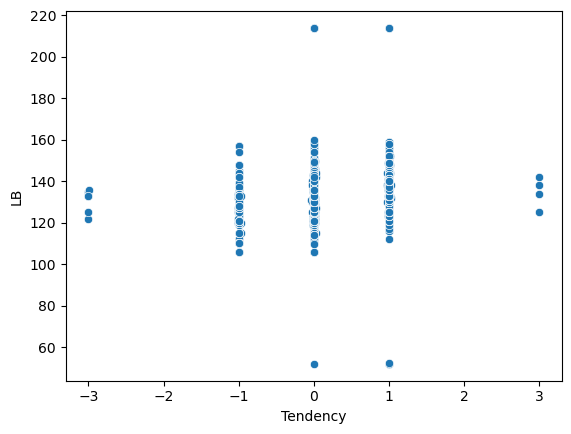

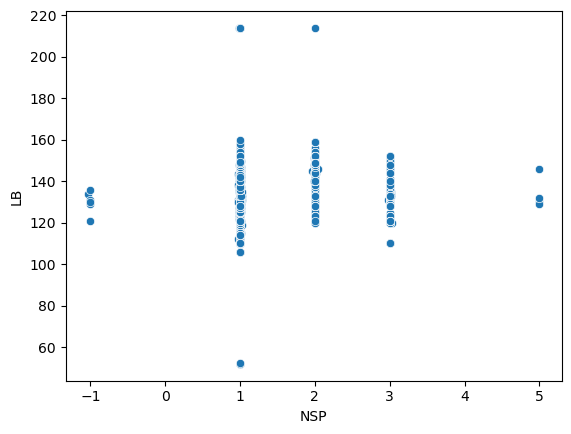

In [213]:
#scatterplot understand relationship
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV','Width','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="LB")
    plt.show()

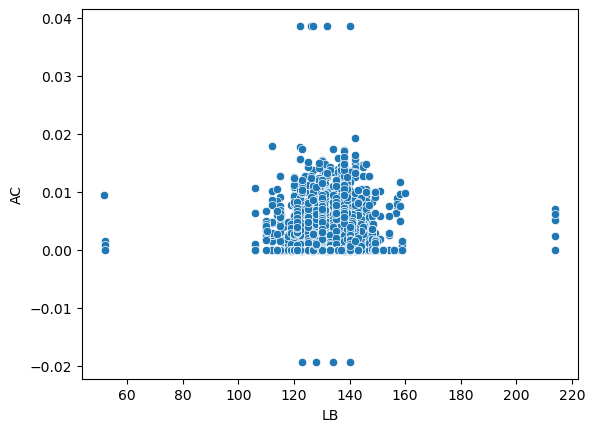

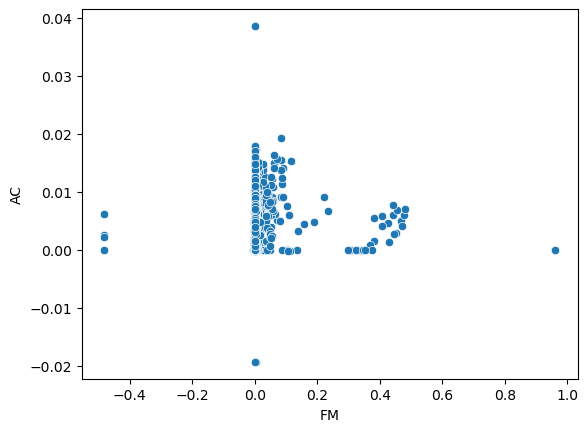

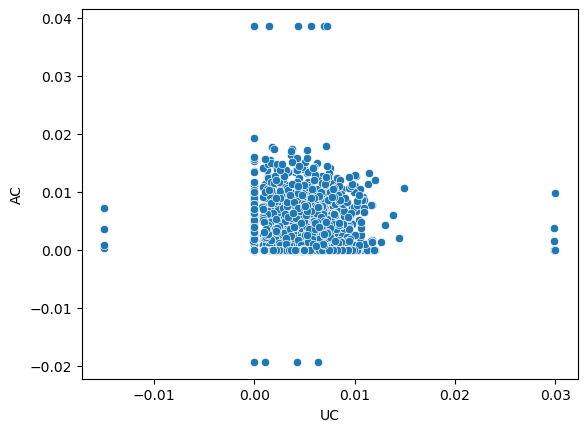

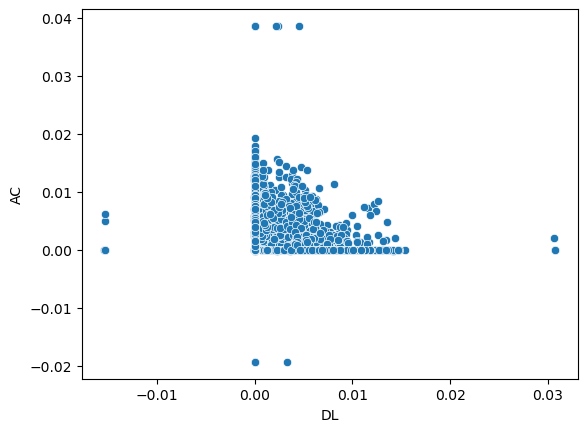

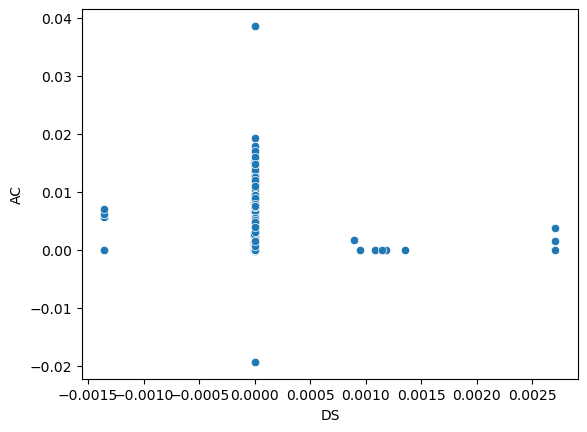

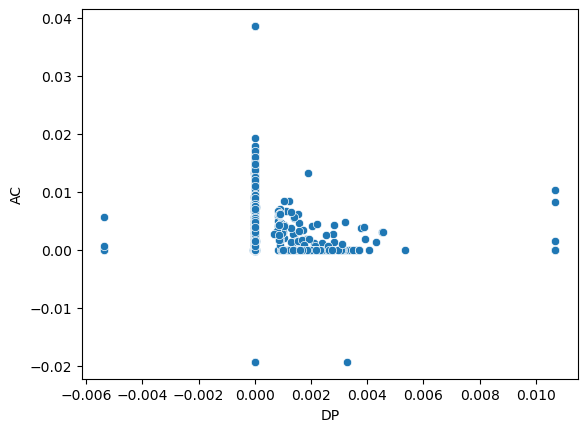

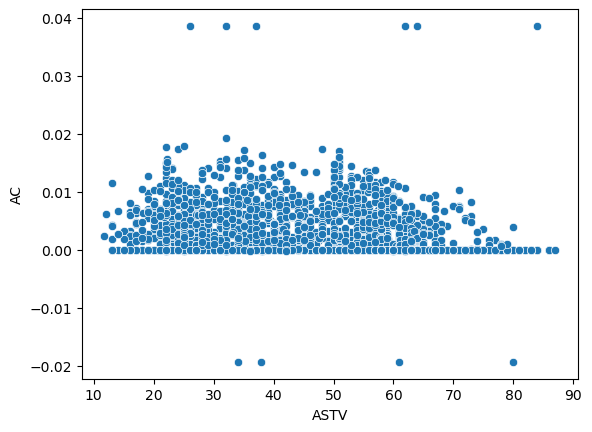

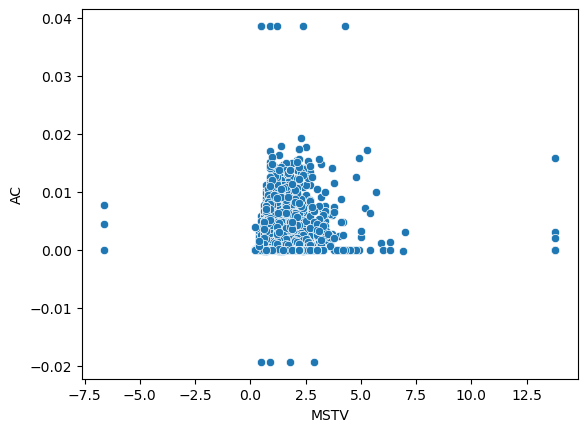

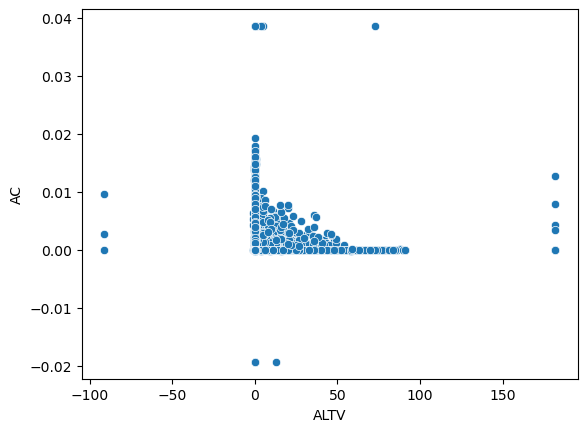

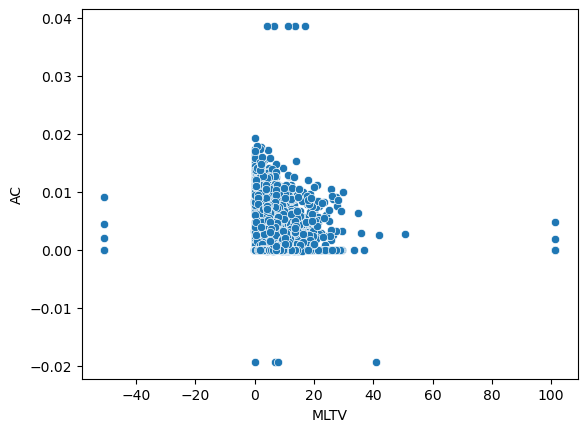

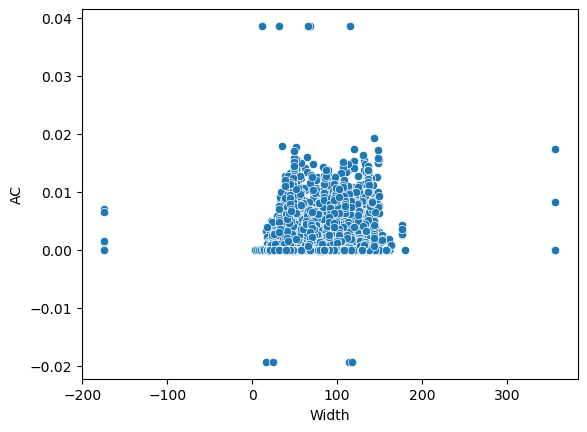

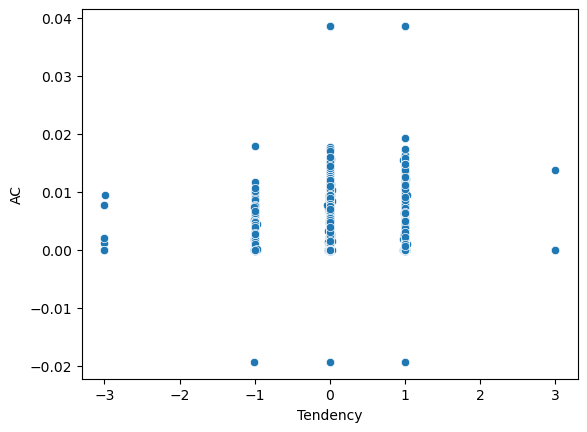

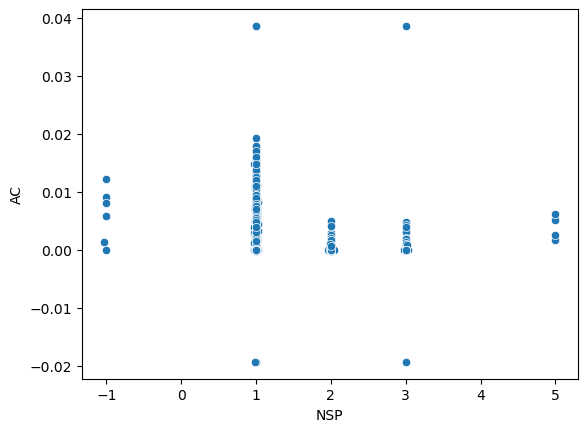

In [218]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV','Width','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="AC")
    plt.show()

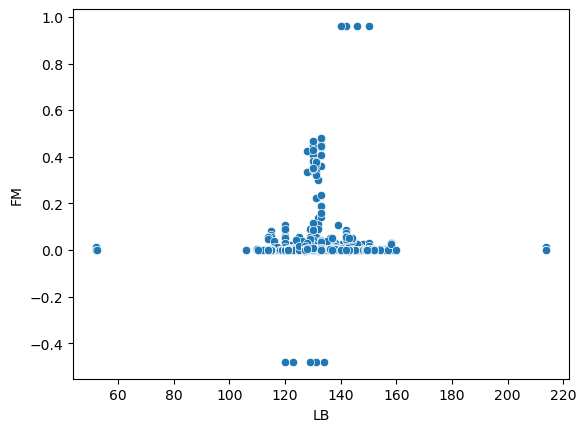

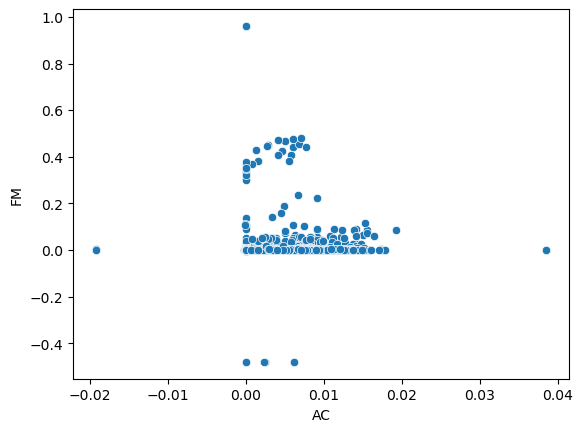

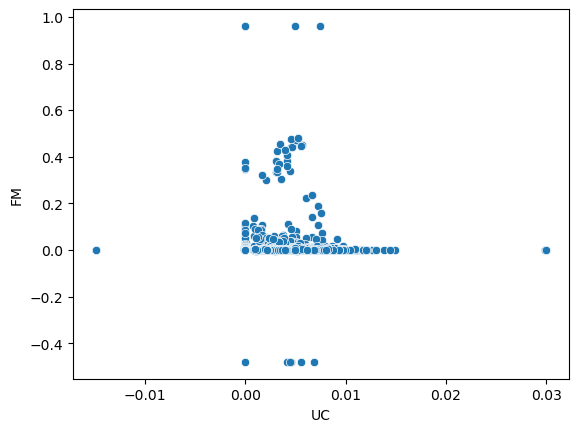

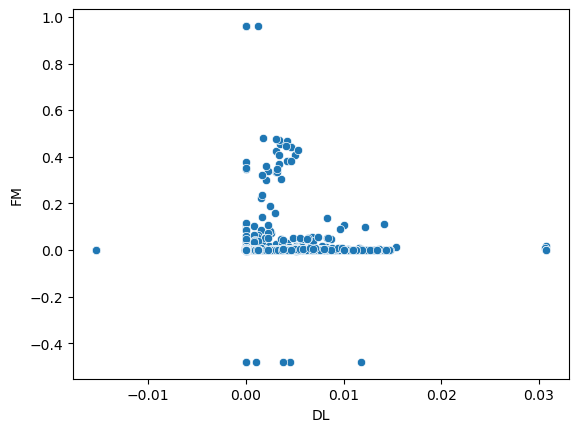

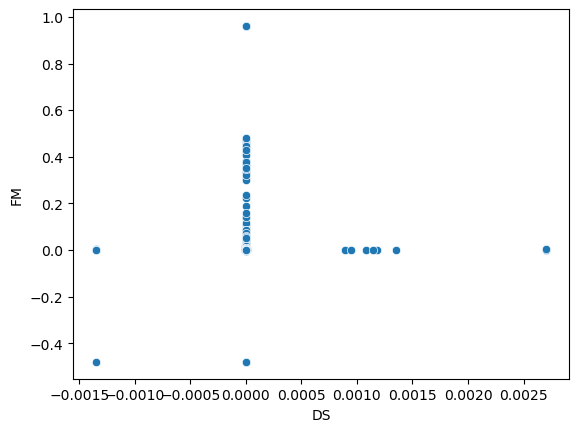

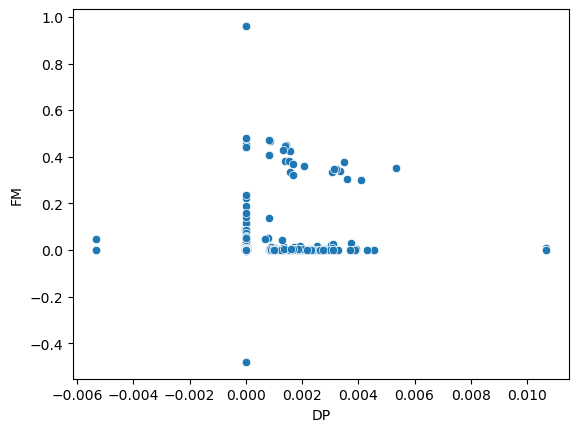

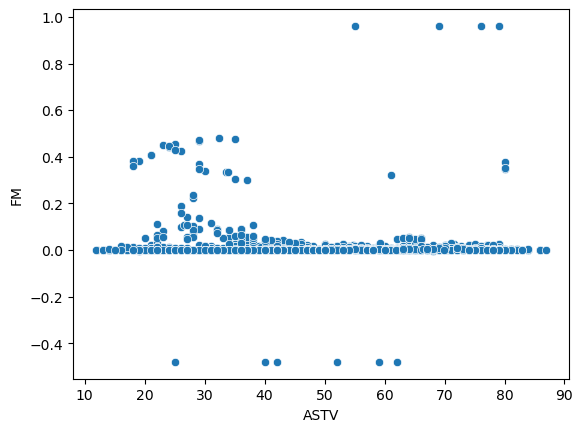

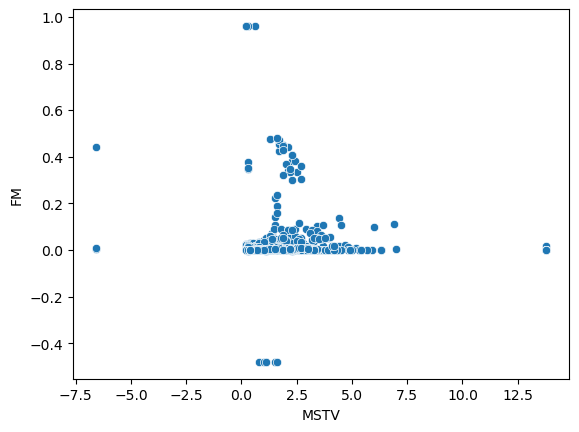

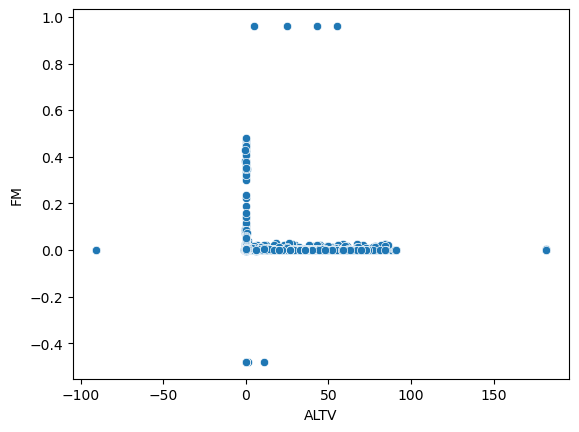

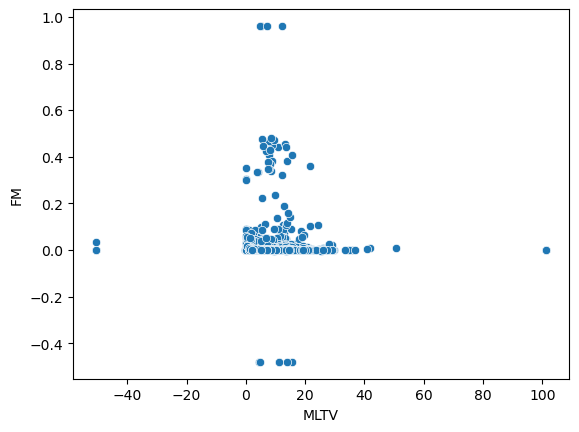

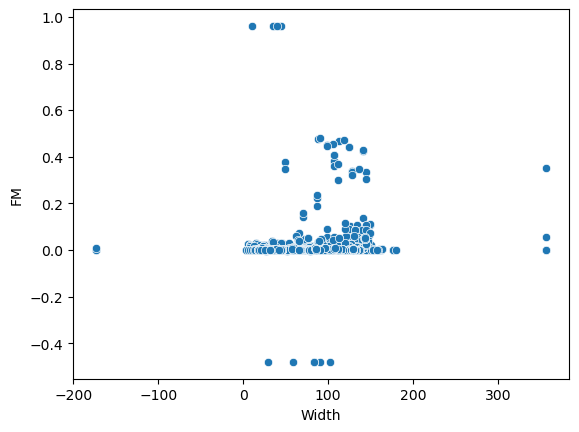

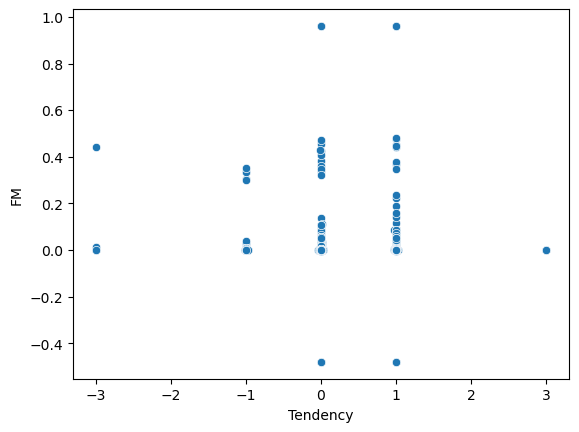

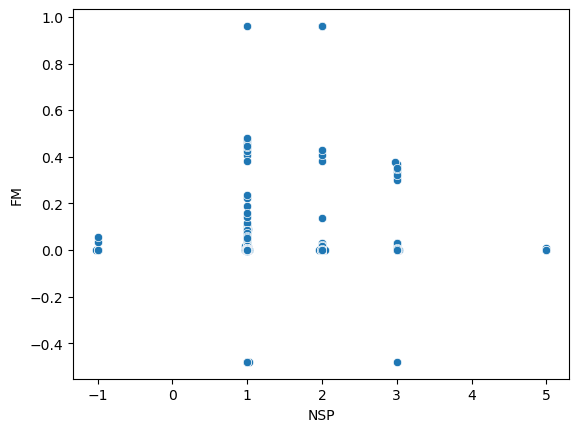

In [220]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC','UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV','Width','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="FM")
    plt.show()

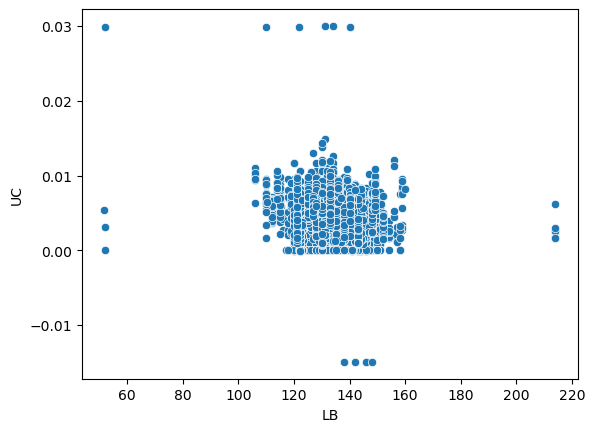

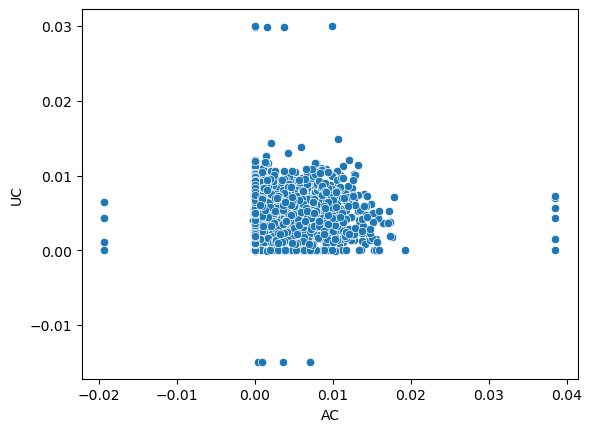

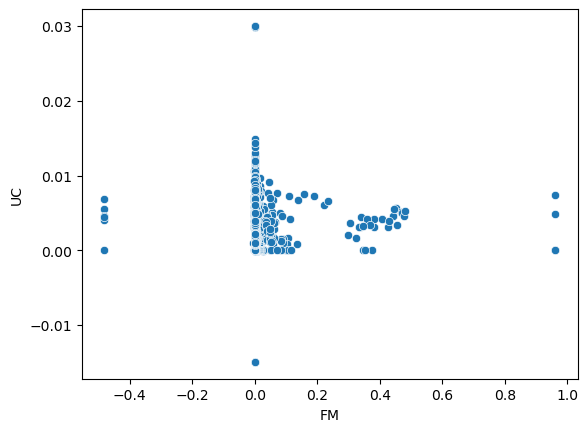

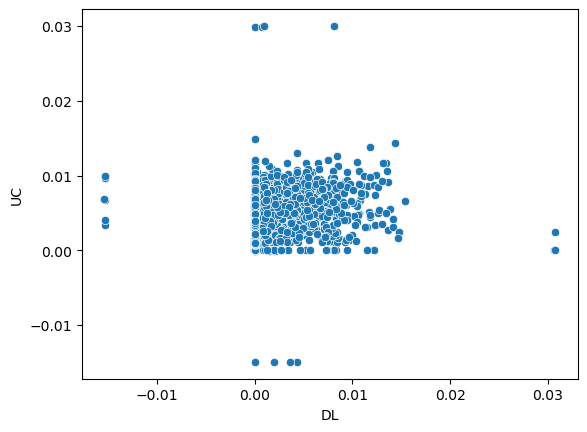

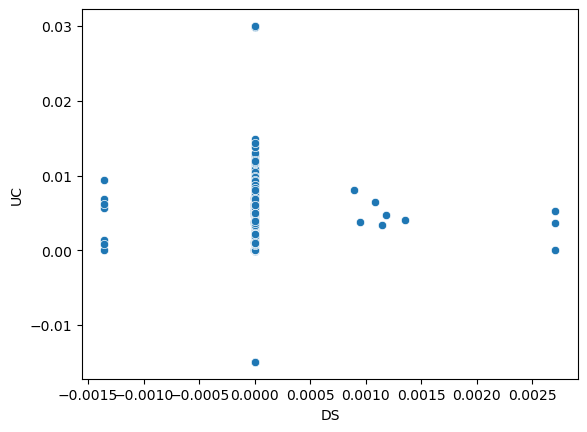

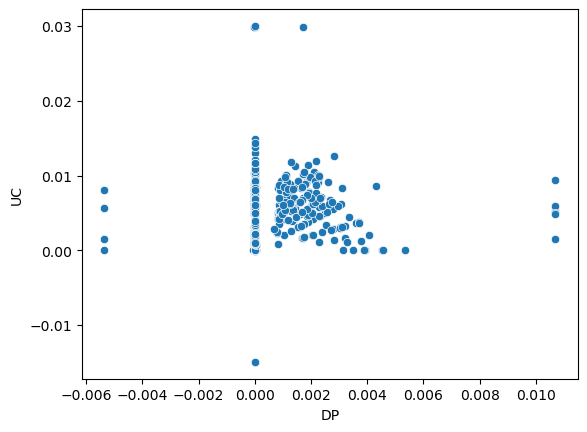

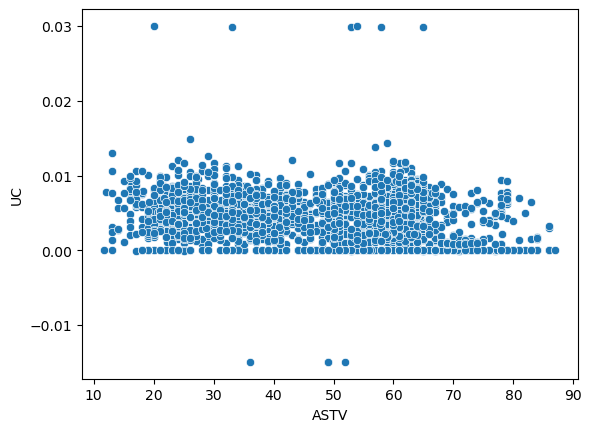

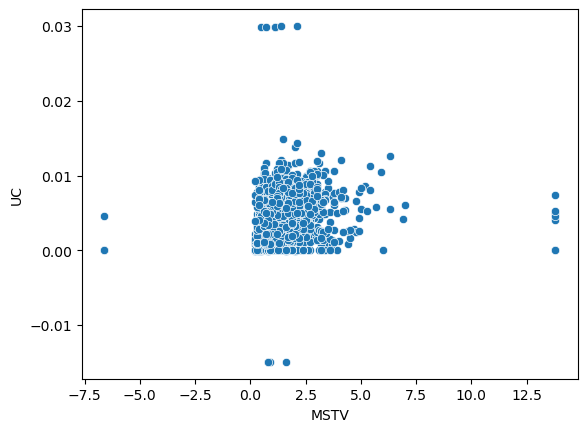

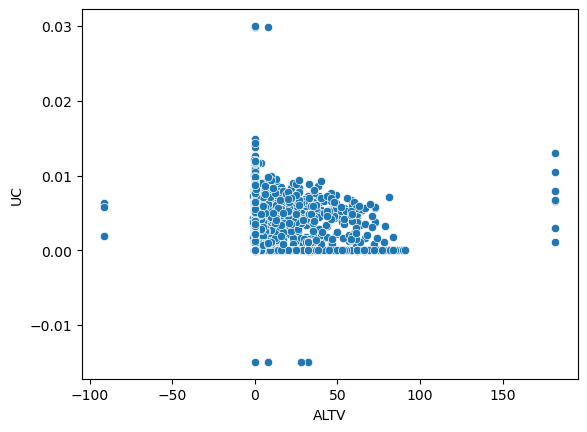

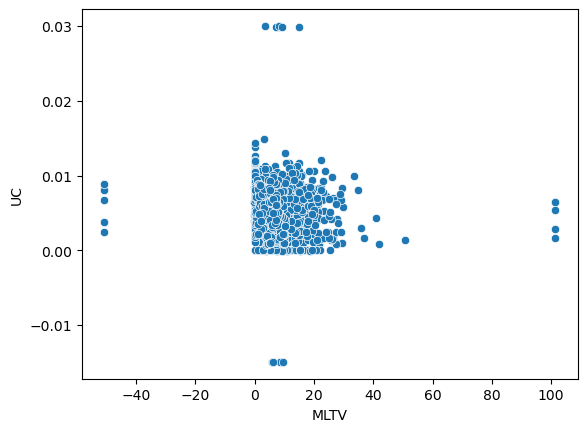

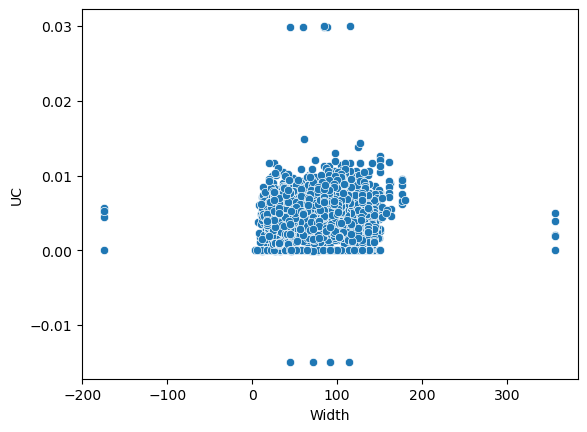

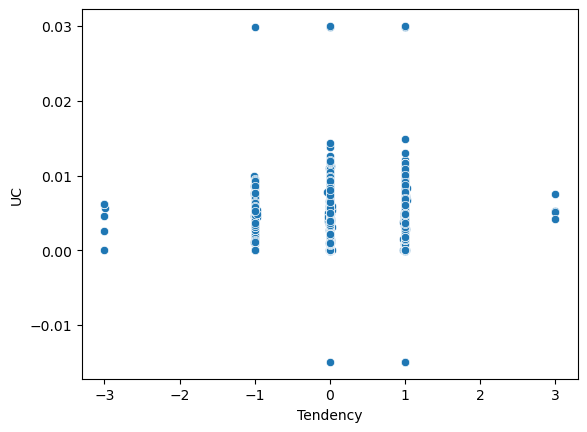

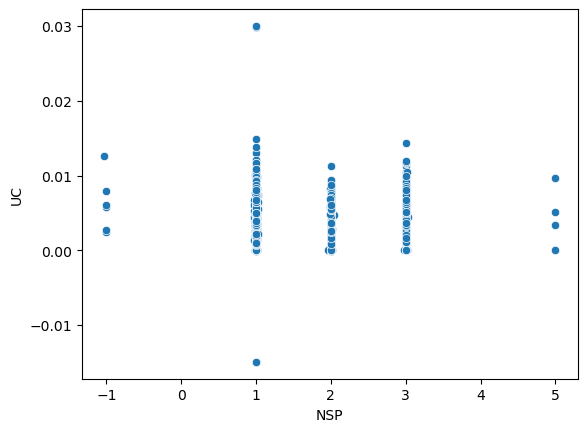

In [222]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM','DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV','Width','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="UC")
    plt.show()

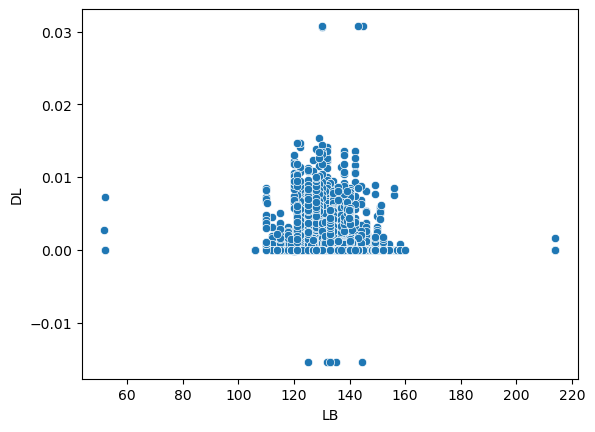

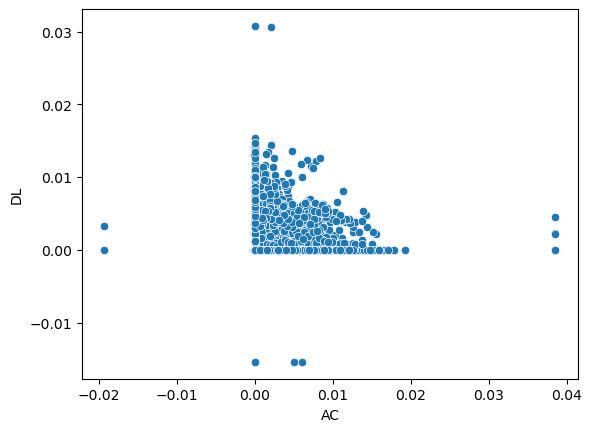

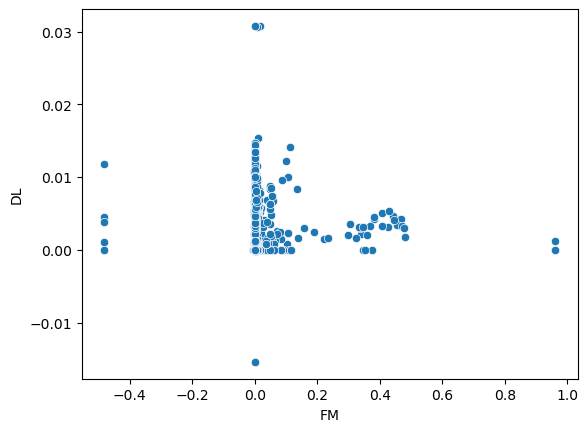

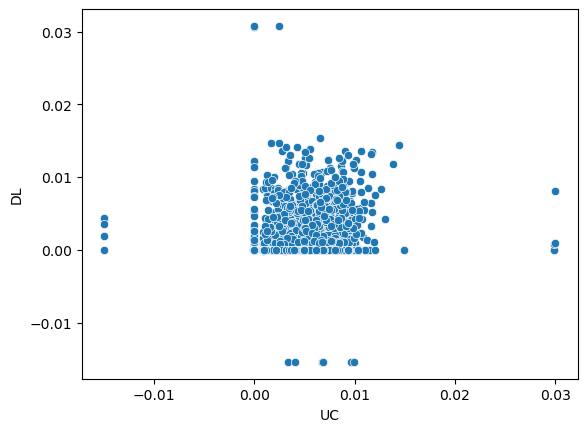

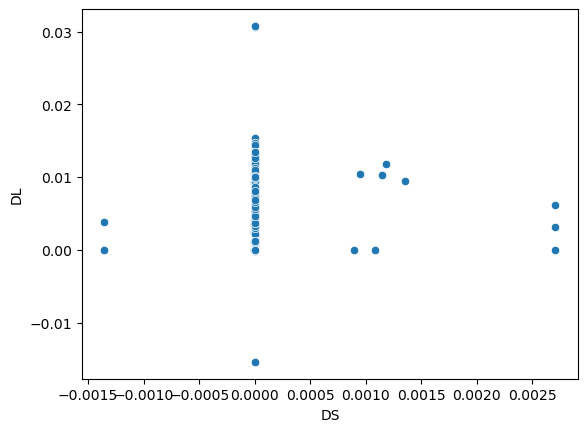

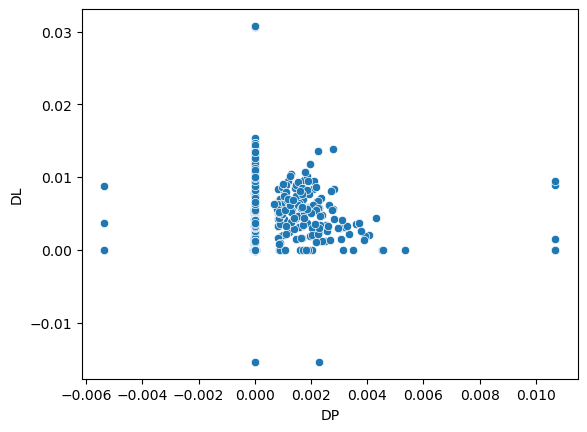

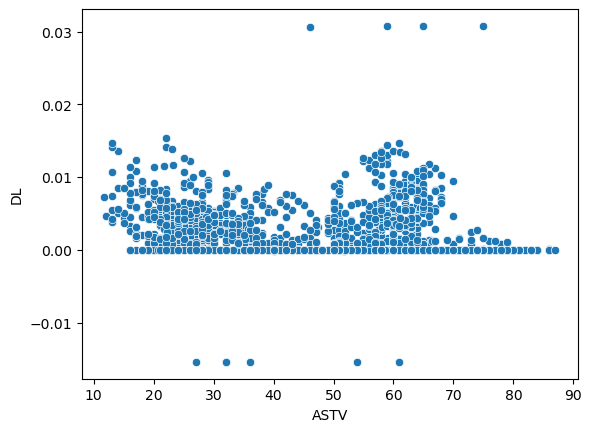

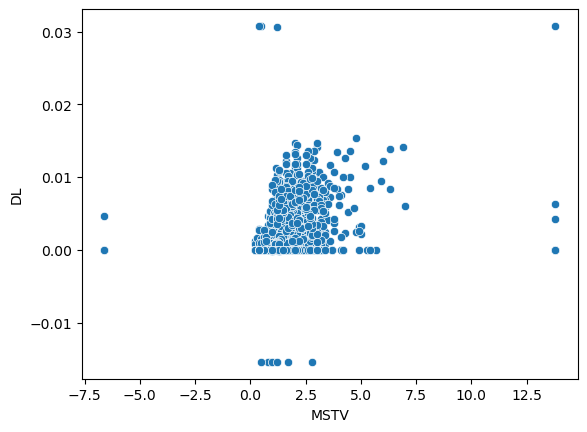

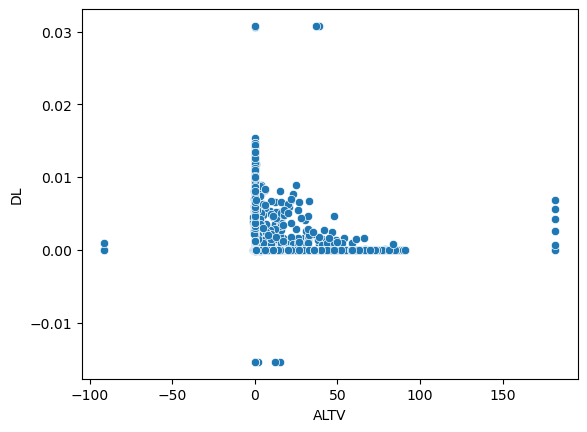

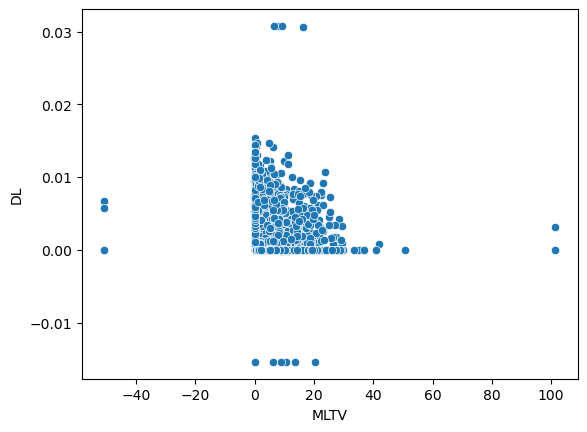

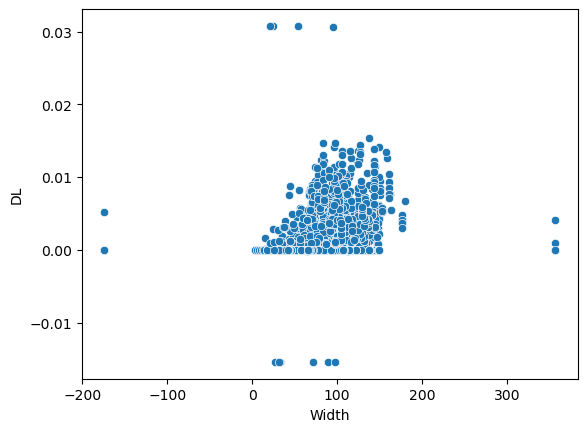

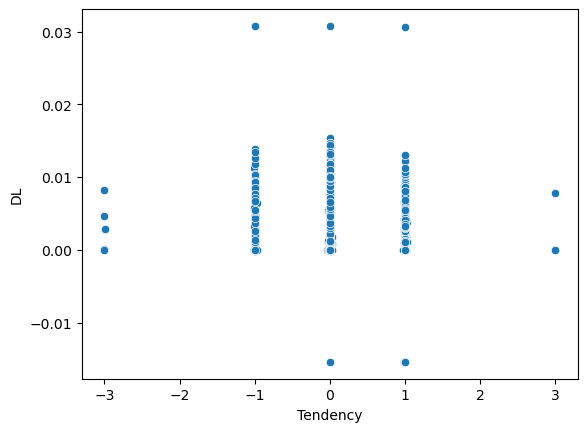

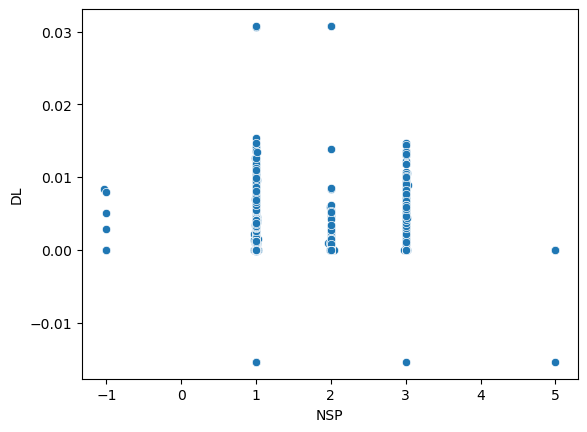

In [224]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM', 'UC','DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV','Width','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="DL")
    plt.show()

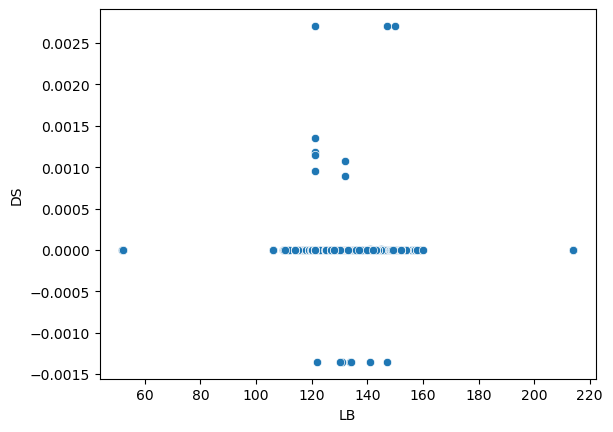

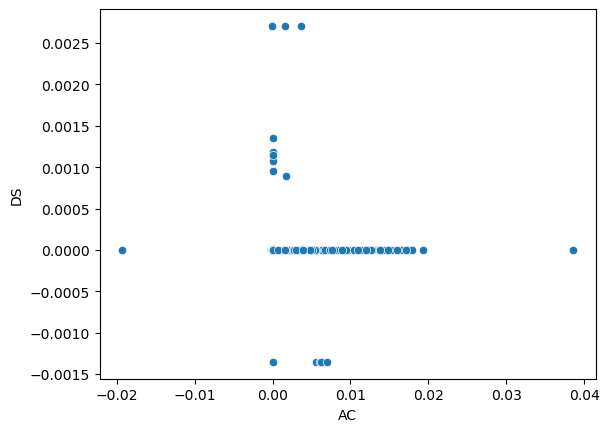

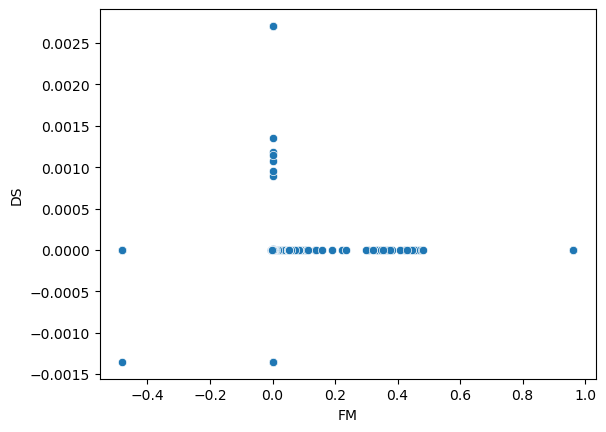

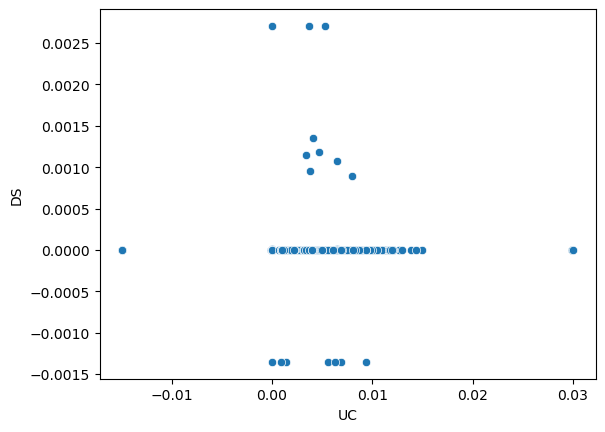

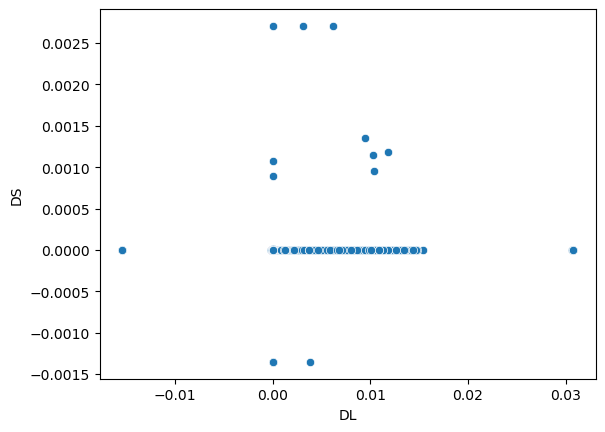

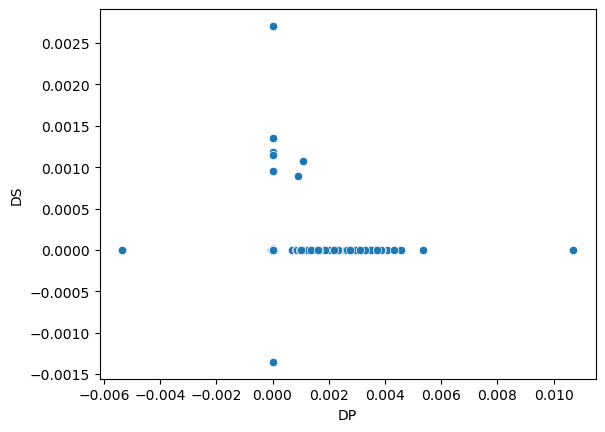

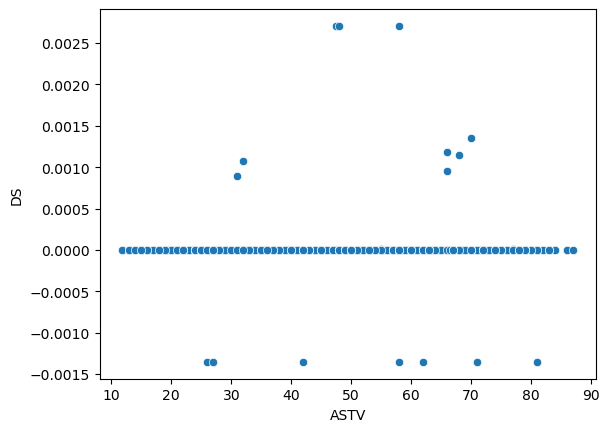

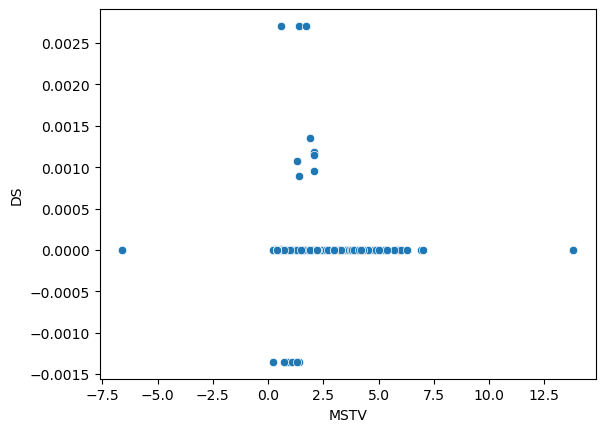

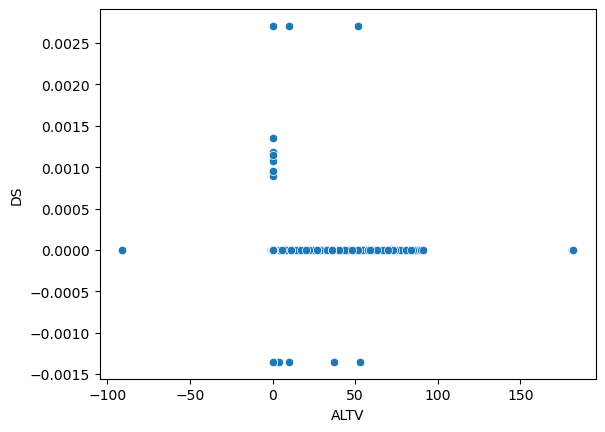

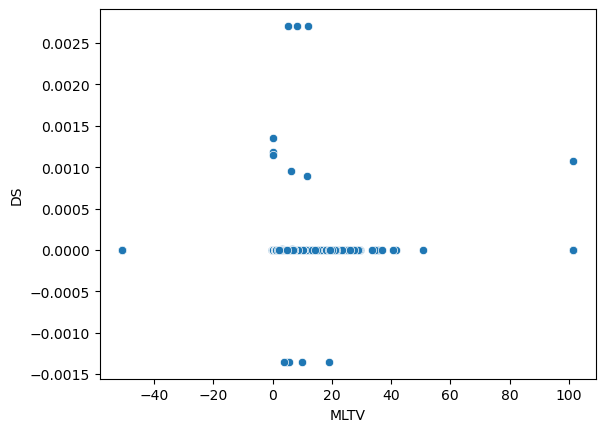

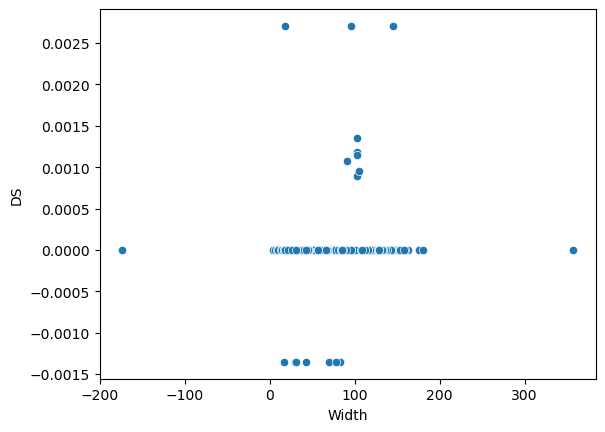

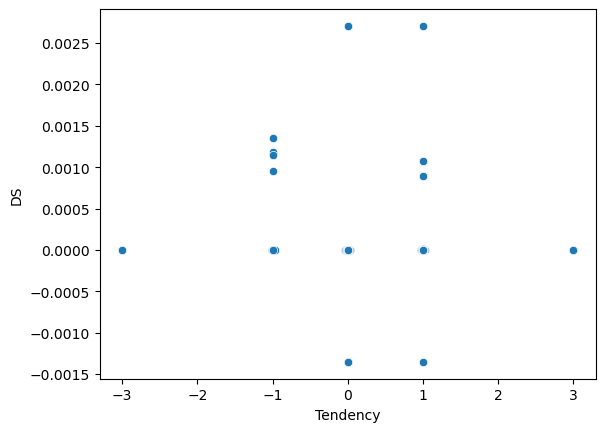

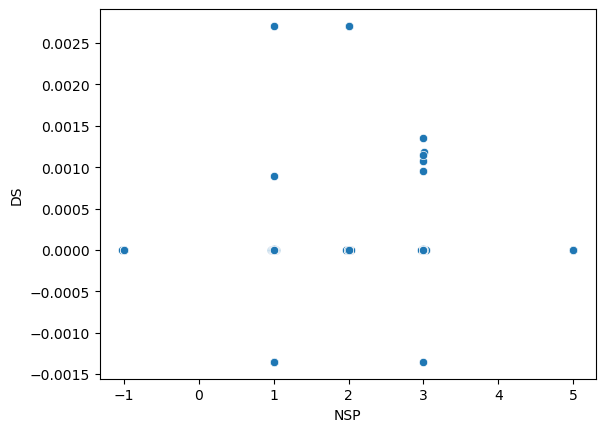

In [226]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM', 'UC','DL', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV','Width','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="DS")
    plt.show()

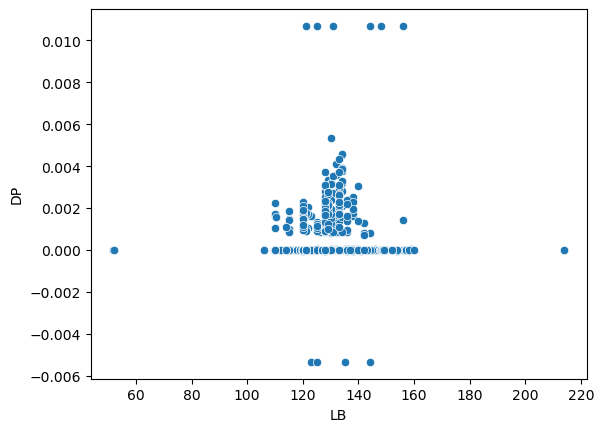

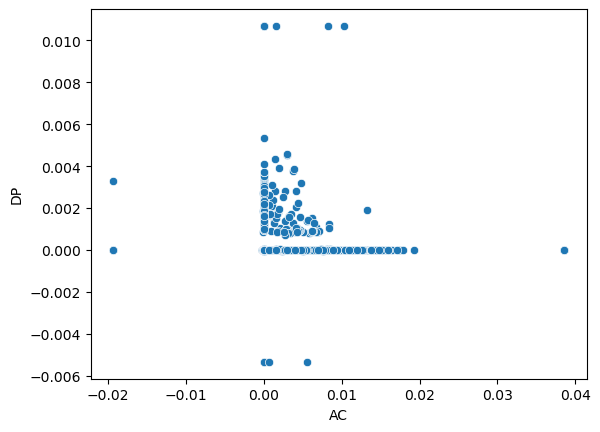

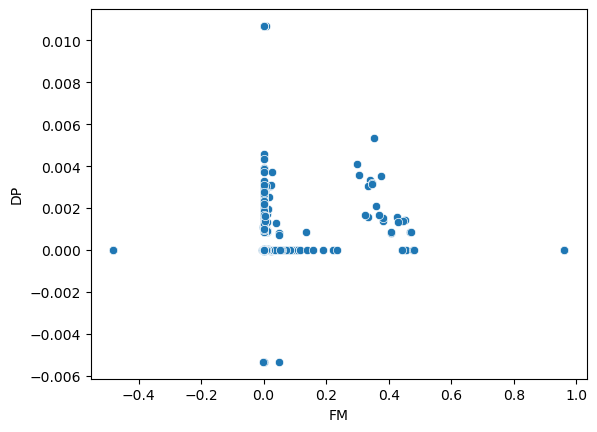

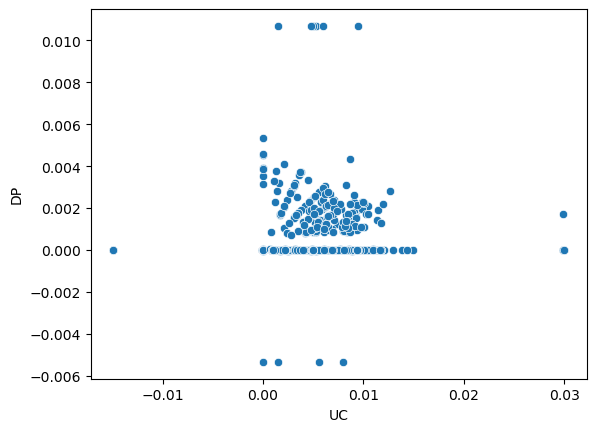

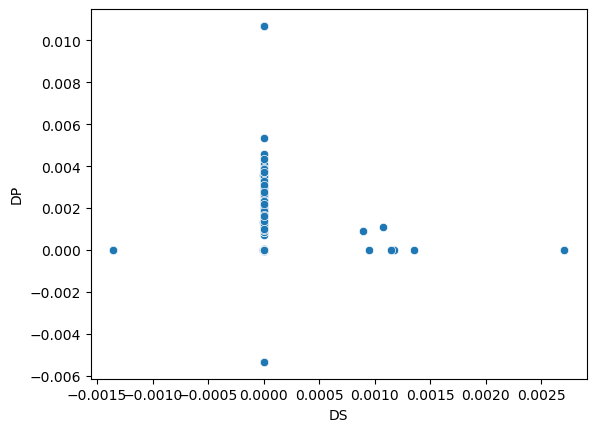

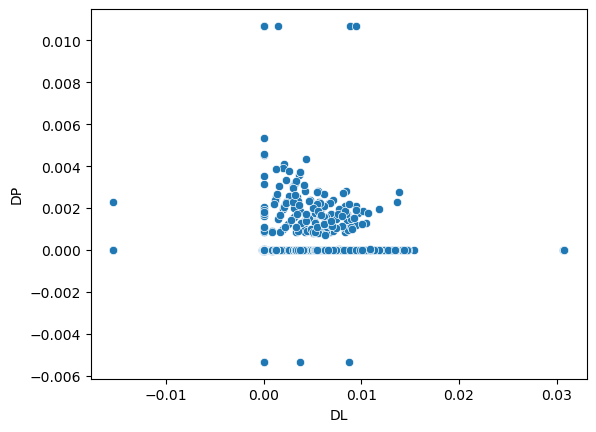

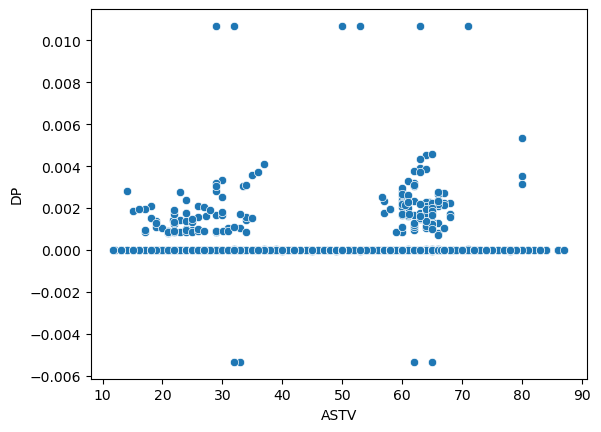

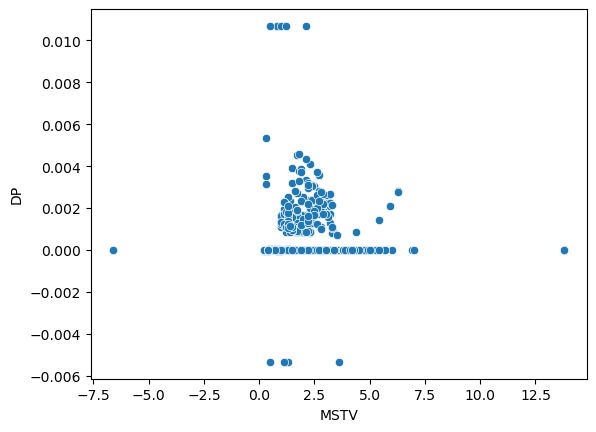

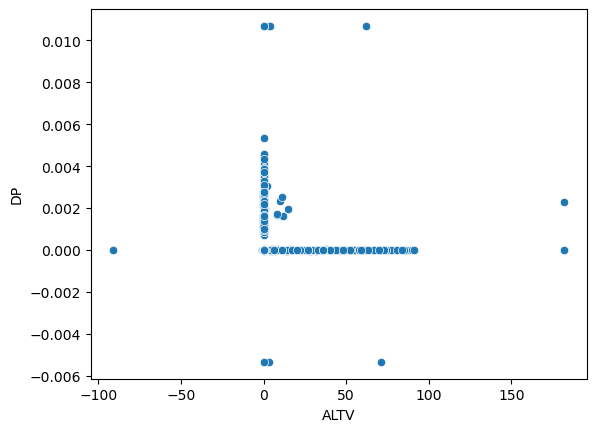

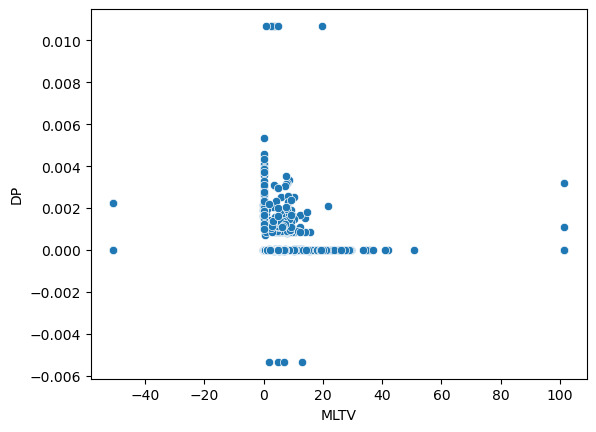

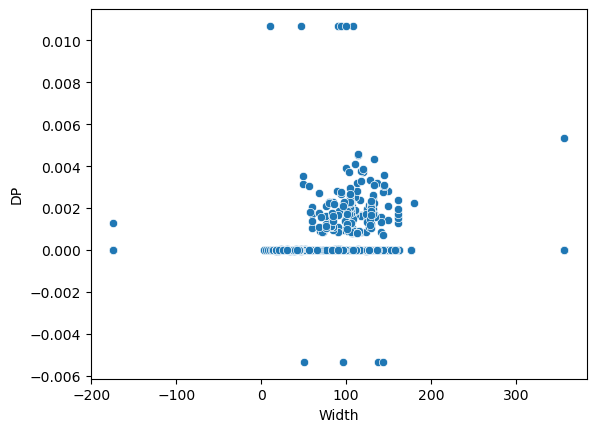

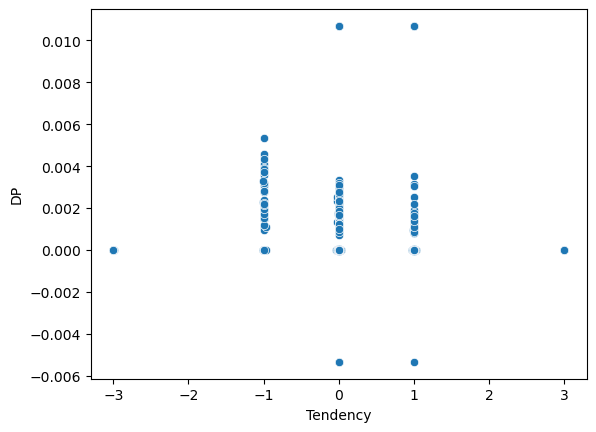

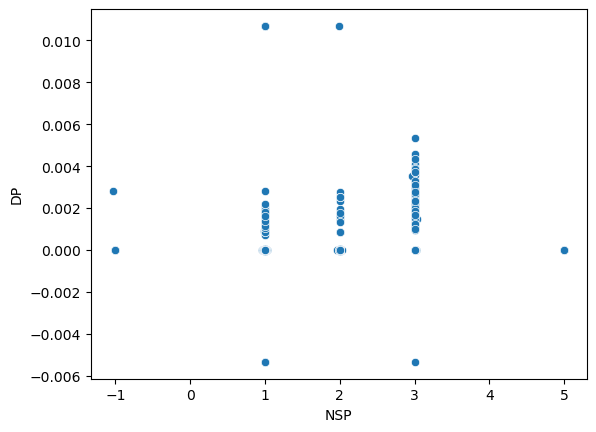

In [228]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM', 'UC','DS', 'DL', 'ASTV', 'MSTV', 'ALTV',
       'MLTV','Width','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="DP")
    plt.show()

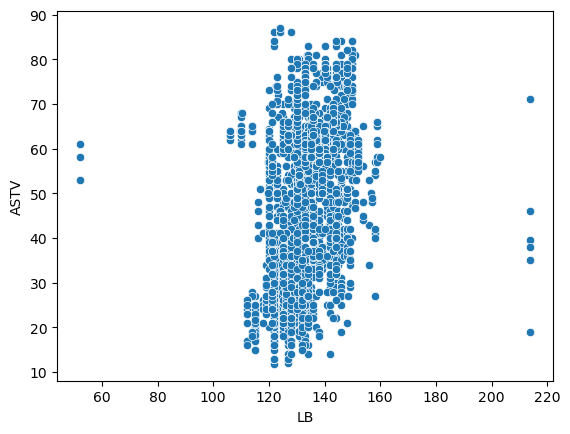

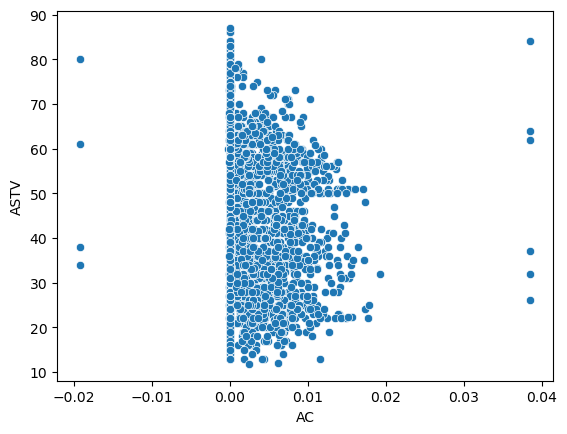

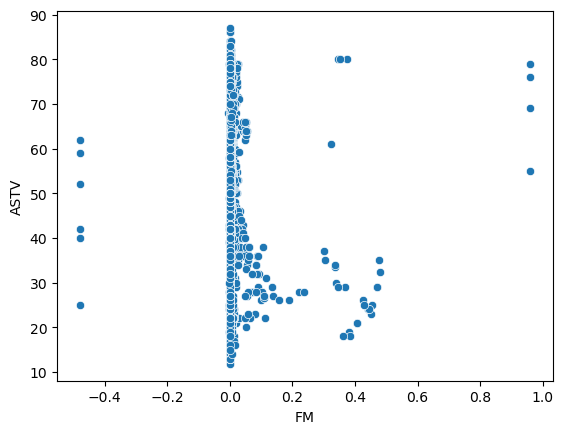

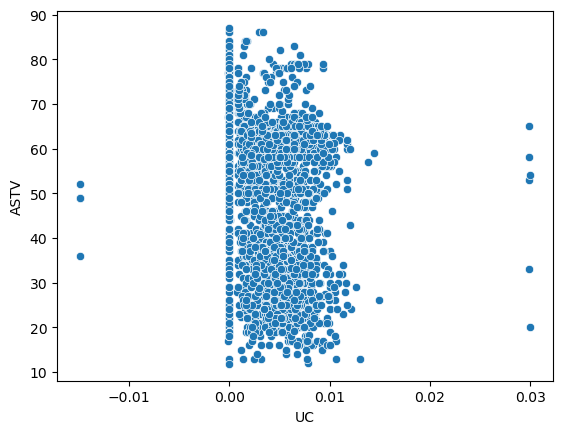

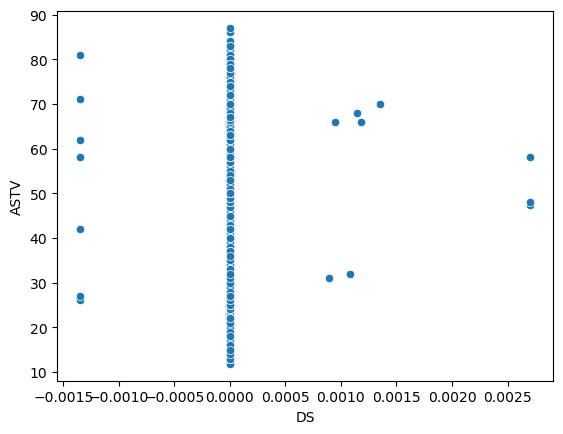

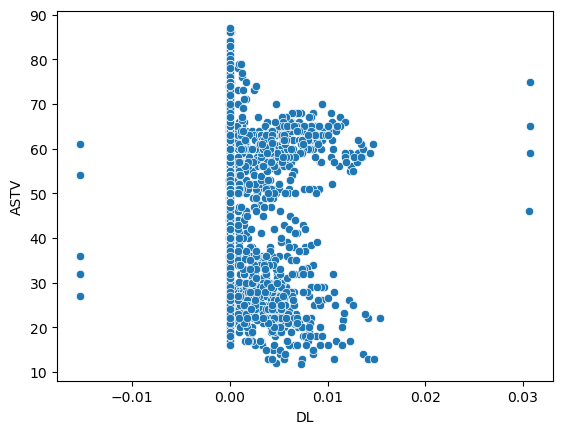

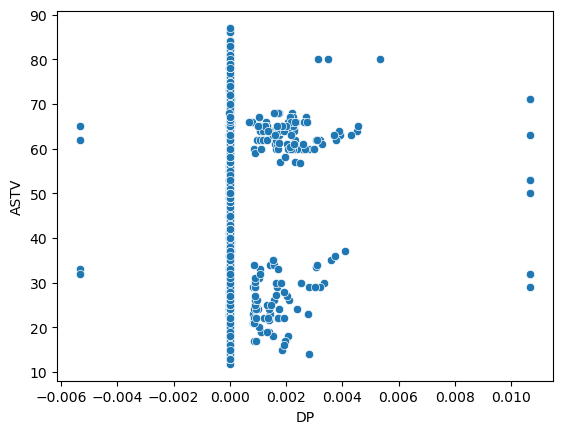

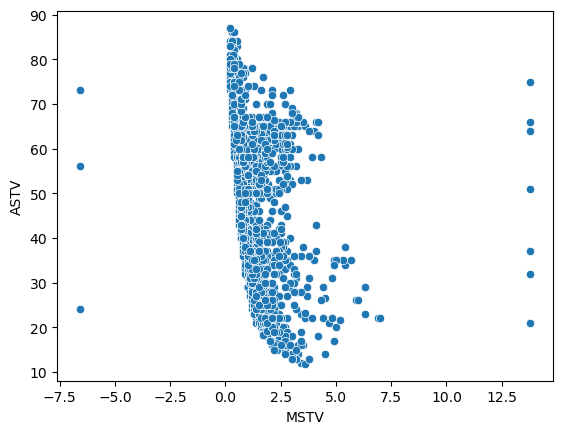

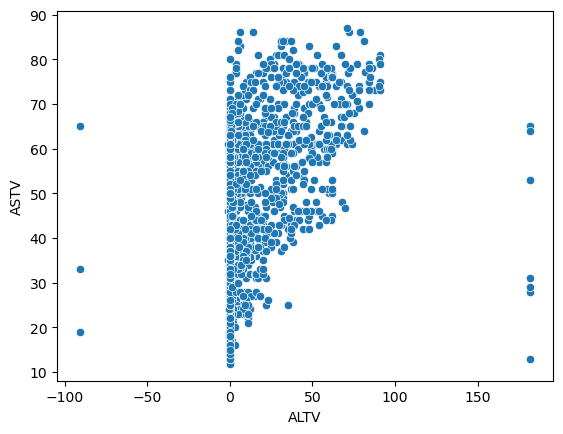

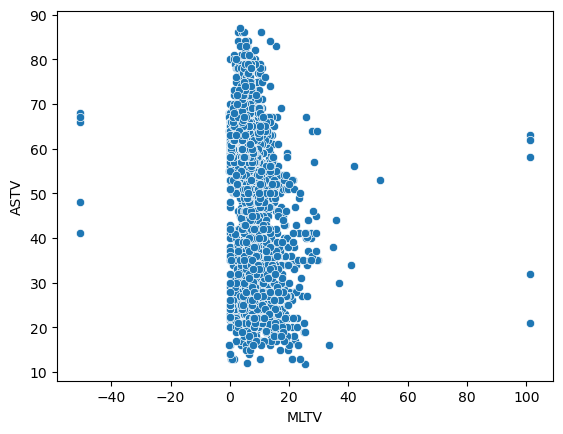

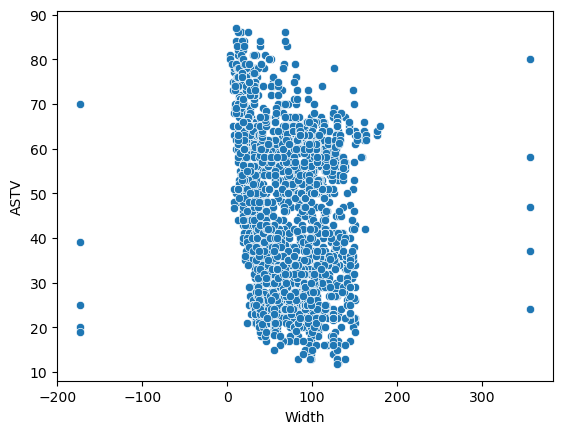

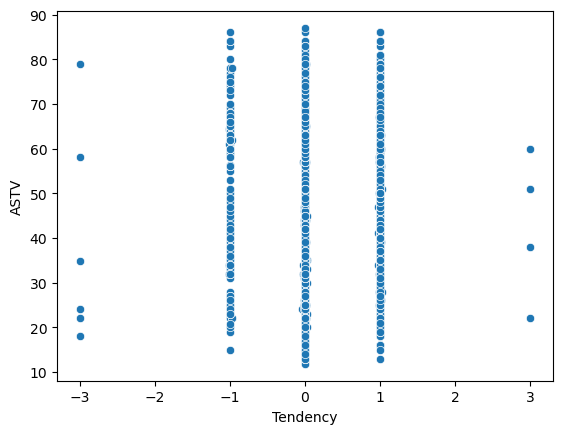

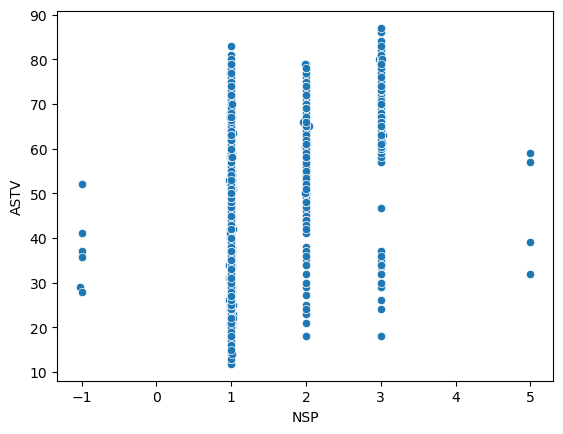

In [230]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM', 'UC','DS', 'DL', 'DP', 'MSTV', 'ALTV',
       'MLTV','Width','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="ASTV")
    plt.show()

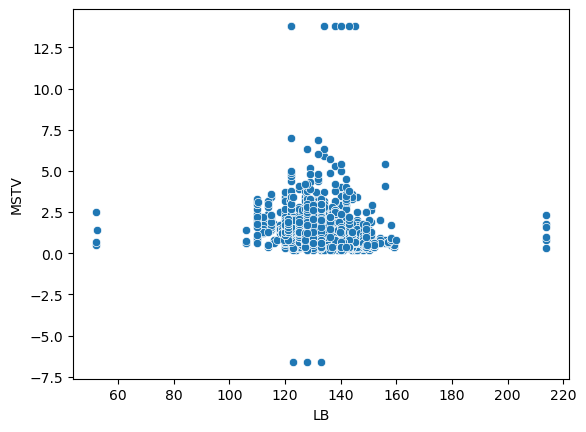

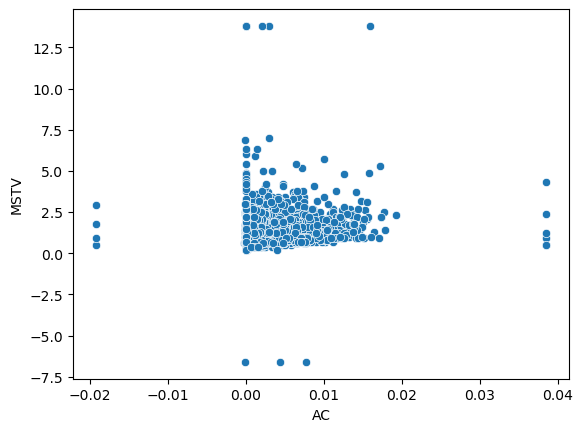

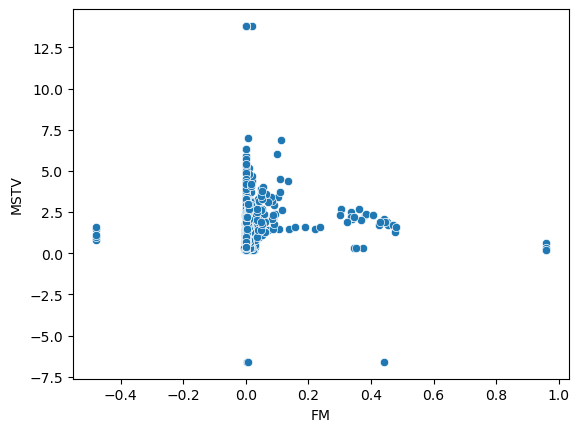

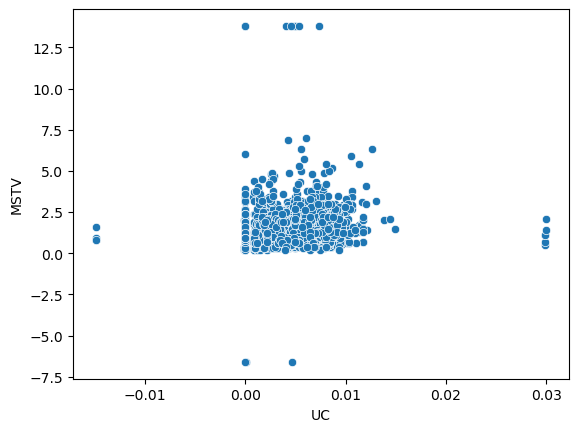

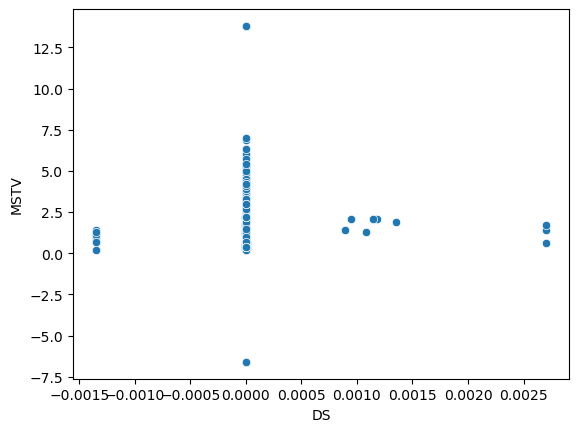

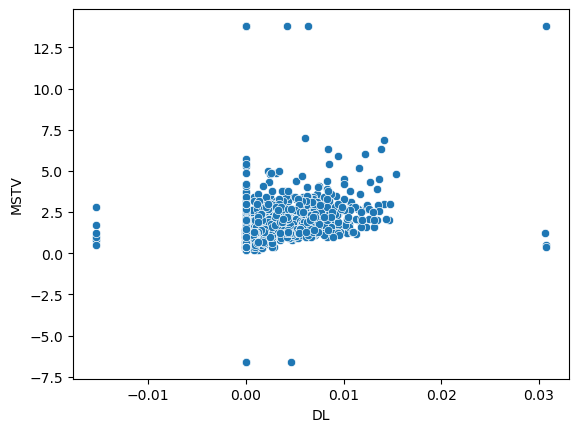

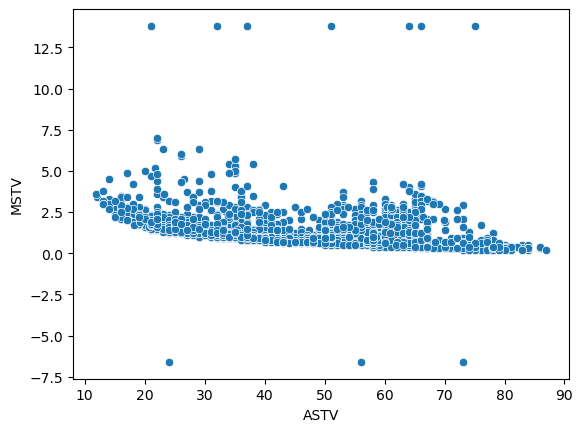

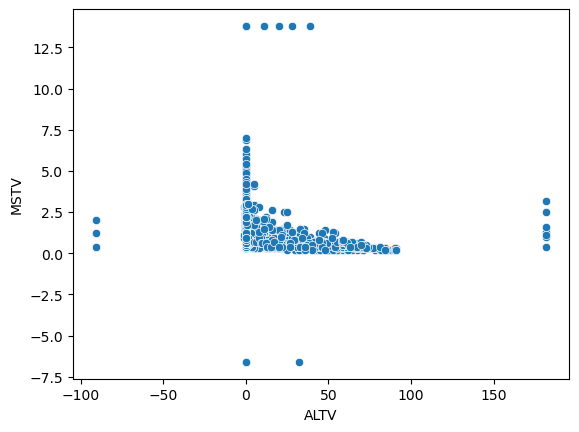

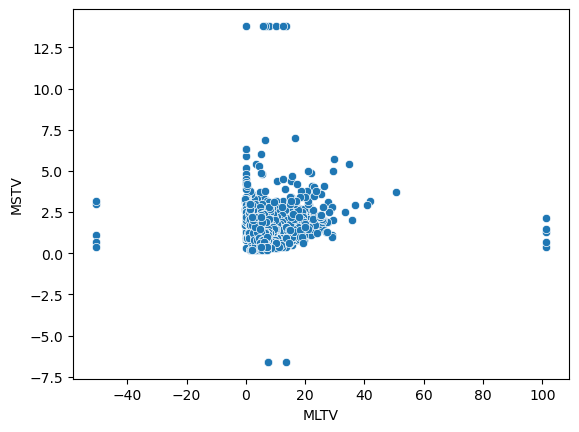

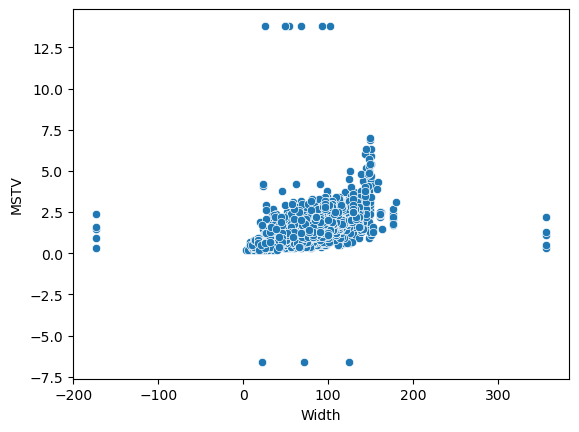

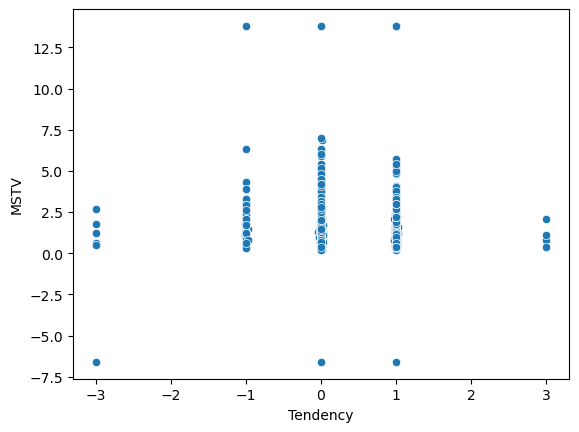

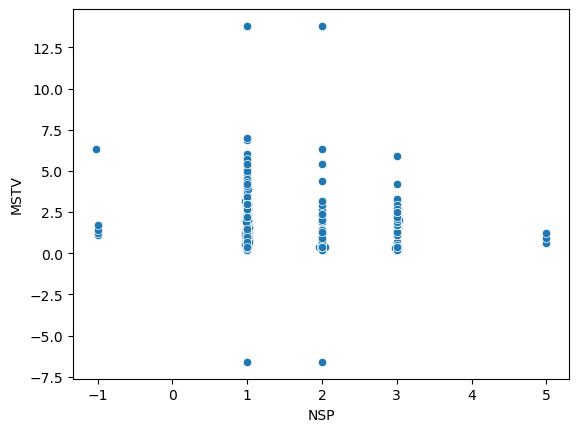

In [232]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM', 'UC','DS', 'DL', 'ASTV','ALTV',
       'MLTV','Width','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="MSTV")
    plt.show()

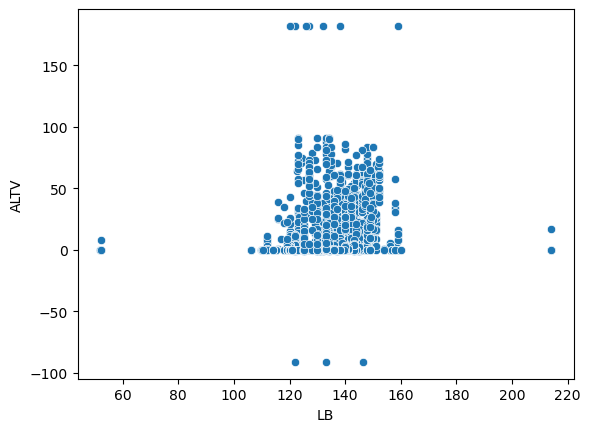

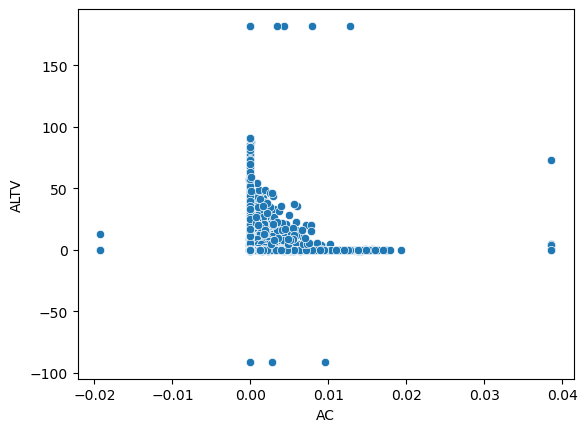

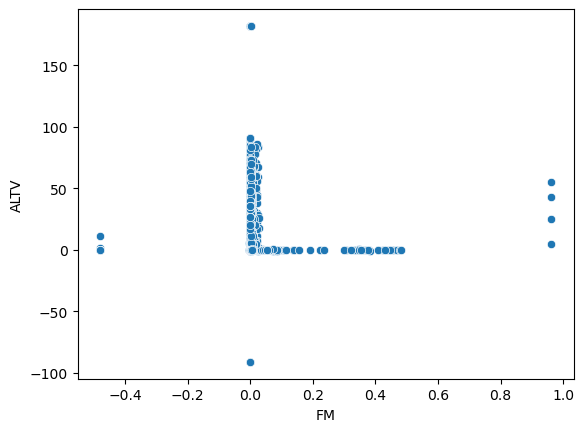

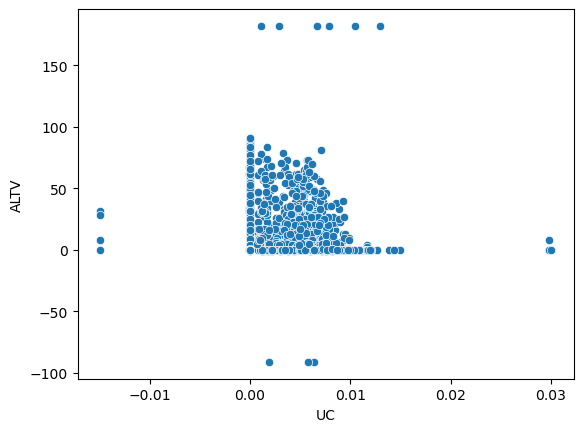

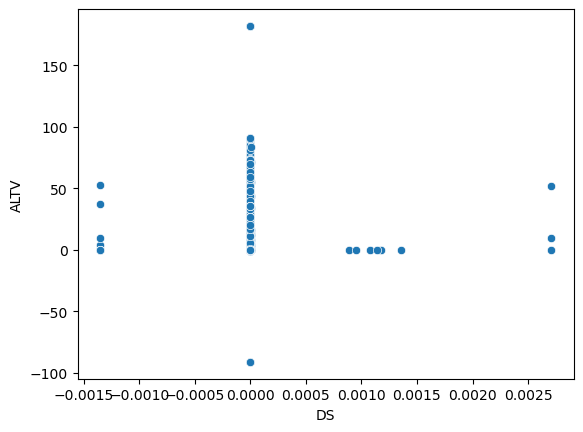

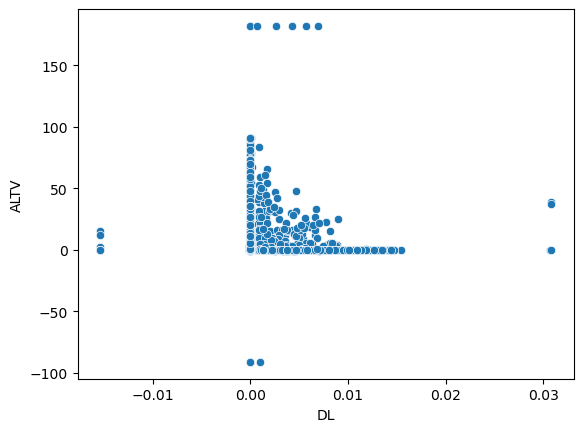

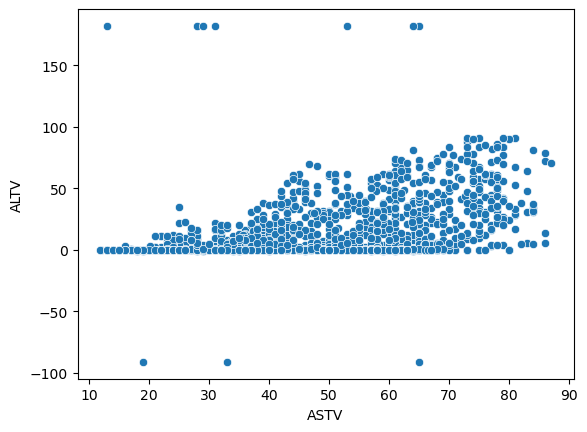

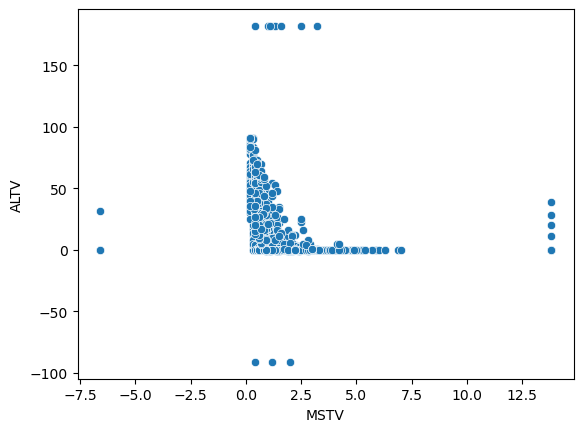

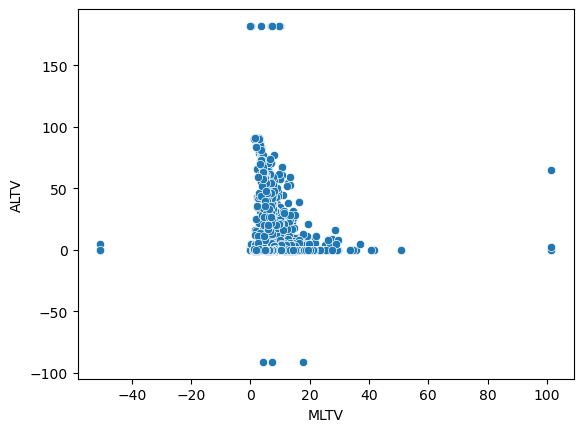

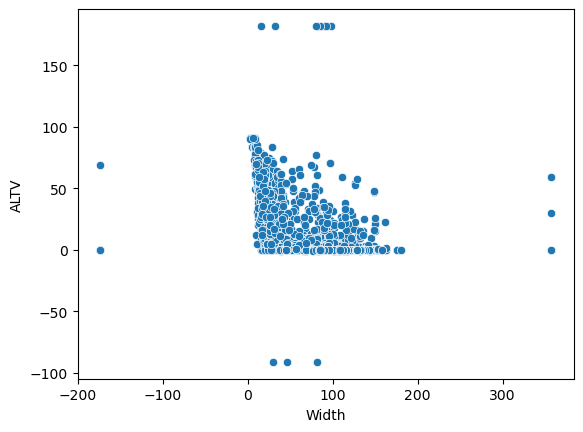

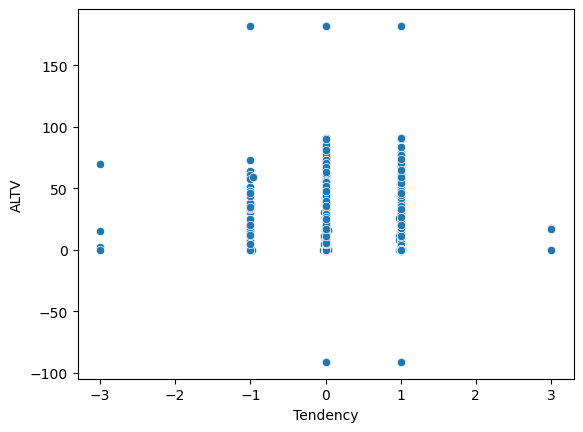

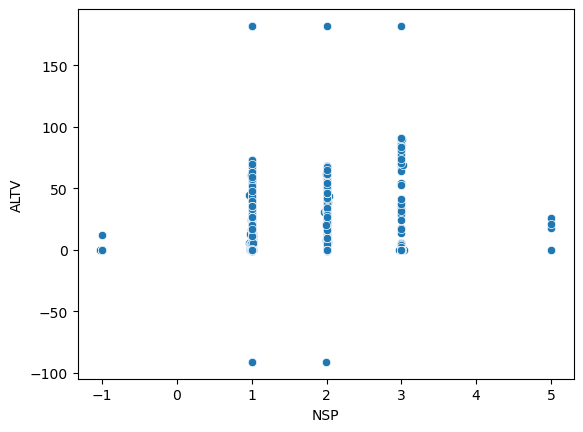

In [234]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM', 'UC','DS', 'DL', 'ASTV', 'MSTV',
       'MLTV','Width','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="ALTV")
    plt.show()

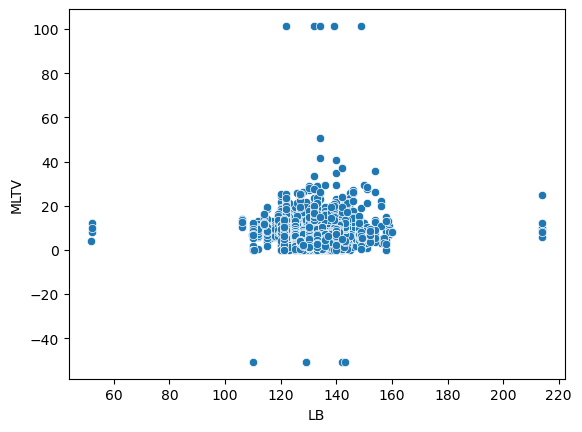

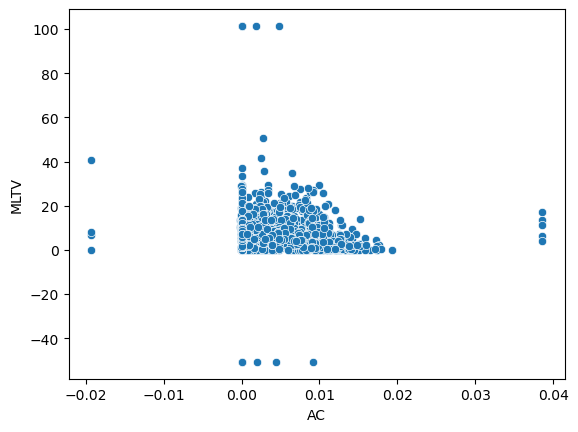

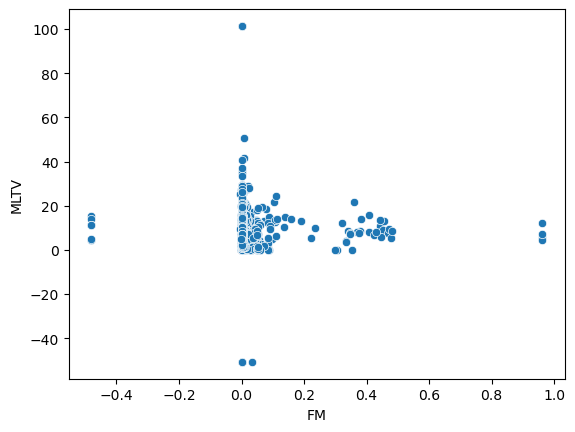

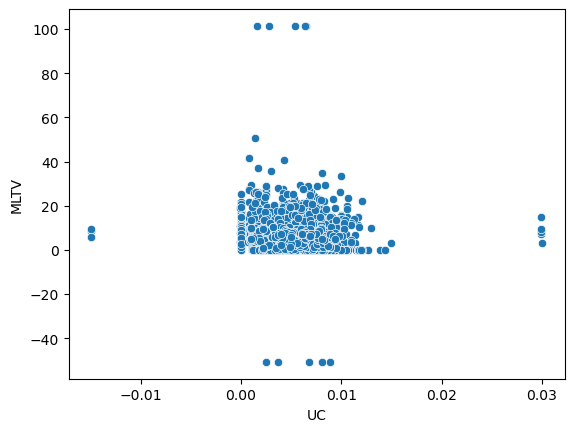

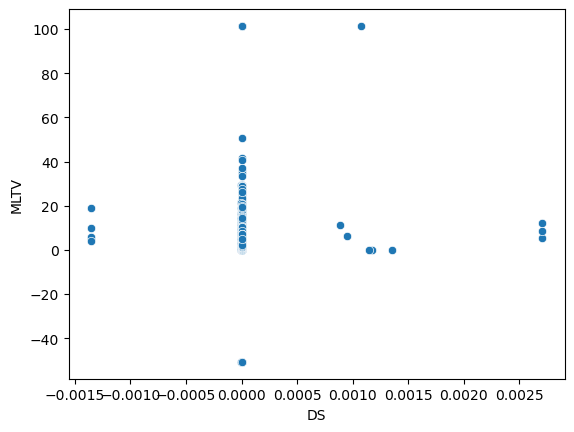

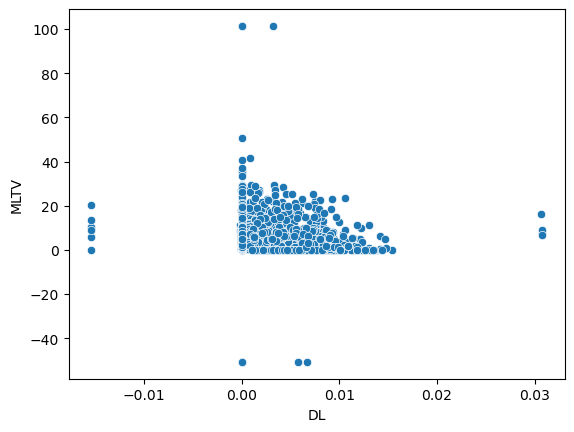

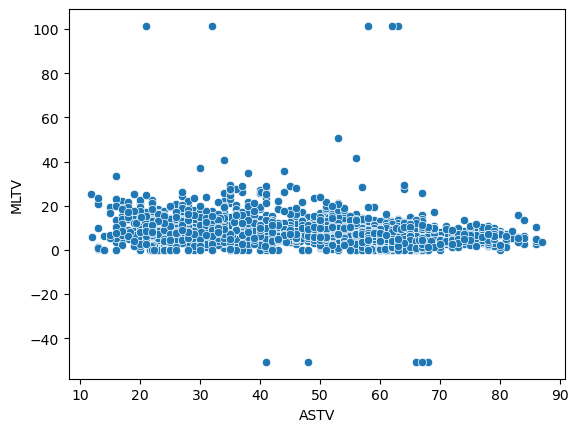

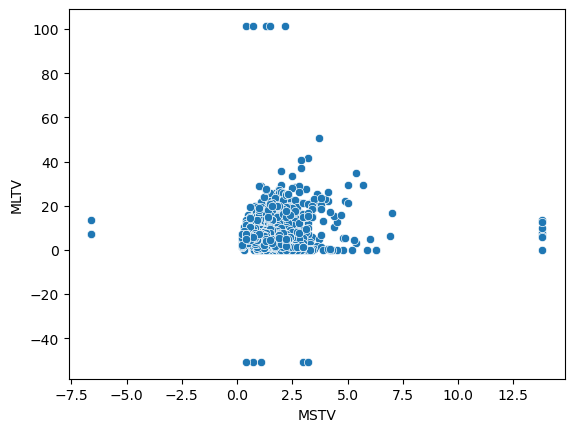

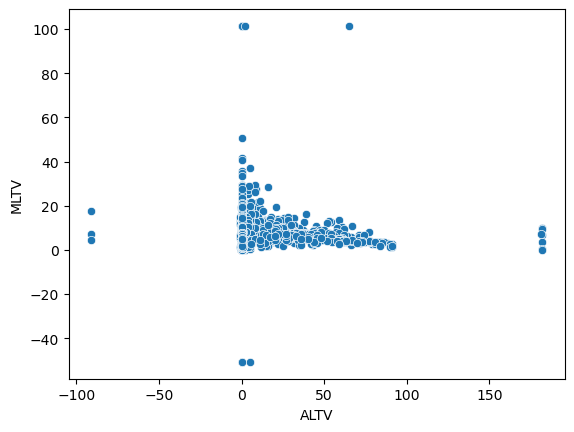

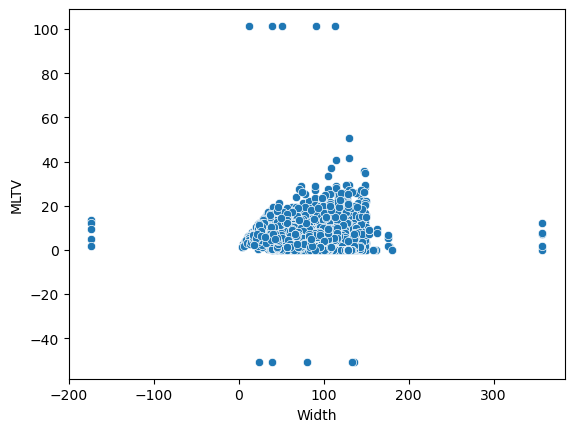

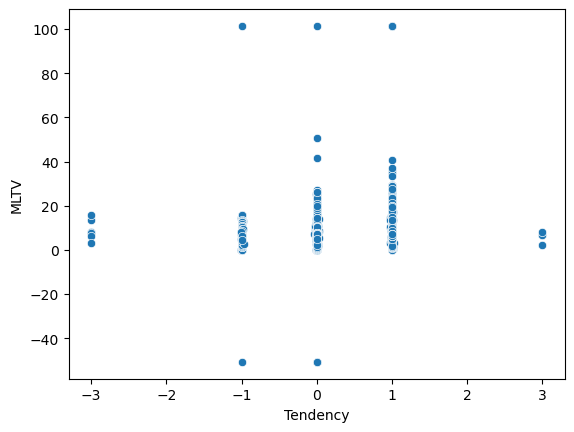

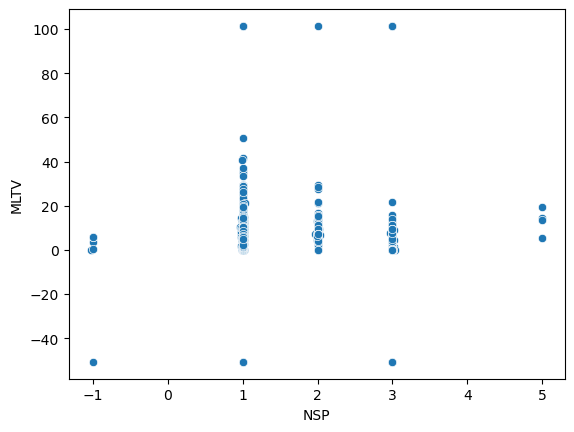

In [236]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM', 'UC','DS', 'DL', 'ASTV', 'MSTV', 'ALTV',
       'Width','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="MLTV")
    plt.show()

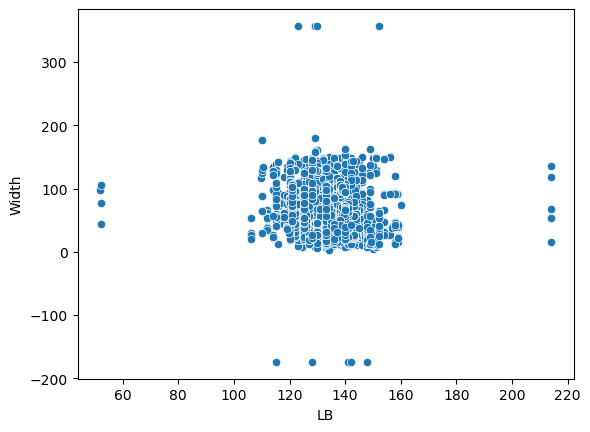

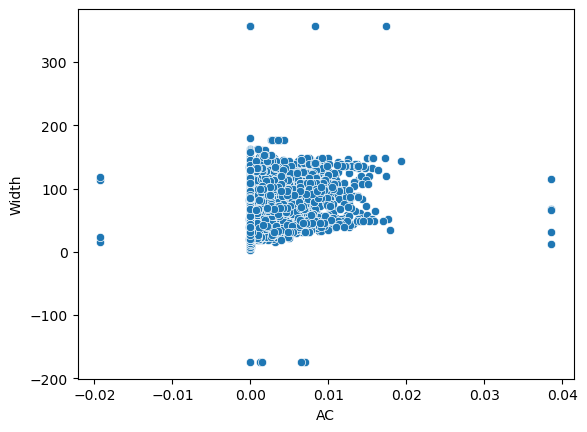

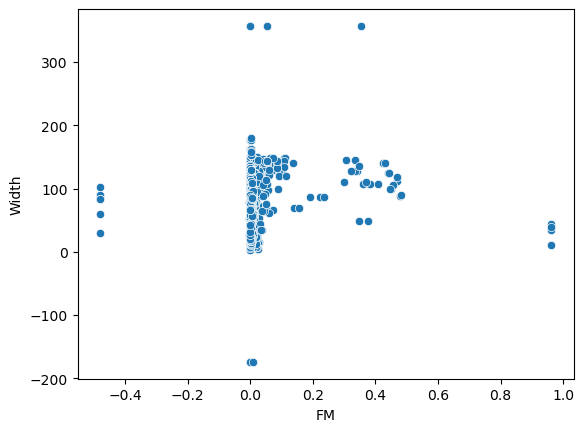

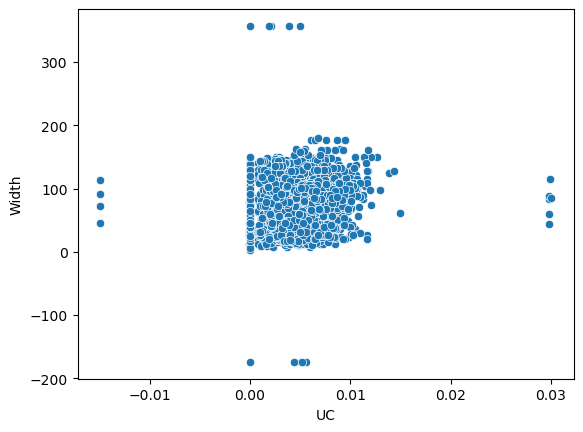

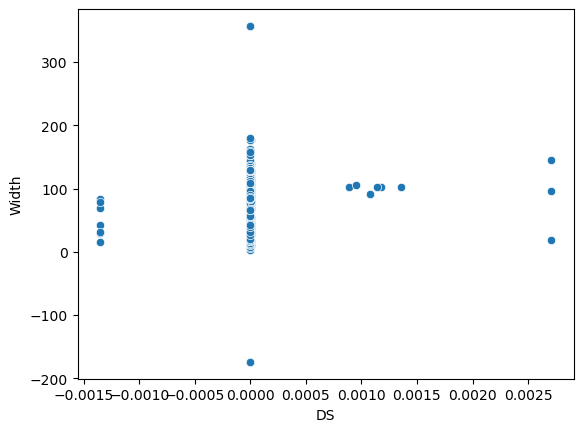

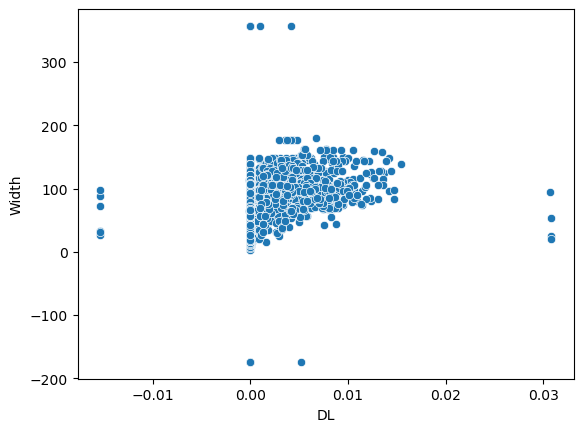

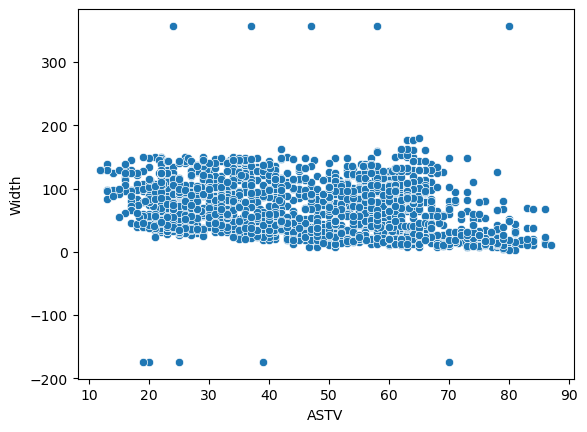

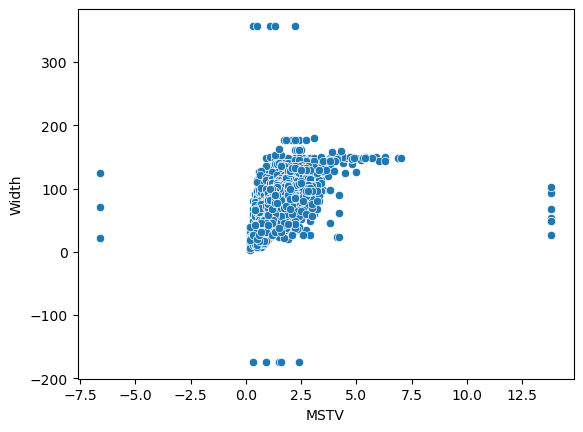

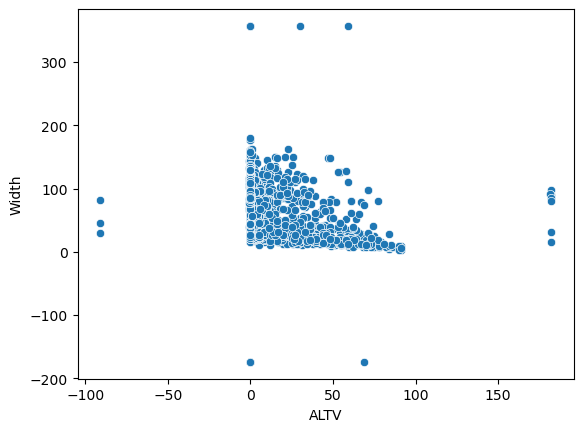

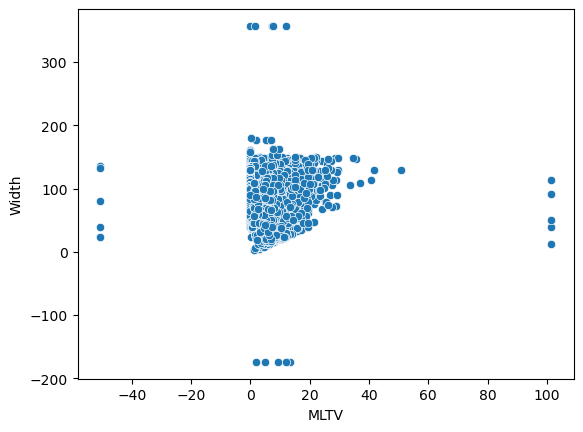

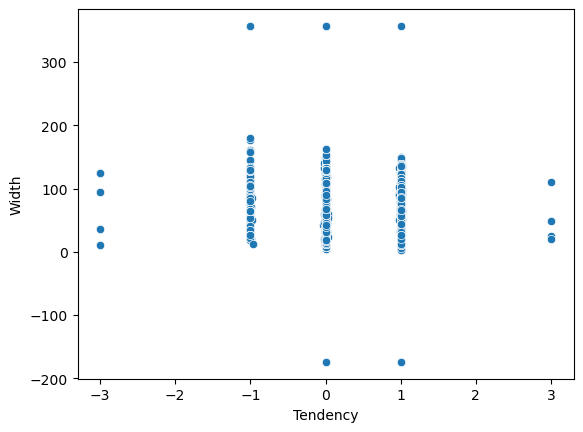

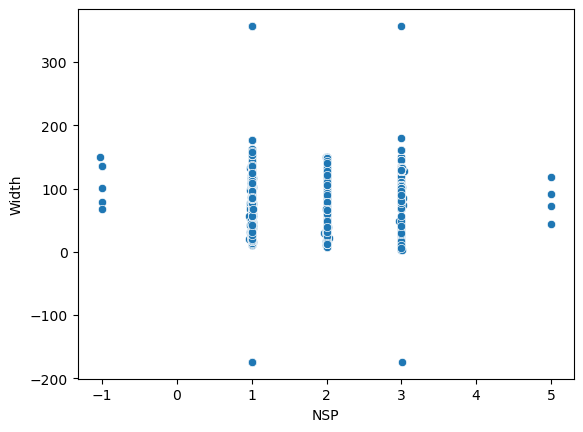

In [238]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM', 'UC','DS', 'DL', 'ASTV', 'MSTV', 'ALTV',
       'MLTV','Tendency','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="Width")
    plt.show()

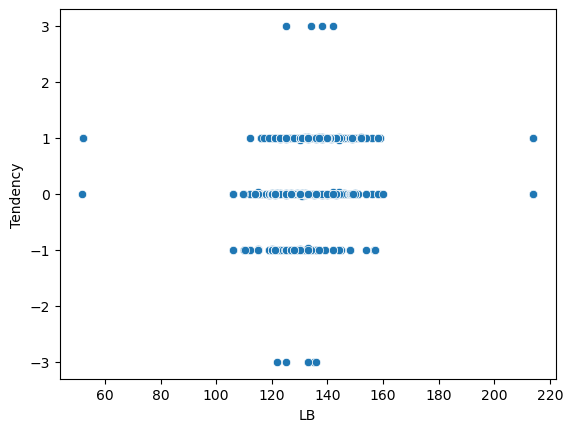

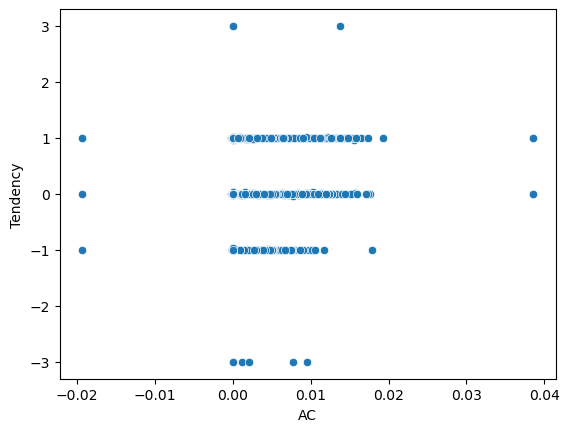

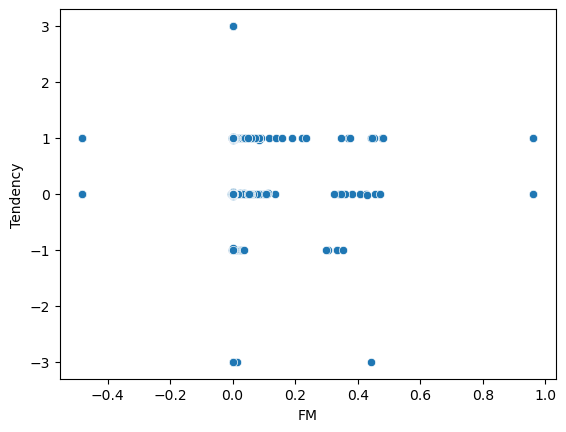

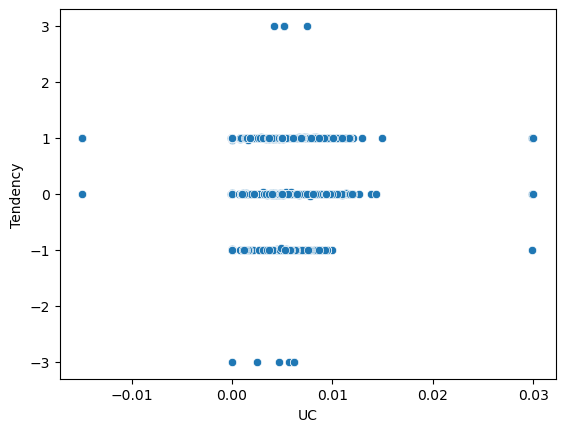

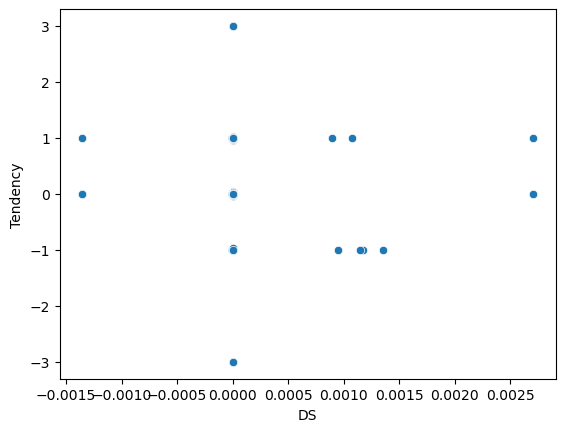

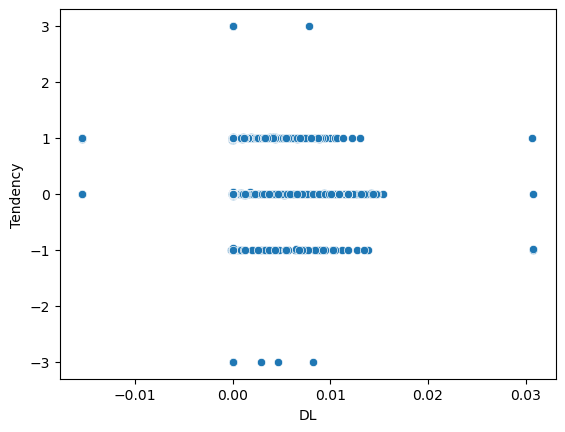

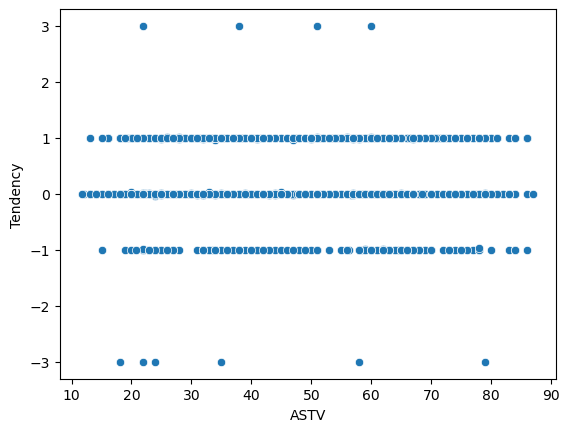

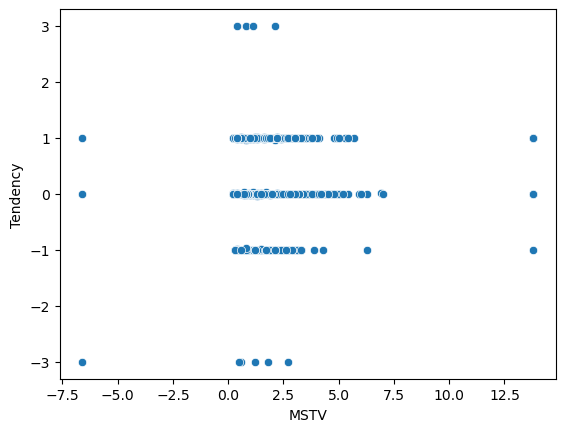

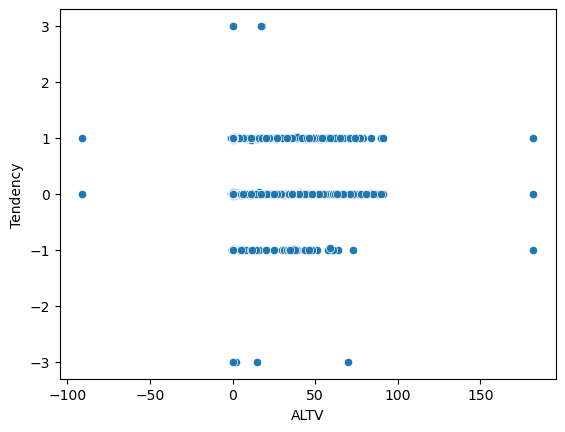

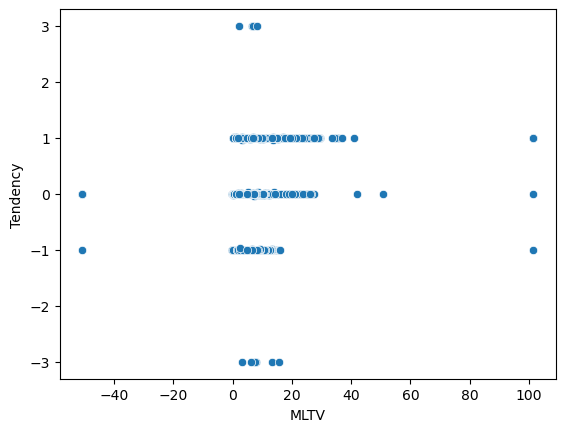

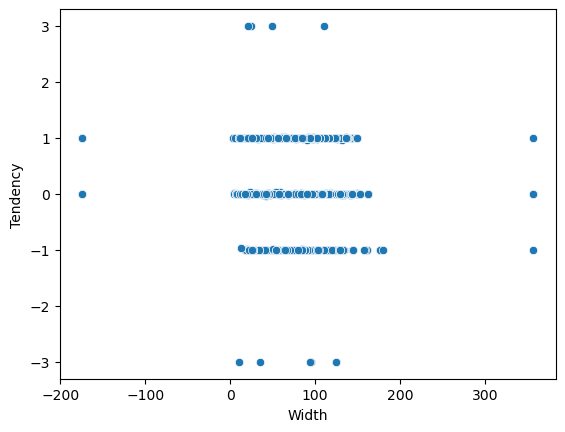

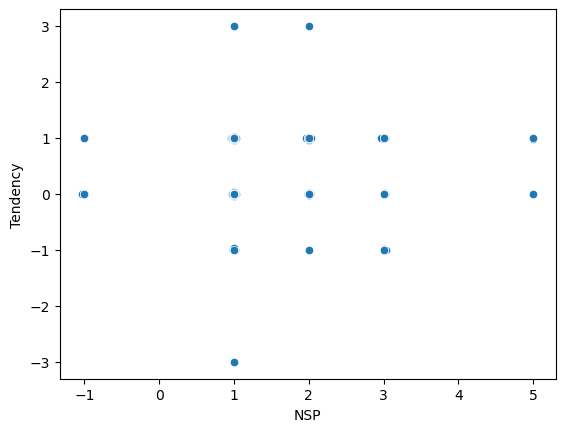

In [240]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM', 'UC','DS', 'DL', 'ASTV', 'MSTV', 'ALTV',
       'MLTV','Width','NSP']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="Tendency")
    plt.show()

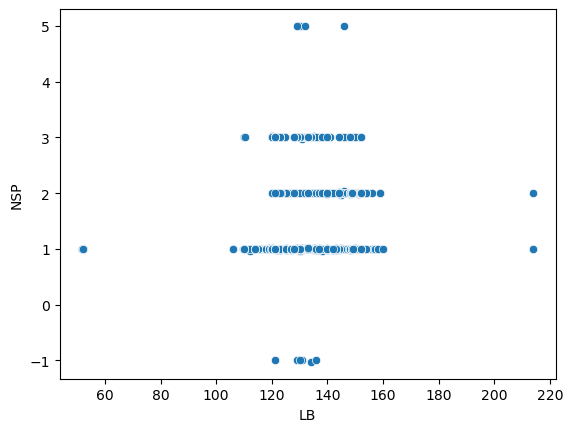

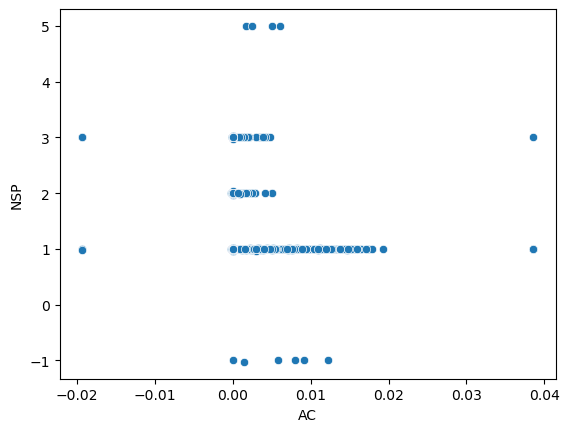

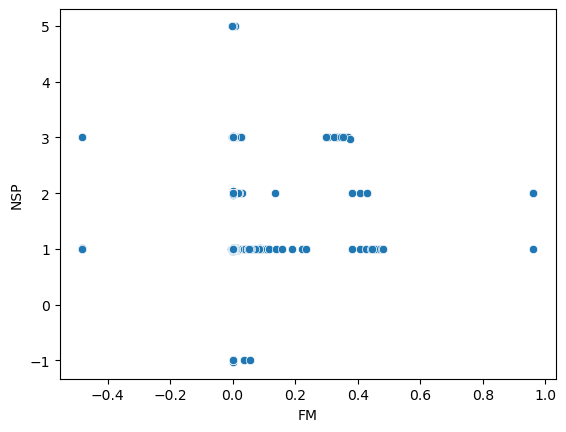

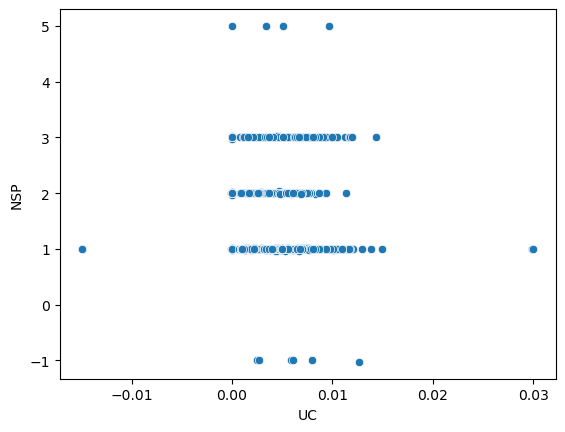

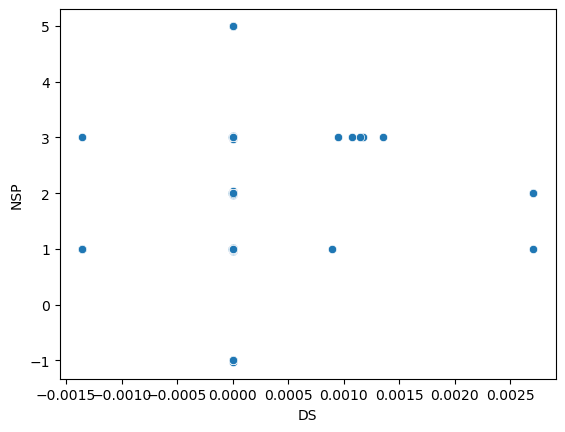

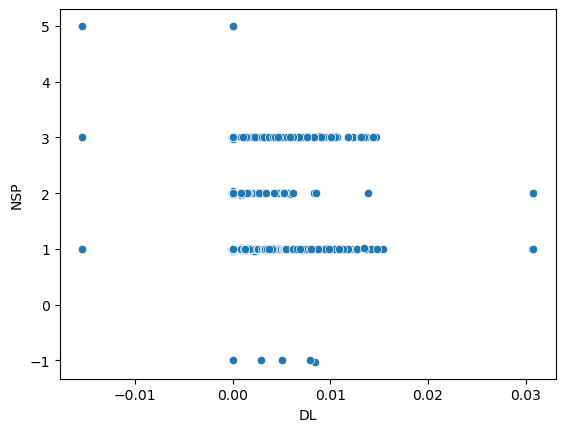

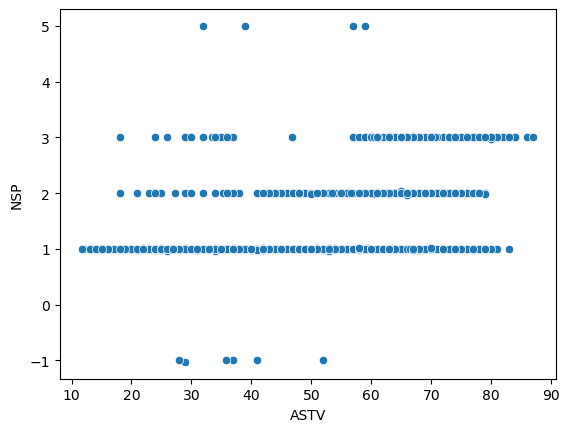

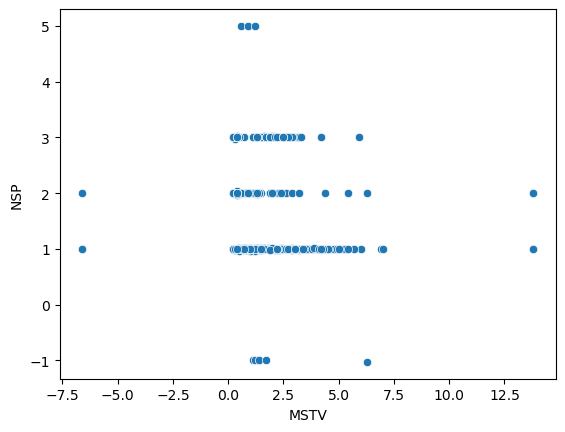

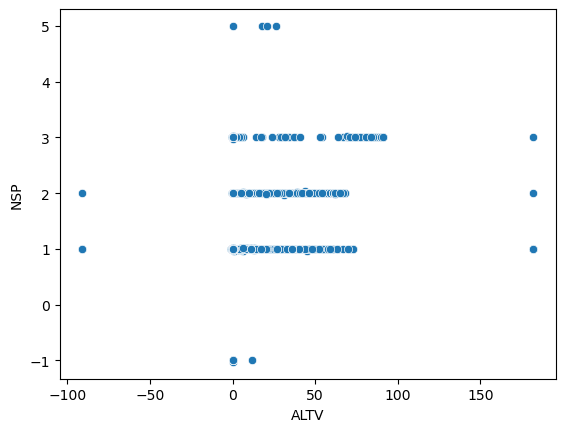

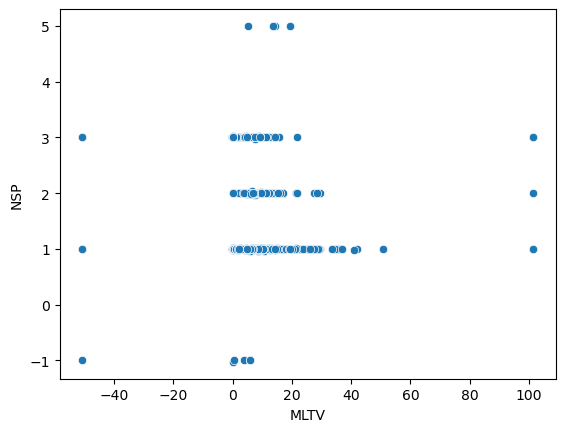

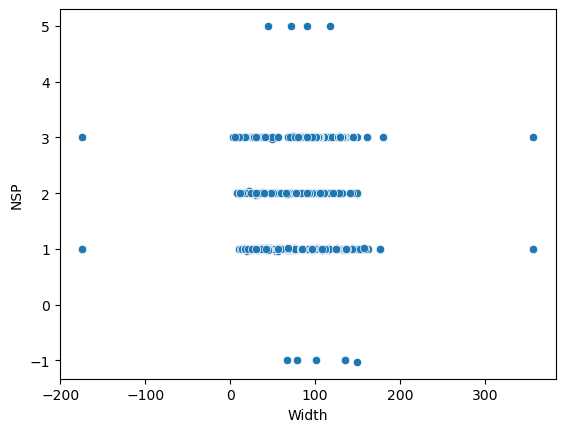

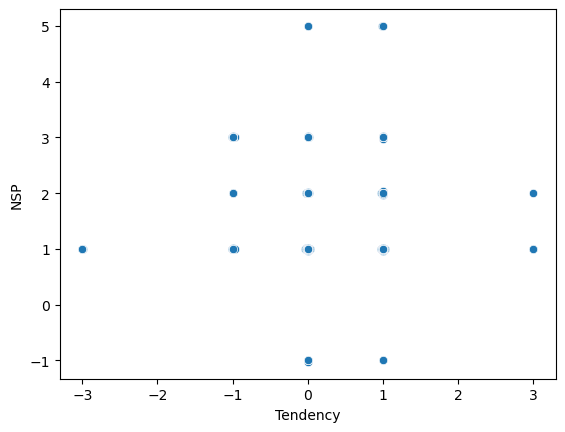

In [242]:
import warnings
warnings.filterwarnings("ignore")
for i in ['LB','AC', 'FM', 'UC','DS', 'DL', 'ASTV', 'MSTV', 'ALTV',
       'MLTV','Width','Tendency']:
    sns.scatterplot(data=cardiograph_subset,x=i,y="NSP")
    plt.show()

The correlation relationship between variables:


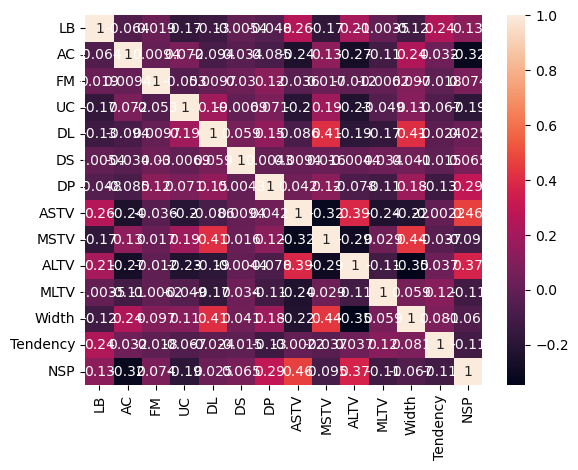

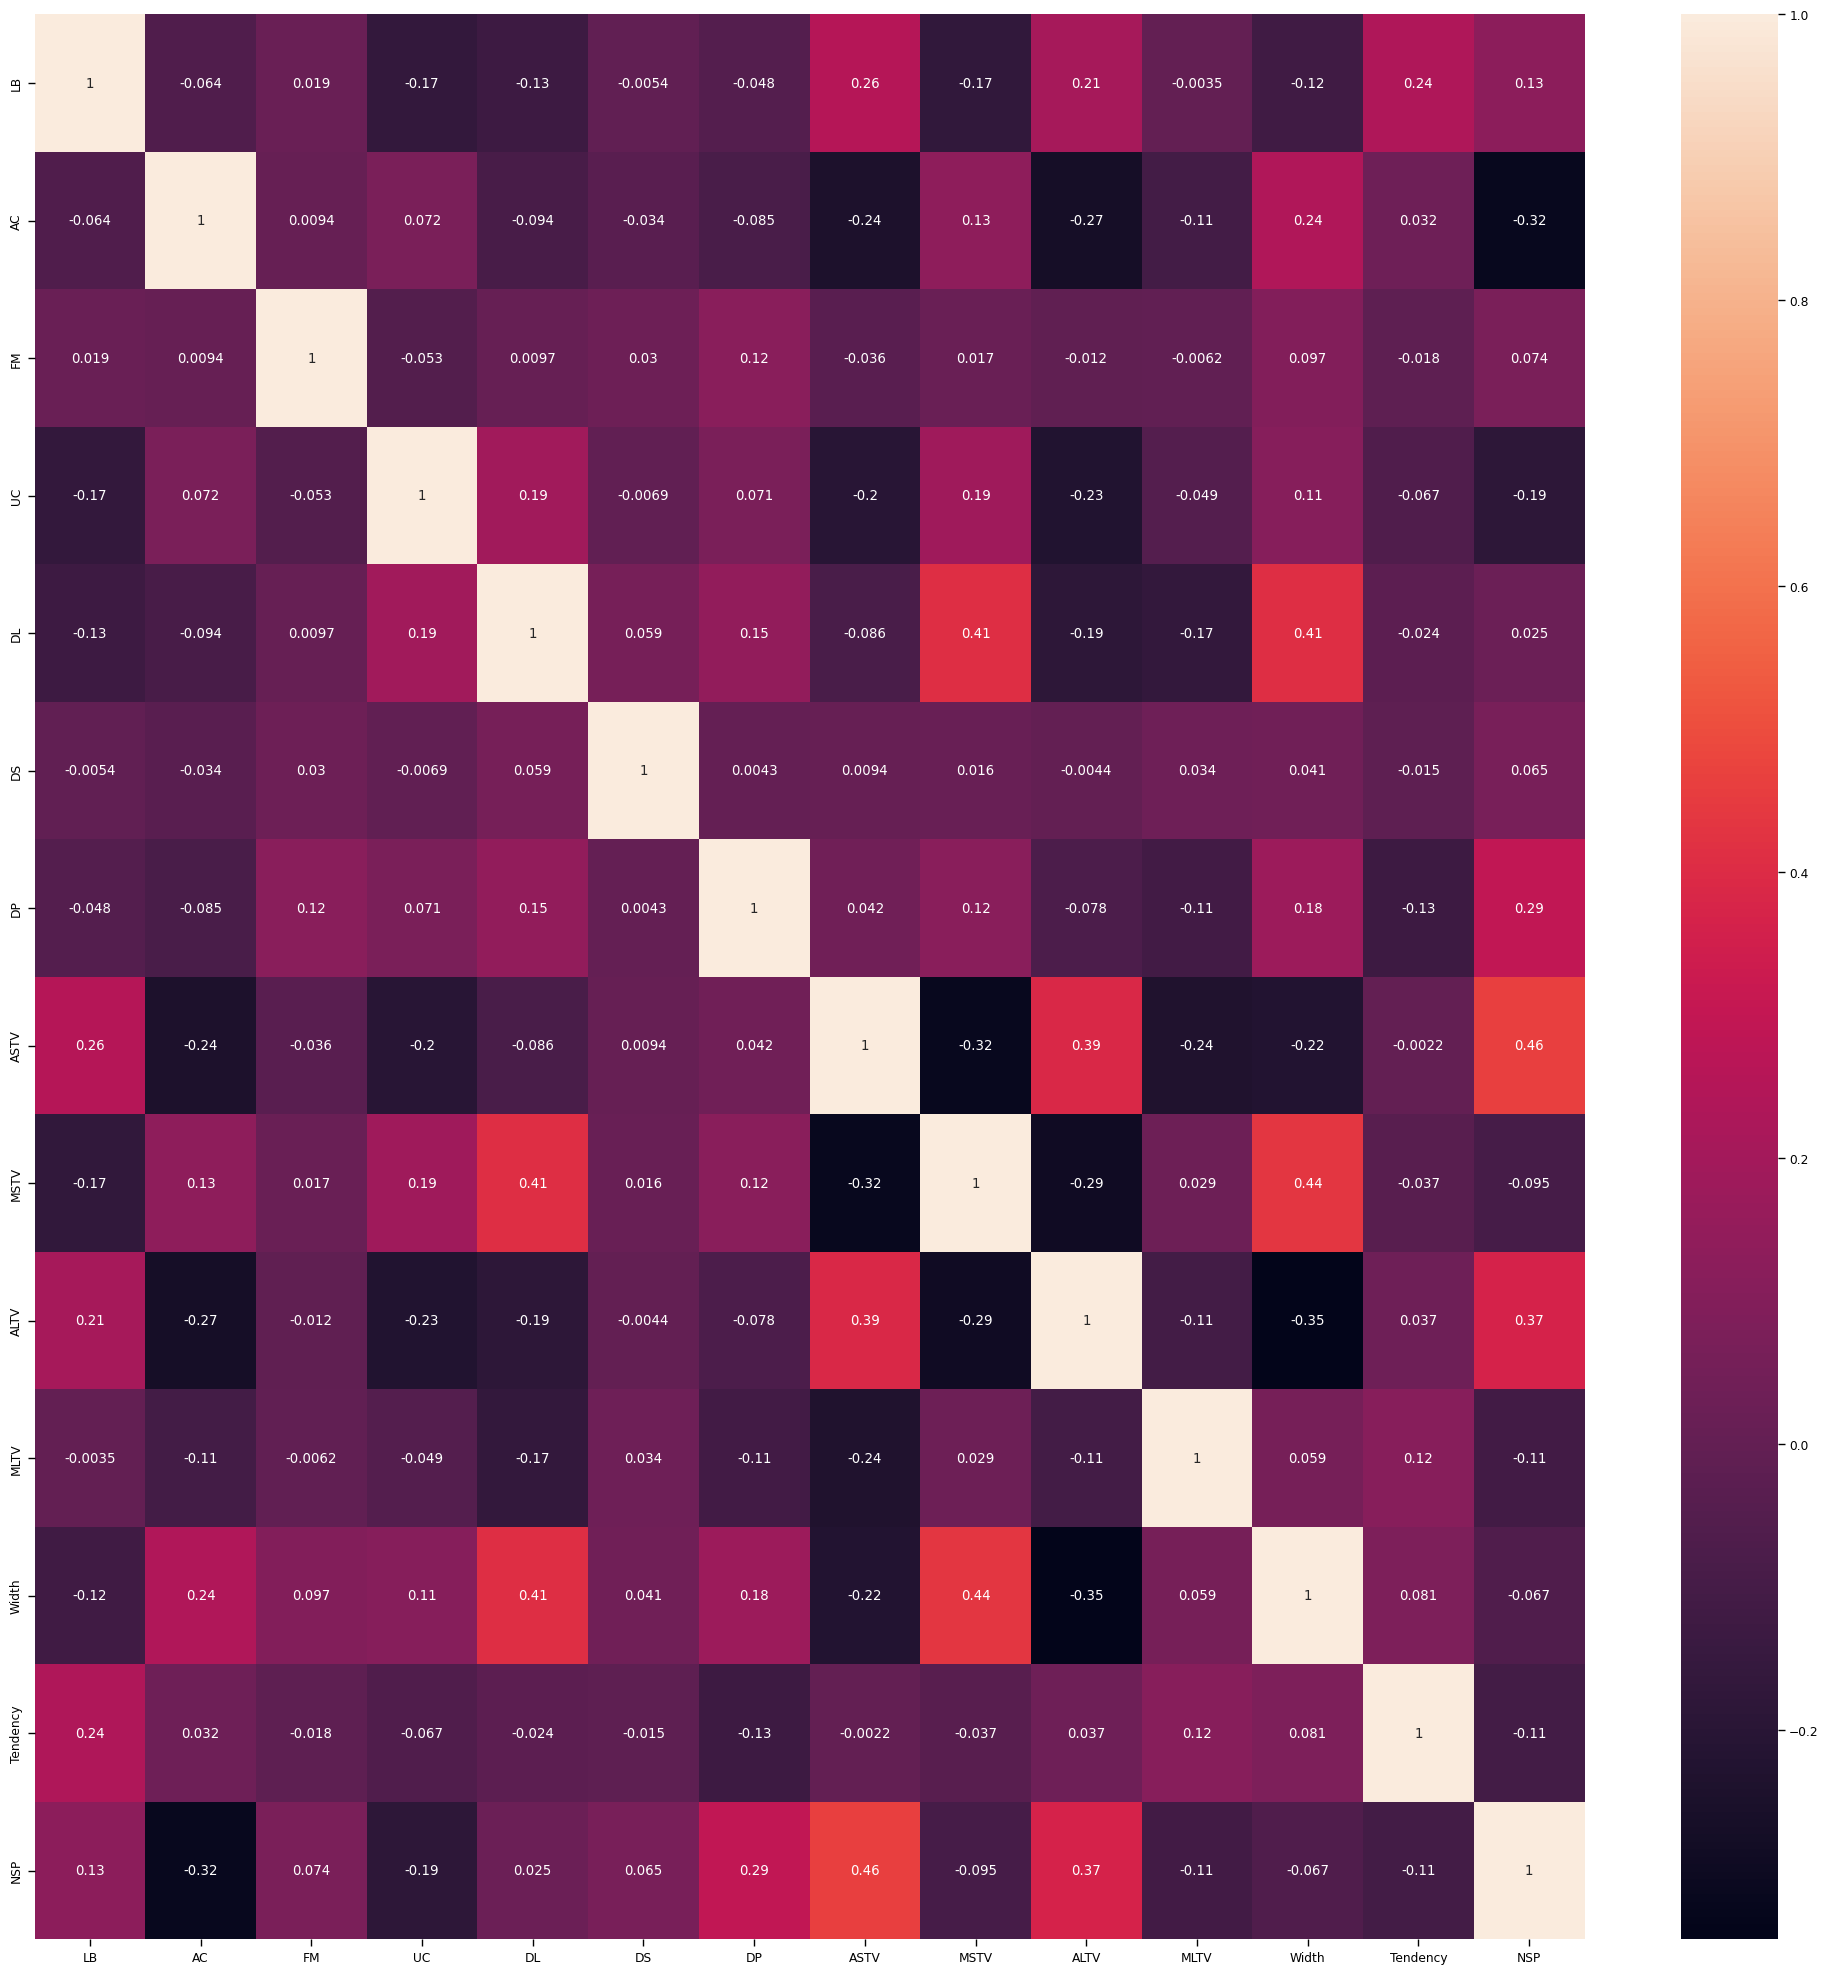

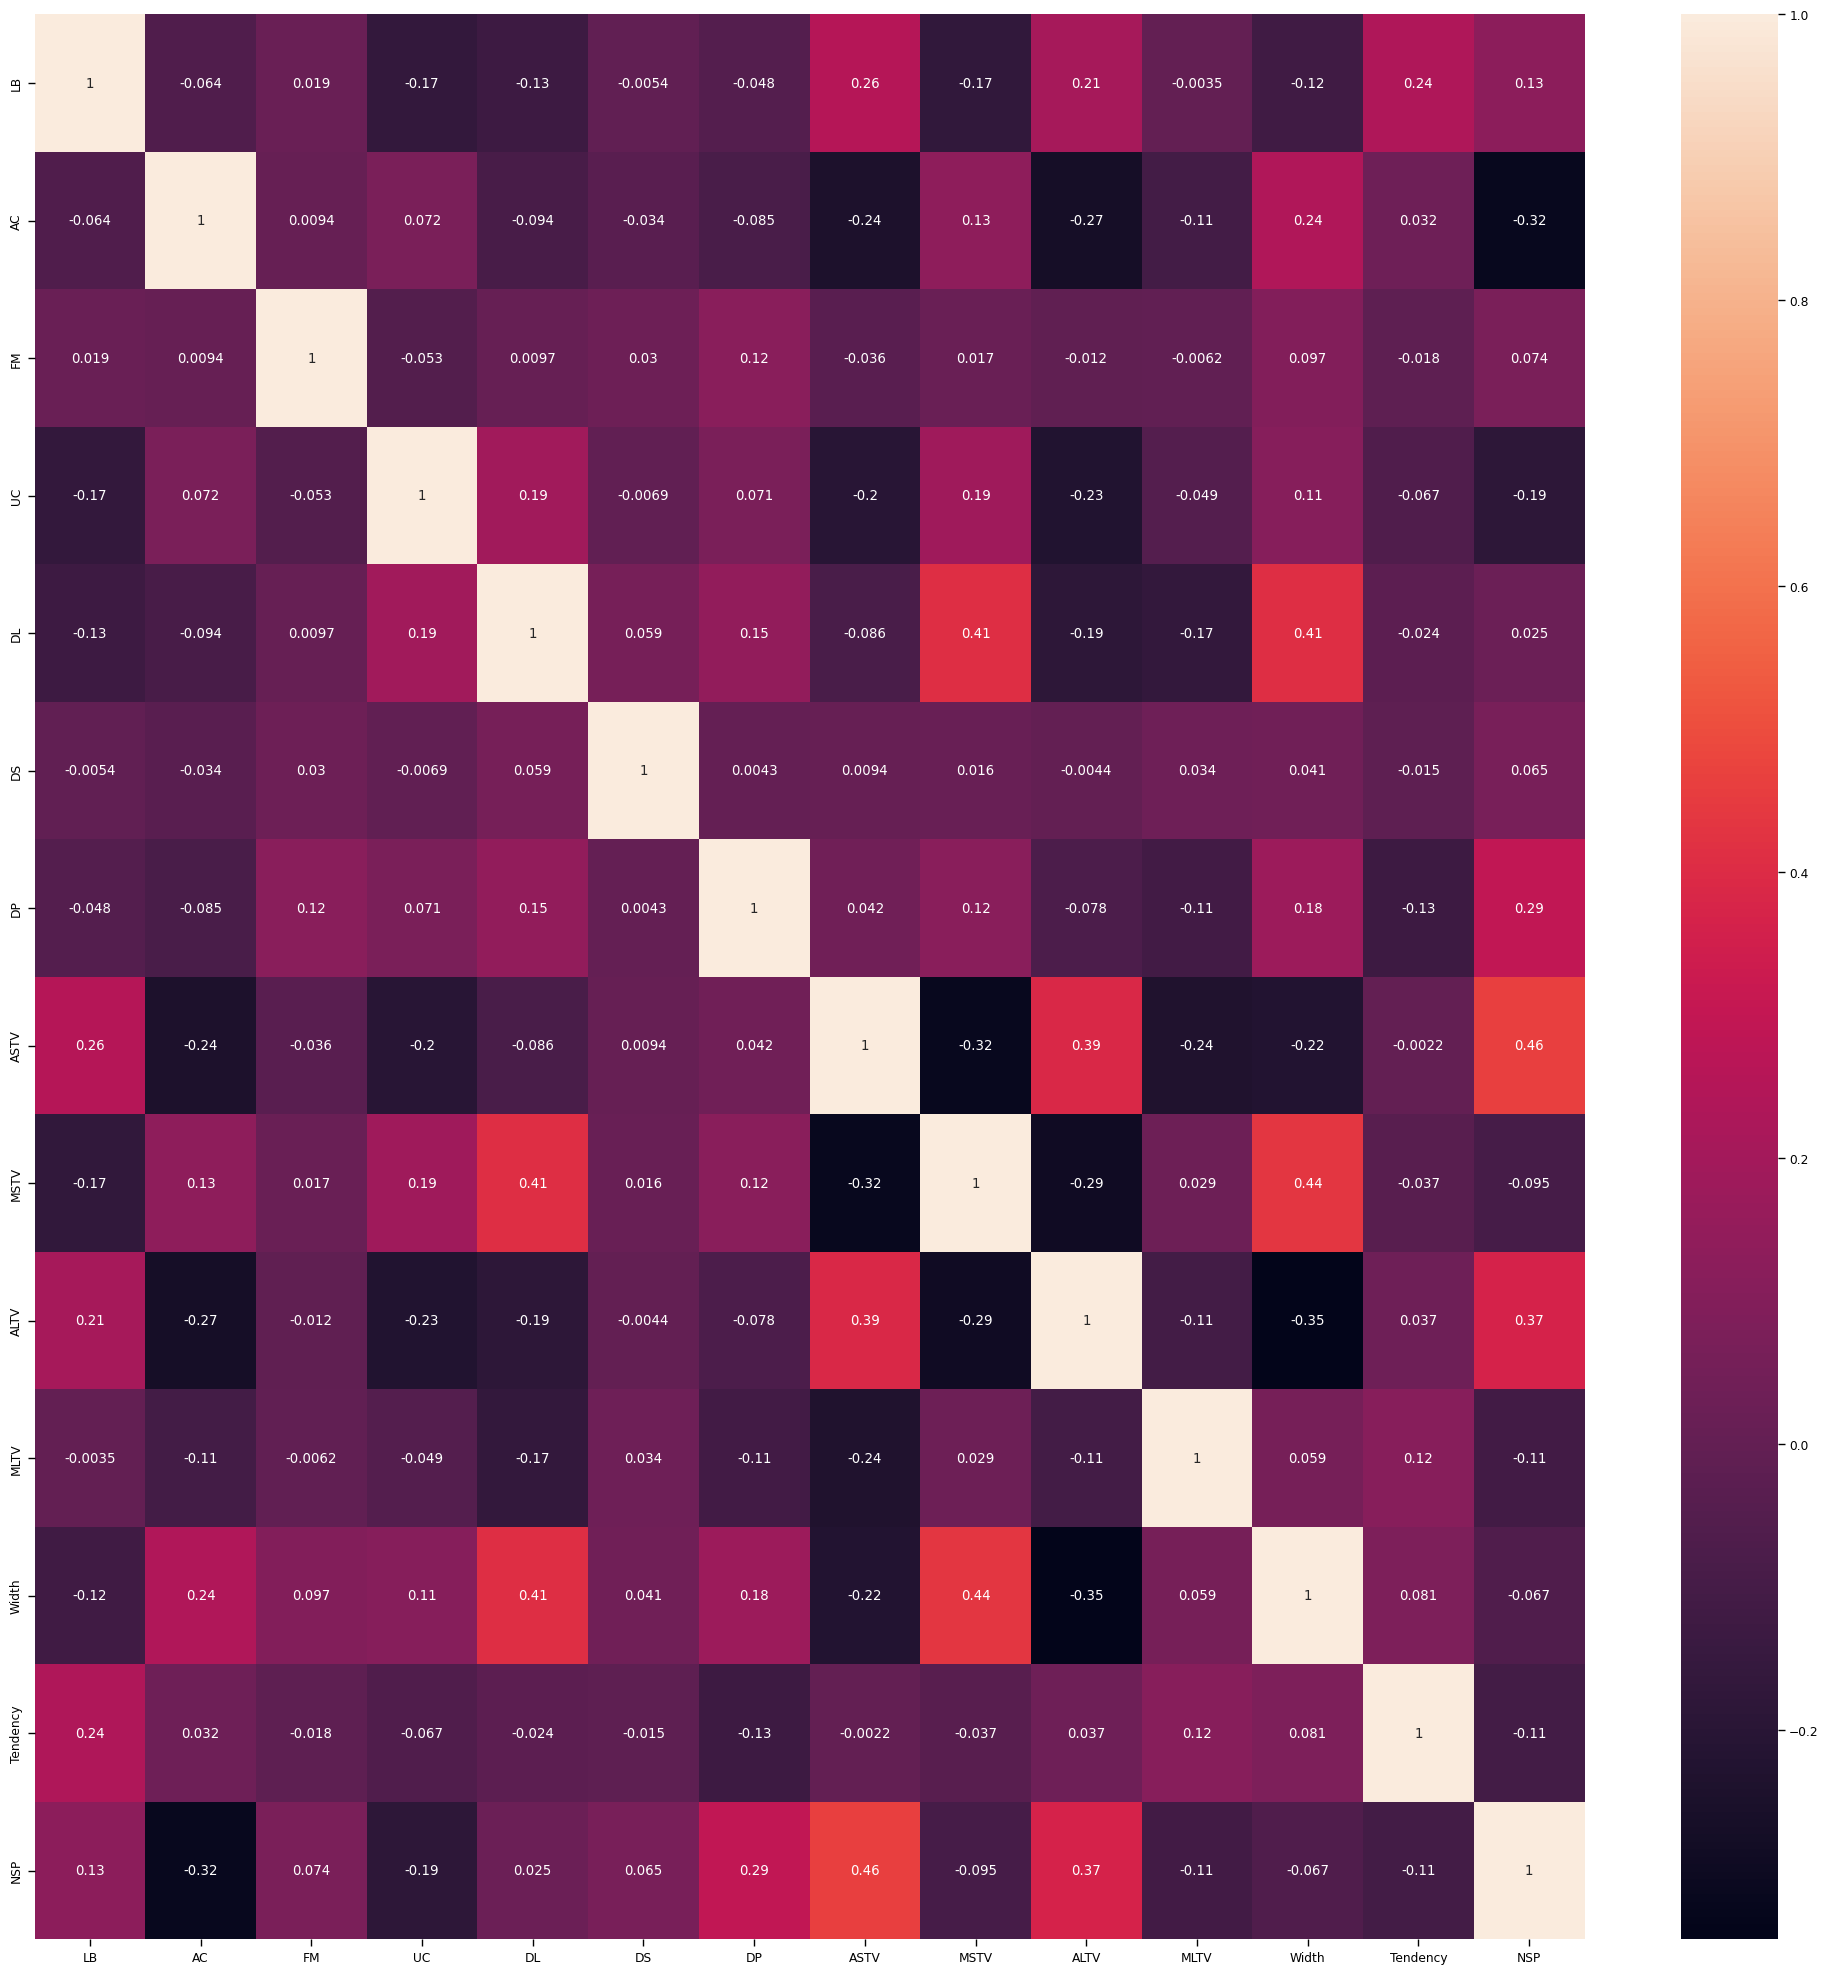

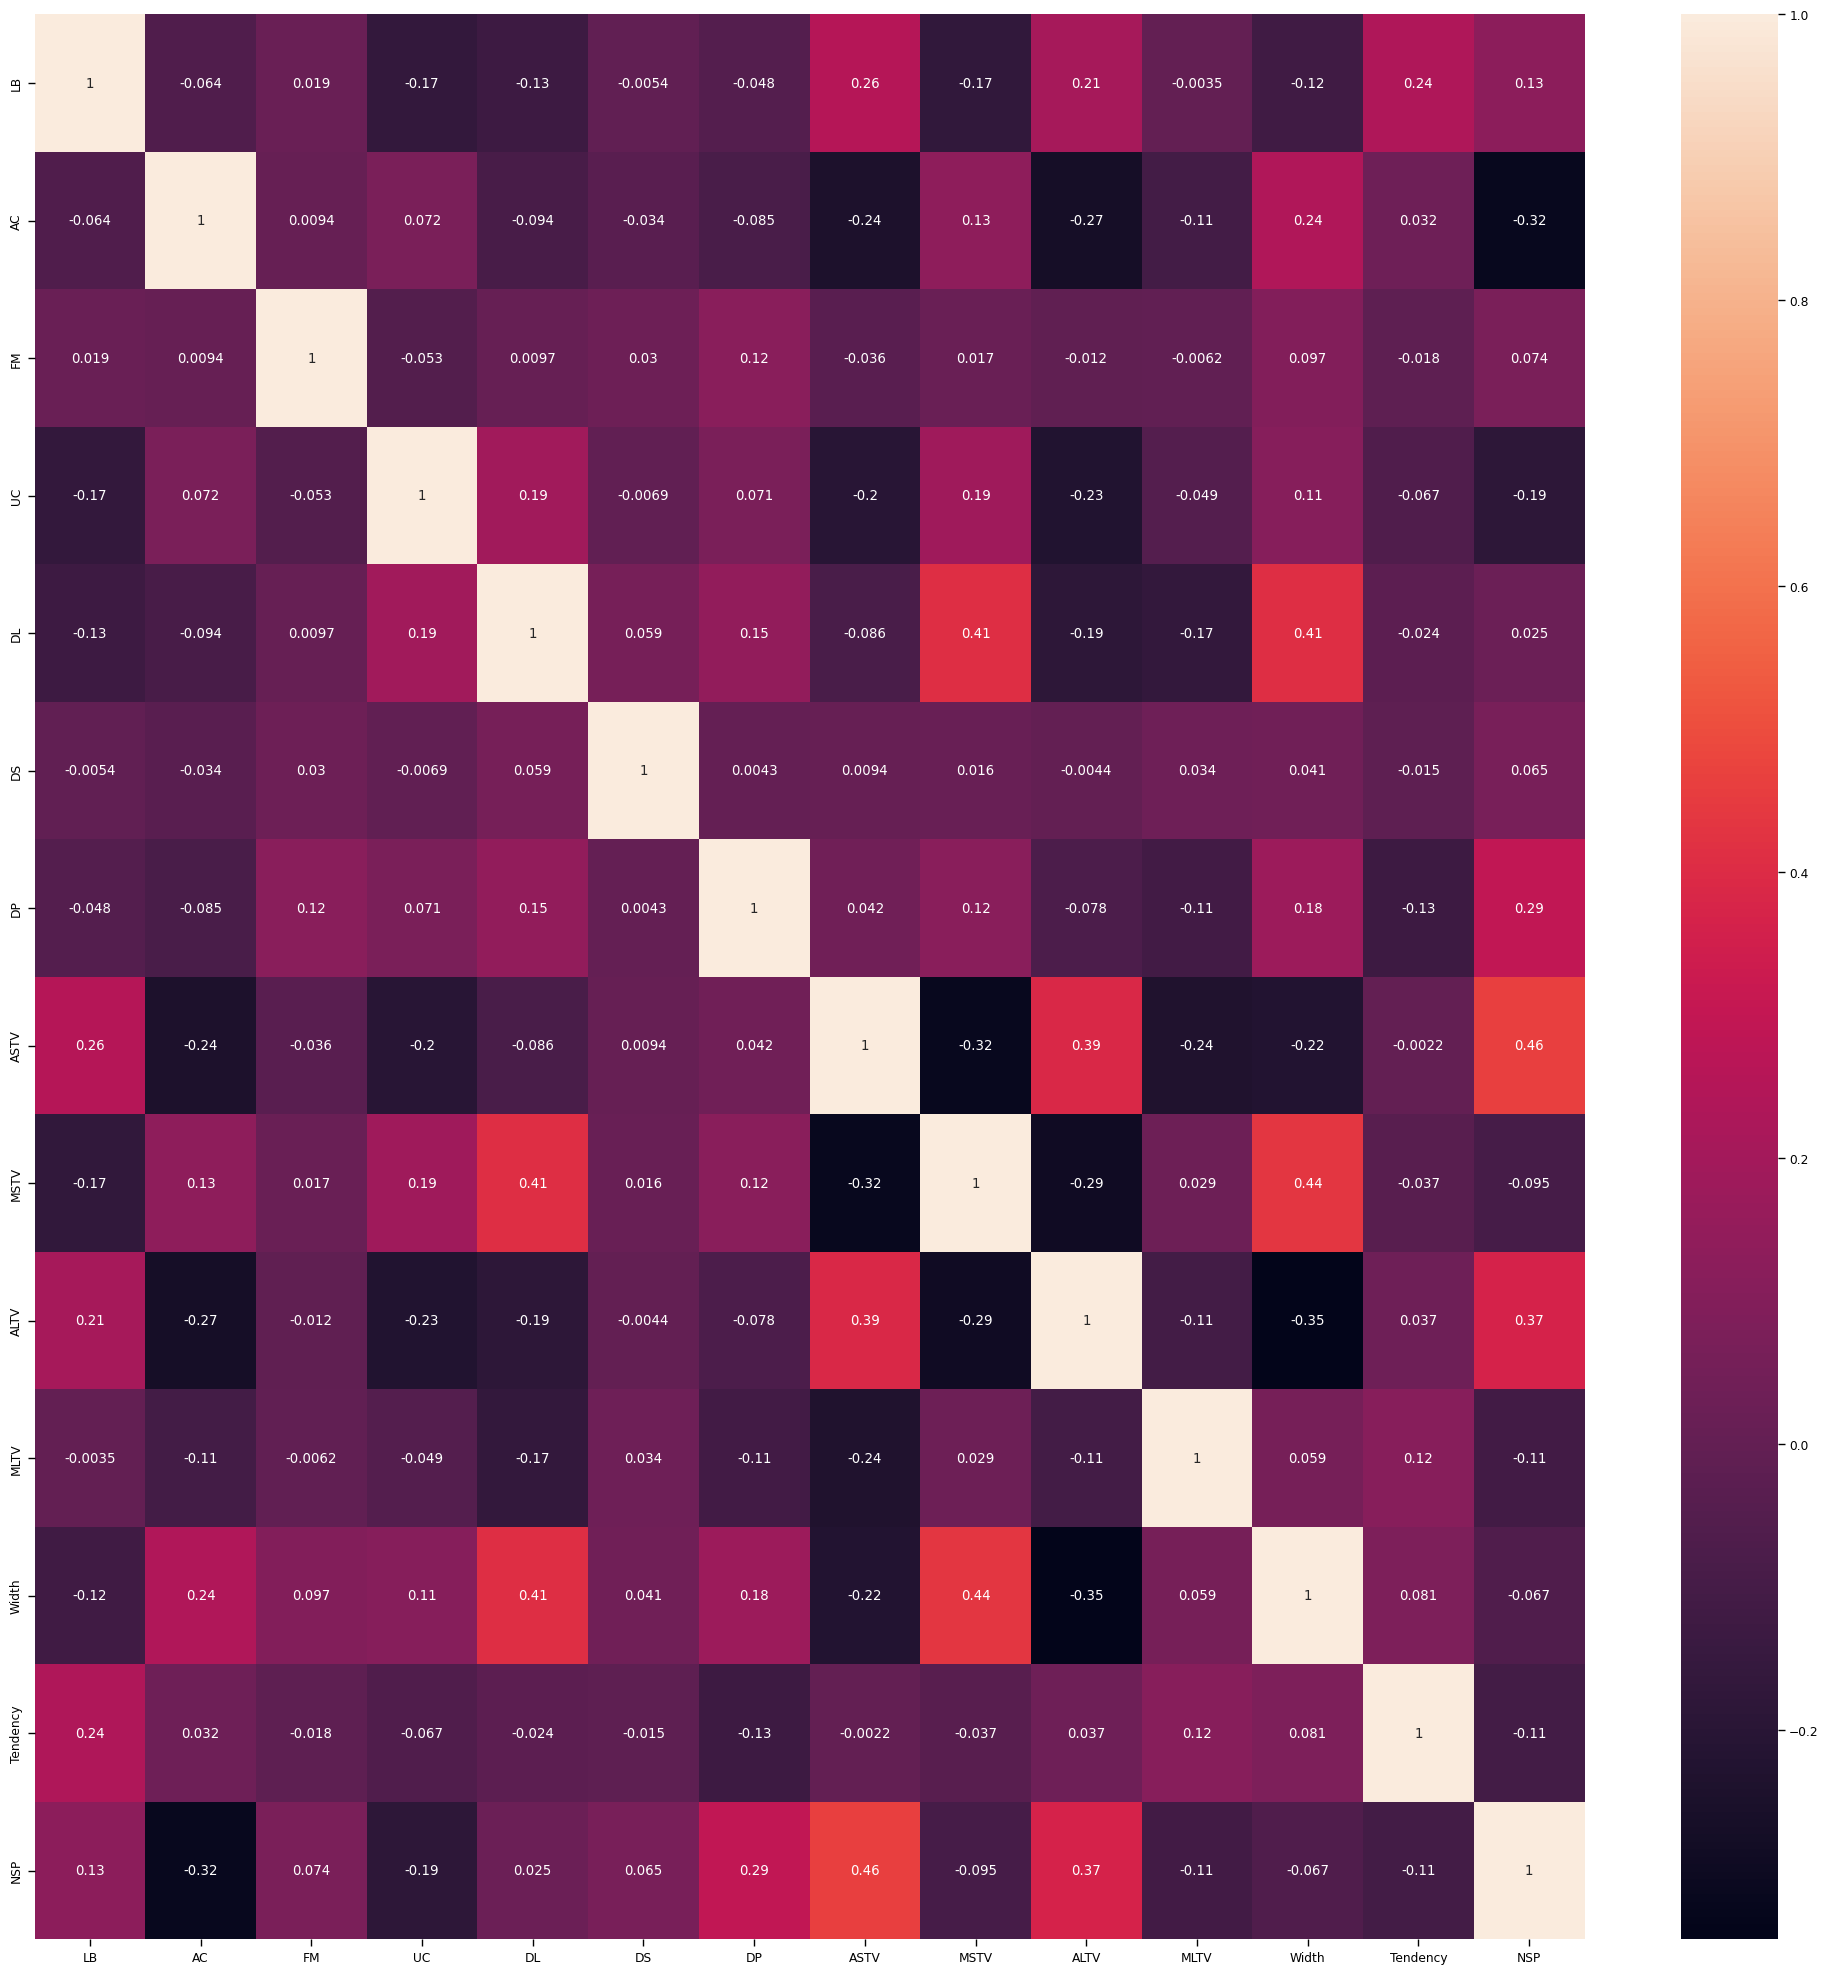

<Figure size 2500x2500 with 0 Axes>

In [276]:
#create correlation or heatmap
print("The correlation relationship between variables:")
co=cardiograph_subset.select_dtypes(include="number").corr()
sns.heatmap(co,annot=True)
plt.figure(figsize=(25,25))
plt.show()

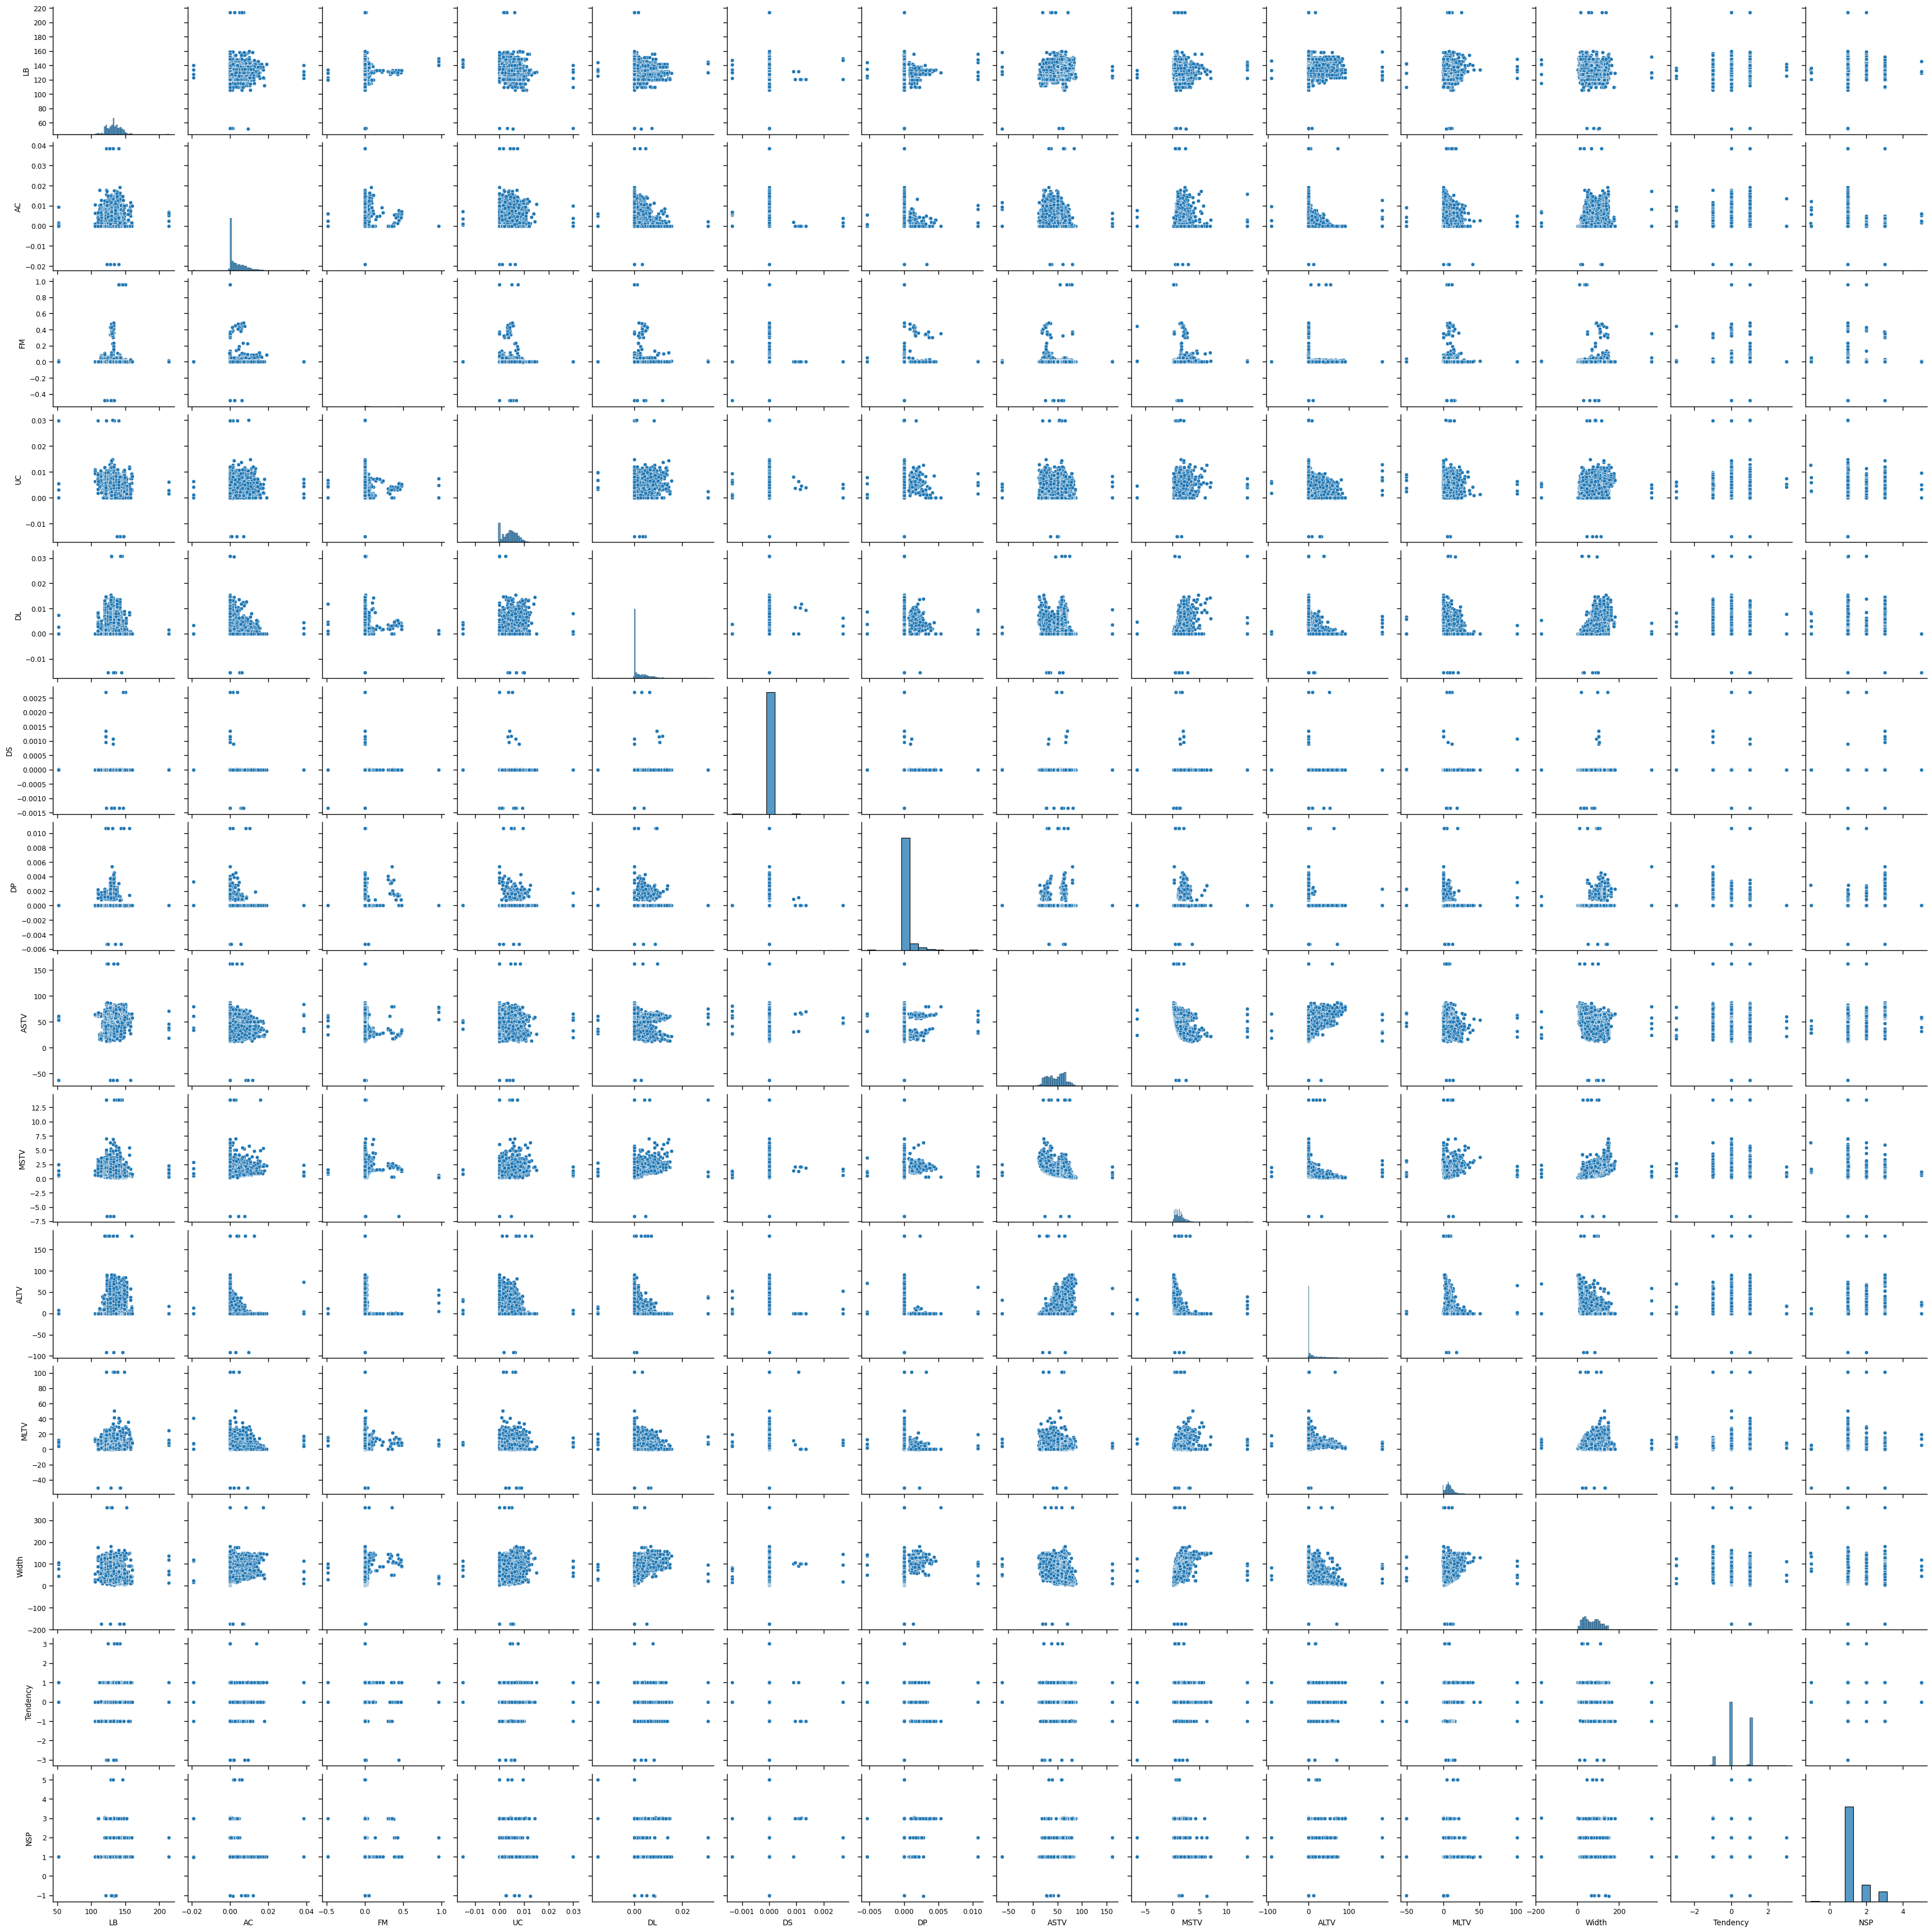

In [325]:
#pair plot
%matplotlib inline
sns.pairplot(data=cardiograph_subset)
plt.show()

In [ ]:
%matplotlib notebook
